# Genepy Jupyter Notebook
### by Tom Doyle
---


In [3]:
import get_data 
import get_patient
import get_PPI
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os

            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.213376  0.168596  0.578950  0.000000  0.251588  0.168758  0.317849   
AP0030  0.423495  0.000000  0.145681  0.231687  0.000000  0.128607  0.184796   
AP0045  0.249633  0.000000  0.145681  0.070938  0.000000  0.047297  0.184796   
AP0046  0.423495  0.000000  0.145681  0.333588  0.096853  0.047297  0.184796   
AP0055  0.213376  0.000000  0.221325  0.188007  0.055868  0.047297  0.490579   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.147379  0.058455   0.0   
AP0030  0.188629   0.0  0.018502  ...   0.0  0.095539  0.058455   0.0   
AP0045  0.000000   0.0  0.391329  ...   0.0  0.000000  0.058455   0.0   
AP0046  0.188629   0.0  0.000000  ...   0.0  0.000000  0.058455   0.0   
A

In [4]:
from get_data import genepy_df, genepy_normalized, genepy_norm_loeuf
from get_data import CD_subset, UC_subset, NOT_IBD_subset, IBDU_subset

In [28]:
os.chdir("/Users/tomdoyle/Documents/University/Southampton/Course/BIOL6068-Research_Project/Python/")

In [5]:
genepy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1086 entries, AP0013 to SORL0042
Columns: 16794 entries, A1BG to ZZZ3
dtypes: float64(16794)
memory usage: 139.2+ MB


In [4]:
genepy_norm_loeuf.describe()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,...,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,0.213941,0.049130,0.186570,0.196390,0.053155,0.104408,0.266483,0.060135,0.017104,0.269307,...,0.035794,0.080359,0.066777,0.000825,0.089674,0.090291,0.289284,0.042697,0.879554,0.233957
std,0.153417,0.121622,0.247177,0.125997,0.079405,0.072564,0.154903,0.119584,0.091103,0.260898,...,0.208911,0.103656,0.102931,0.027191,0.104368,0.114611,0.342645,0.125134,0.703655,0.708149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039513,0.000000,0.000000,0.103788,0.000000,0.047297,0.184796,0.000000,0.000000,0.018502,...,0.000000,0.000000,0.029044,0.000000,0.033063,0.069262,0.000000,0.000000,0.036130,0.000000
50%,0.213376,0.000000,0.145681,0.178993,0.055868,0.128607,0.227082,0.000000,0.000000,0.391329,...,0.000000,0.095539,0.058455,0.000000,0.054210,0.069262,0.339606,0.000000,0.830040,0.000000
75%,0.309762,0.000000,0.221325,0.258945,0.055868,0.143174,0.317849,0.188629,0.000000,0.391329,...,0.000000,0.095539,0.058455,0.000000,0.109079,0.088721,0.403379,0.000000,1.356947,0.000000
max,0.827815,1.136364,1.838235,1.050420,0.566893,0.604595,1.353180,1.012146,0.919118,1.059322,...,1.904762,0.979432,0.761615,0.896057,0.995025,1.024590,3.968254,0.962464,3.436426,5.649718


# quantile trasnform

In [160]:
from sklearn import preprocessing
# norm = genepy_df.apply(preprocessing.normalize, 0)
df = pd.DataFrame()
for col in genepy_df.columns:
    x = genepy_df[col].values
    x = x.reshape(-1,1)
    x = preprocessing.quantile_transform(x)
    s = pd.DataFrame(x)
    df = pd.concat([df, s], axis=1)

KeyboardInterrupt: 

In [ ]:
df

In [ ]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0), 
                             index=df.index, 
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [ ]:
quantile_normalize(genepy_df)

In [161]:
CD_subset['NOD2'].sort_values(ascending=False)

IID
SOPR0401    0.733676
SORL0032    0.605161
SOPR0393    0.565506
PR0074      0.508400
PR0005      0.456991
              ...   
SOAD0206    0.000000
SOAD0238    0.000000
SOAD0254    0.000000
SOPR0347    0.000000
SOAD0344    0.000000
Name: NOD2, Length: 681, dtype: float64

### Other notes

([<matplotlib.axis.YTick at 0x7fb0b9492a60>,
 [Text(0, 0, 'BIRC2'),
  Text(0, 1, 'CARD6'),
  Text(0, 2, 'CARD8'),
  Text(0, 3, 'CASP1'),
  Text(0, 4, 'CASP5'),
  Text(0, 5, 'CASP8'),
  Text(0, 6, 'CCL11'),
  Text(0, 7, 'CCL2'),
  Text(0, 8, 'CCL8'),
  Text(0, 9, 'CHUK'),
  Text(0, 10, 'CXCL1'),
  Text(0, 11, 'ERBIN'),
  Text(0, 12, 'HSP90AA1'),
  Text(0, 13, 'HSP90B1'),
  Text(0, 14, 'IKBKB'),
  Text(0, 15, 'IL1B'),
  Text(0, 16, 'MAPK1'),
  Text(0, 17, 'MAPK11'),
  Text(0, 18, 'MAPK12'),
  Text(0, 19, 'MAPK13'),
  Text(0, 20, 'MAPK14'),
  Text(0, 21, 'MAPK3'),
  Text(0, 22, 'MAPK8'),
  Text(0, 23, 'MEFV'),
  Text(0, 24, 'NFKB1'),
  Text(0, 25, 'NFKBIA'),
  Text(0, 26, 'NFKBIB'),
  Text(0, 27, 'NLRC4'),
  Text(0, 28, 'NLRP1'),
  Text(0, 29, 'NLRP3'),
  Text(0, 30, 'NOD1'),
  Text(0, 31, 'NOD2'),
  Text(0, 32, 'PYDC1'),
  Text(0, 33, 'RIPK2'),
  Text(0, 34, 'TAB2'),
  Text(0, 35, 'TAB3'),
  Text(0, 36, 'TNFAIP3'),
  Text(0, 37, 'TRIP6'),
  Text(0, 38, 'XIAP')])

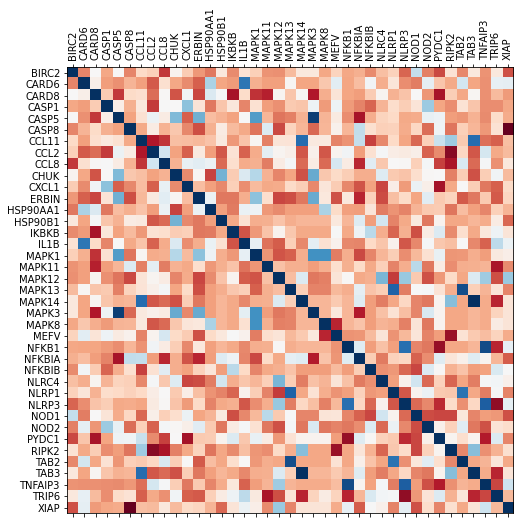

In [11]:
# corrilation of genepy scores between genes 
corr = genepy_selected.corr()
corr
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap= 'RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

In [12]:
# select NOD2 confirmed disease
NOD2 = genepy_selected[genepy_selected['NOD2_Disease'] == 'YES']
NOD2

,Samid,NOD2_Disease,BIRC2,CARD6,CARD8,CASP1,CASP5,CASP8,CCL11,CCL2,...,NLRP3,NOD1,NOD2,PYDC1,RIPK2,TAB2,TAB3,TNFAIP3,TRIP6,XIAP
0,PR0036,YES,0.000000,0.379419,4.869294,0.000000,0.000000,0.000000,0.221512,0.000000,...,0.756633,0.000000,1.578552,0.111283,0.392608,0.000000,0.0,0.000000,0.174013,0.294117
1,PR0063,YES,0.000000,2.567311,9.103046,0.000000,0.144104,0.193894,0.000000,0.000000,...,0.825039,0.000000,2.366197,0.111283,0.000000,0.471051,0.0,0.000000,0.174013,0.294117
2,PR0097,YES,0.000000,0.000000,9.277019,0.210018,0.291990,0.107818,0.000000,0.192022,...,1.375162,0.929056,0.371886,0.111283,0.000000,0.000000,0.0,0.410229,0.139034,0.294117
3,PR0143,YES,0.000000,0.241709,4.462787,1.395450,0.144104,0.481712,0.221512,0.000000,...,0.869302,0.000000,2.918618,0.174802,0.000000,0.000000,0.0,0.000000,0.174013,0.000000
4,PR0152,YES,0.000000,0.000000,9.103046,0.000000,0.308566,0.107818,0.221512,0.165452,...,1.029943,0.000000,1.775791,0.111283,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,PR0208,YES,0.000000,0.000000,4.970963,0.000000,0.160679,0.193894,0.000000,0.165452,...,0.442685,0.000000,2.813448,0.174802,0.000000,0.000000,0.0,0.000000,0.174013,0.294117
6,PR0218,YES,0.454461,0.000000,0.233275,0.686205,1.764197,0.000000,0.221512,0.165452,...,0.856979,0.000000,2.687691,0.174802,0.000000,0.000000,0.0,0.000000,0.139034,0.201072
7,SOPR0255,YES,0.000000,0.599772,4.462787,0.210018,0.147887,0.395636,0.221512,0.165452,...,0.594884,0.575563,2.178653,0.174802,0.000000,1.520070,0.0,0.000000,0.174013,0.000000
8,SOPR0297,YES,0.000000,0.000000,9.103046,1.395450,0.000000,0.000000,0.000000,0.000000,...,1.019186,0.929056,2.178653,0.000000,0.000000,0.438294,0.0,0.000000,0.000000,0.201072
9,SOPR0350,YES,0.454461,0.000000,4.955010,0.000000,0.291990,0.193894,0.000000,0.000000,...,1.155363,0.000000,1.766096,0.174802,0.392608,0.000000,0.0,0.000000,0.174013,0.000000


In [13]:
# select not_NOD2 disease
Not_NOD2 = genepy_selected[genepy_selected['NOD2_Disease'] == 'NO']
Not_NOD2

,Samid,NOD2_Disease,BIRC2,CARD6,CARD8,CASP1,CASP5,CASP8,CCL11,CCL2,...,NLRP3,NOD1,NOD2,PYDC1,RIPK2,TAB2,TAB3,TNFAIP3,TRIP6,XIAP
10,PR0011,NO,0.000000,0.589121,4.796990,0.000000,0.000000,0.107818,0.000000,0.165452,...,0.756633,0.000000,0.0,0.111283,0.000000,0.000000,0.00000,0.000000,0.174013,0.294117
11,PR0017,NO,0.000000,0.000000,9.280726,0.000000,0.308566,0.966261,0.000000,0.165452,...,0.974923,0.000000,0.0,0.111283,0.000000,0.000000,0.00000,0.000000,0.174013,0.000000
12,PR0021,NO,0.000000,0.241709,4.970963,0.000000,0.160679,0.193894,0.221512,0.000000,...,0.584778,0.518837,0.0,0.174802,0.000000,0.000000,0.00000,0.000000,0.174013,0.201072
13,PR0078,NO,2.094742,0.000000,9.280726,0.000000,0.291990,0.107818,0.000000,0.165452,...,0.441576,1.242043,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.174013,0.000000
14,PR0093,NO,0.000000,0.000000,4.620807,0.000000,0.000000,0.193894,0.000000,0.192022,...,2.241239,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,1.320673,0.000000,0.294117
15,PR0119,NO,0.000000,0.241709,9.280726,0.210018,0.291990,0.358961,0.000000,0.165452,...,0.613432,0.575563,0.0,0.111283,0.000000,0.000000,0.00000,0.000000,0.174013,0.000000
16,PR0127,NO,0.000000,0.000000,0.233275,0.000000,0.291990,0.627229,0.000000,0.192022,...,0.755525,1.094400,0.0,0.174802,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
17,PR0137,NO,0.454461,0.000000,9.103046,0.210018,0.147887,0.395636,0.221512,0.000000,...,0.756633,0.575563,0.0,0.174802,0.000000,0.000000,0.00000,0.000000,0.174013,0.000000
18,PR0140,NO,0.000000,0.000000,0.233275,0.000000,0.160679,0.107818,0.000000,0.165452,...,1.015212,0.000000,0.0,0.174802,0.000000,0.438294,0.00000,0.410229,0.174013,0.201072
19,PR0151,NO,0.454461,0.000000,8.768842,0.210018,0.147887,0.193894,0.756268,0.000000,...,0.974923,0.000000,0.0,0.174802,0.392608,0.000000,0.63244,0.000000,0.000000,0.201072


import GSEApy and check version

In [25]:
import gseapy as gp

gp.__version__

'0.9.5'

### Create .rnk file contain gene names and 

In [12]:
'''
def patient_rnk_list(patientID):
    return(
    genepy_norm_loeuf
    .loc[patientID]
    .sort_values(ascending=False)
    .to_csv('Patient'+patientID+'.rnk', sep ='\t', header=False)
    )
'''

In [12]:
def patient_rnk_list(patientID):
    s = genepy_norm_loeuf.loc[patientID]
    g = s[s > 0]
    return g.sort_values(ascending=False).to_csv('Patient'+patientID+'.rnk', sep ='\t', header=False)

### create a ranked list of genes only 

In [8]:
def gene_rnk_list(patientID):
    return(
    genepy_norm_loeuf
    .loc[patientID]
    .sort_values(ascending=False)
    .index
    )

In [29]:
gene_li = gene_rnk_list('PR0036').to_list()
np.savetxt("PR0036.txt", 
           gene_li,
           delimiter =", ", 
           fmt ='% s')

In [30]:
def gene_rnk_list2(patientID):
    s = genepy_norm_loeuf.loc[patientID]
    g = s[s > 0]
    return g

## Sorting values

In [12]:
genepy_norm_loeuf['NOD2'].sort_values(ascending=False).head(20)

Samid
SOPR0401    0.733676
SORL0032    0.605161
SOPR0393    0.565506
SOPR0356    0.512469
PR0074      0.508400
PR0005      0.456991
SOAD0552    0.453862
PR0143      0.448912
SOAD0118    0.446032
PR0218      0.436495
PR0094      0.434814
SOAD0489    0.429538
PR0004      0.427350
SOPR0537    0.405429
SOAD0112    0.403355
PR0062      0.401302
PR0208      0.400076
SOPR0494    0.397871
SOAD0467    0.388758
SOAD0286    0.377126
Name: NOD2, dtype: float64

# Get patient Phenotype

In [1]:
patient_phe = pd.read_table('../Data/ibd_phe.txt', index_col=0)

NameError: name 'pd' is not defined

In [11]:
patient_phe.loc['AP0013']

gender       female
Diagnosis        CD
Name: AP0013, dtype: object

In [34]:
def get_patient_phenotype(patientID):
    '''
    function that retrieves patient phenotype. return as series 
    '''
    patient_phe_df = pd.read_table('../Data/ibd_phe.txt', index_col=0)
    return patient_phe_df.loc[patientID]

In [2]:
def get_patient_phenotype(patientID):
    '''
    function that retrieves patient phenotype. Returns as df.  
    '''
    from get_data import patient_phenotype
    return patient_phenotype.loc[[patientID]]

In [3]:
get_patient_phenotype('PR0074')

,gender,Diagnosis
IID,,
PR0074,male,CD


In [73]:
NOD2 = genepy_norm_loeuf['NOD2'].sort_values(ascending=False).to_frame()
NOD2

,NOD2
Samid,
SOPR0401,0.220414
SORL0032,0.199303
SOPR0393,0.177667
SOPR0356,0.176299
PR0074,0.171113
...,...
PR0078,0.000000
SOAD0586,0.000000
SOPR0447,0.000000


# Comparing top scorers

In [29]:
# notes 
CD_sum = CD_subset.sum()>1000
#tODO add NOD2 for reference 
CD_sum[CD_sum].index
CD_sum = CD_subset.sum()>1200
CD_sum = CD_subset.sum().sort_values(ascending=False).head(20)

top_CD_sum = CD_sum[CD_sum].index.values
top_CD_sum = np.append(top_CD_sum, [['NOD2']])

Index(['ACAN', 'ACTN4', 'AGO2', 'AHSA1', 'ANK3', 'ARMCX4', 'ATP2B2', 'ATRX',
       'CACNA1E', 'CBLB',
       ...
       'XPO7', 'YTHDC2', 'ZC3H12C', 'ZC3H4', 'ZFHX3', 'ZNF219', 'ZNF292',
       'ZNF407', 'ZNF462', 'ZNF777'],
      dtype='object', length=106)

In [58]:
UC_subset.info

<bound method DataFrame.info of               A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
IID                                                                    
AP0045    0.249633  0.000000  0.145681  0.070938  0.000000  0.047297   
AP0046    0.423495  0.000000  0.145681  0.333588  0.096853  0.047297   
AP0065    0.423495  0.000000  0.368049  0.174726  0.000000  0.143174   
AP0088    0.423495  0.000000  1.482513  0.050786  0.000000  0.143174   
AP0127    0.003257  0.000000  0.513730  0.174598  0.000000  0.047297   
...            ...       ...       ...       ...       ...       ...   
SORL0036  0.213376  0.000000  0.145681  0.202070  0.000000  0.000000   
SORL0037  0.039513  0.000000  0.145681  0.147468  0.055868  0.168758   
SORL0038  0.213376  0.350423  0.270866  0.367878  0.000000  0.168758   
SORL0040  0.003257  0.000000  0.221325  0.249240  0.055868  0.047297   
SORL0041  0.003257  0.000000  0.000000  0.179871  0.055868  0.047297   

             A4GNT      AAAS   

### Generate arrays of top genes + NOD2

In [49]:
CD_sum = CD_subset.sum().sort_values(ascending=False).head(50).index.values
top_CD_sum = np.append(CD_sum, [['NOD2']])
UC_sum = UC_subset.sum().sort_values(ascending=False).head(50).index.values
top_UC_sum = np.append(UC_sum, [['NOD2']])

### Generate a txt file for list of top genes

In [ ]:
a_list = CD_sum.tolist()
textfile = open("top_genesCD.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

a_list = UC_sum.tolist()
textfile = open("top_genesUC.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

## Boxplots

In [129]:
CD_subset[top_CD_sum].plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7fc1cd0aeb50>>

In [114]:
boxlabels = [0,5,10,15,20,25,30,35]

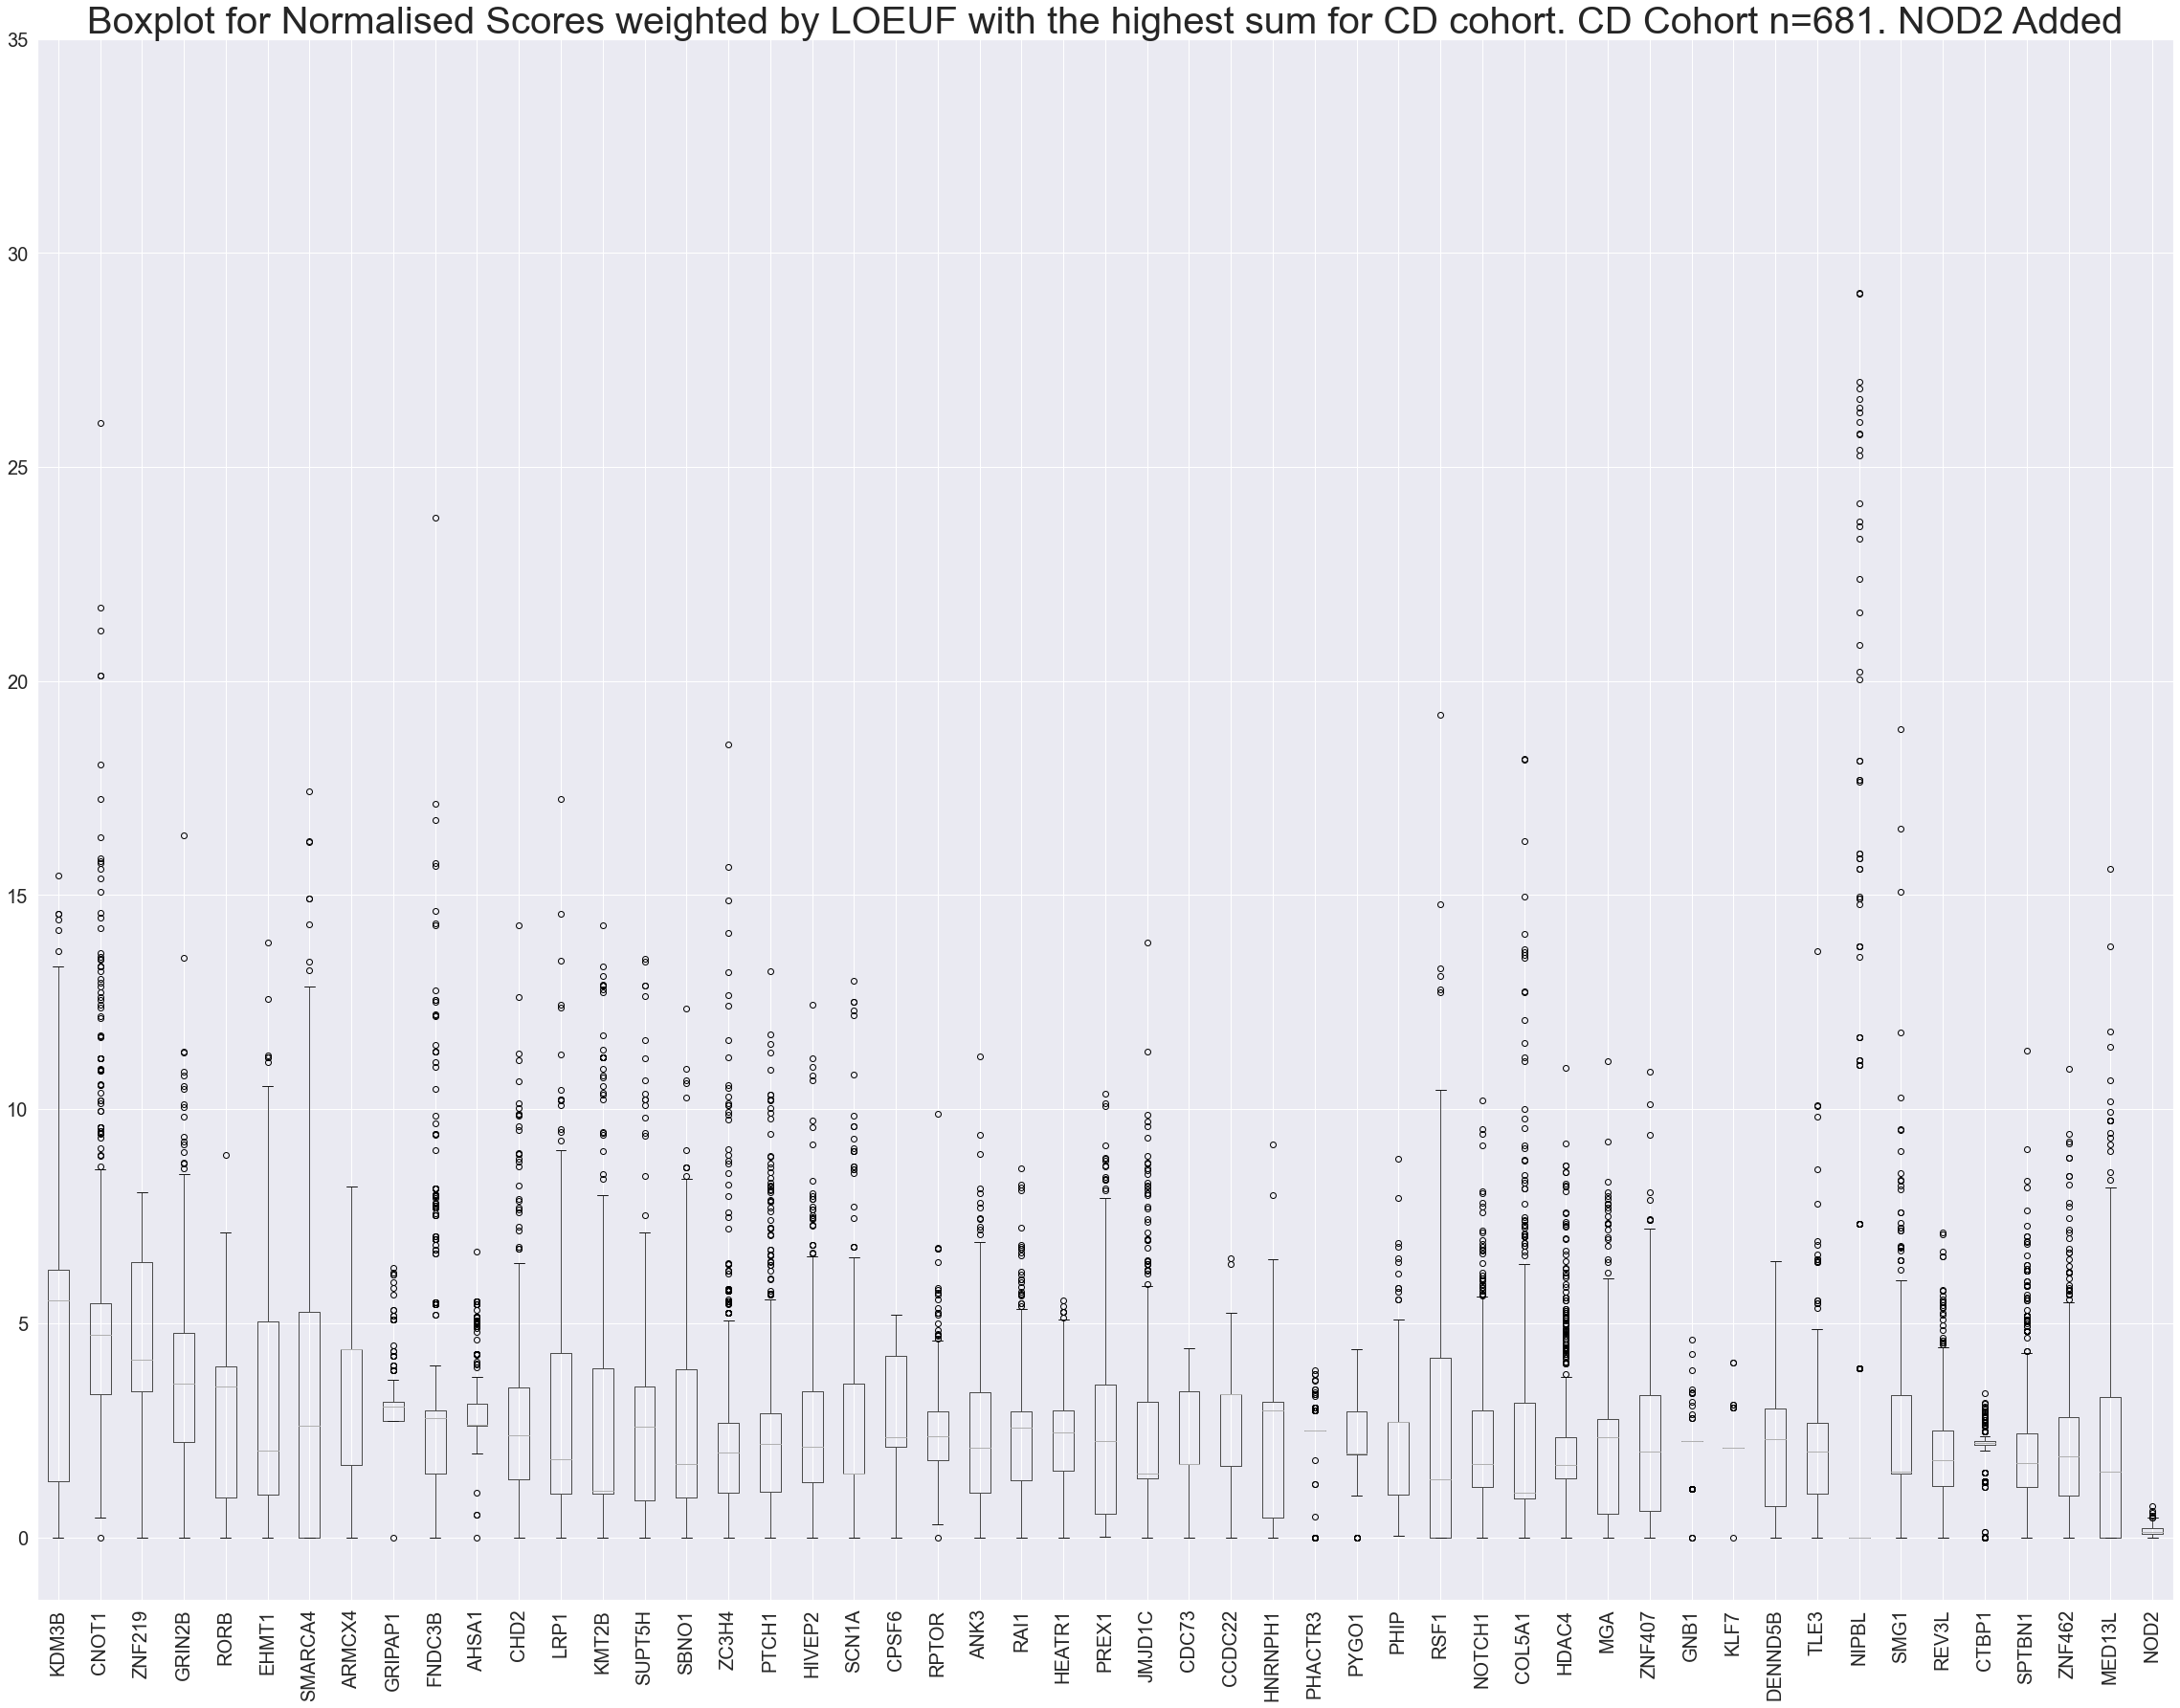

In [112]:
import matplotlib.pyplot as plt


boxCD = CD_subset[top_CD_sum].boxplot()
boxCD.tick_params(axis='x',
                  labelrotation=90)
boxCD.tick_params(labelsize=20)
boxCD.set_title('Boxplot for Normalised Scores weighted by LOEUF with the highest sum for CD cohort. CD Cohort n=681. NOD2 Added',
                size=40)
boxCD.set_yticks(ticks=boxlabels)
boxCD.figure.savefig('TopCD_box.png')

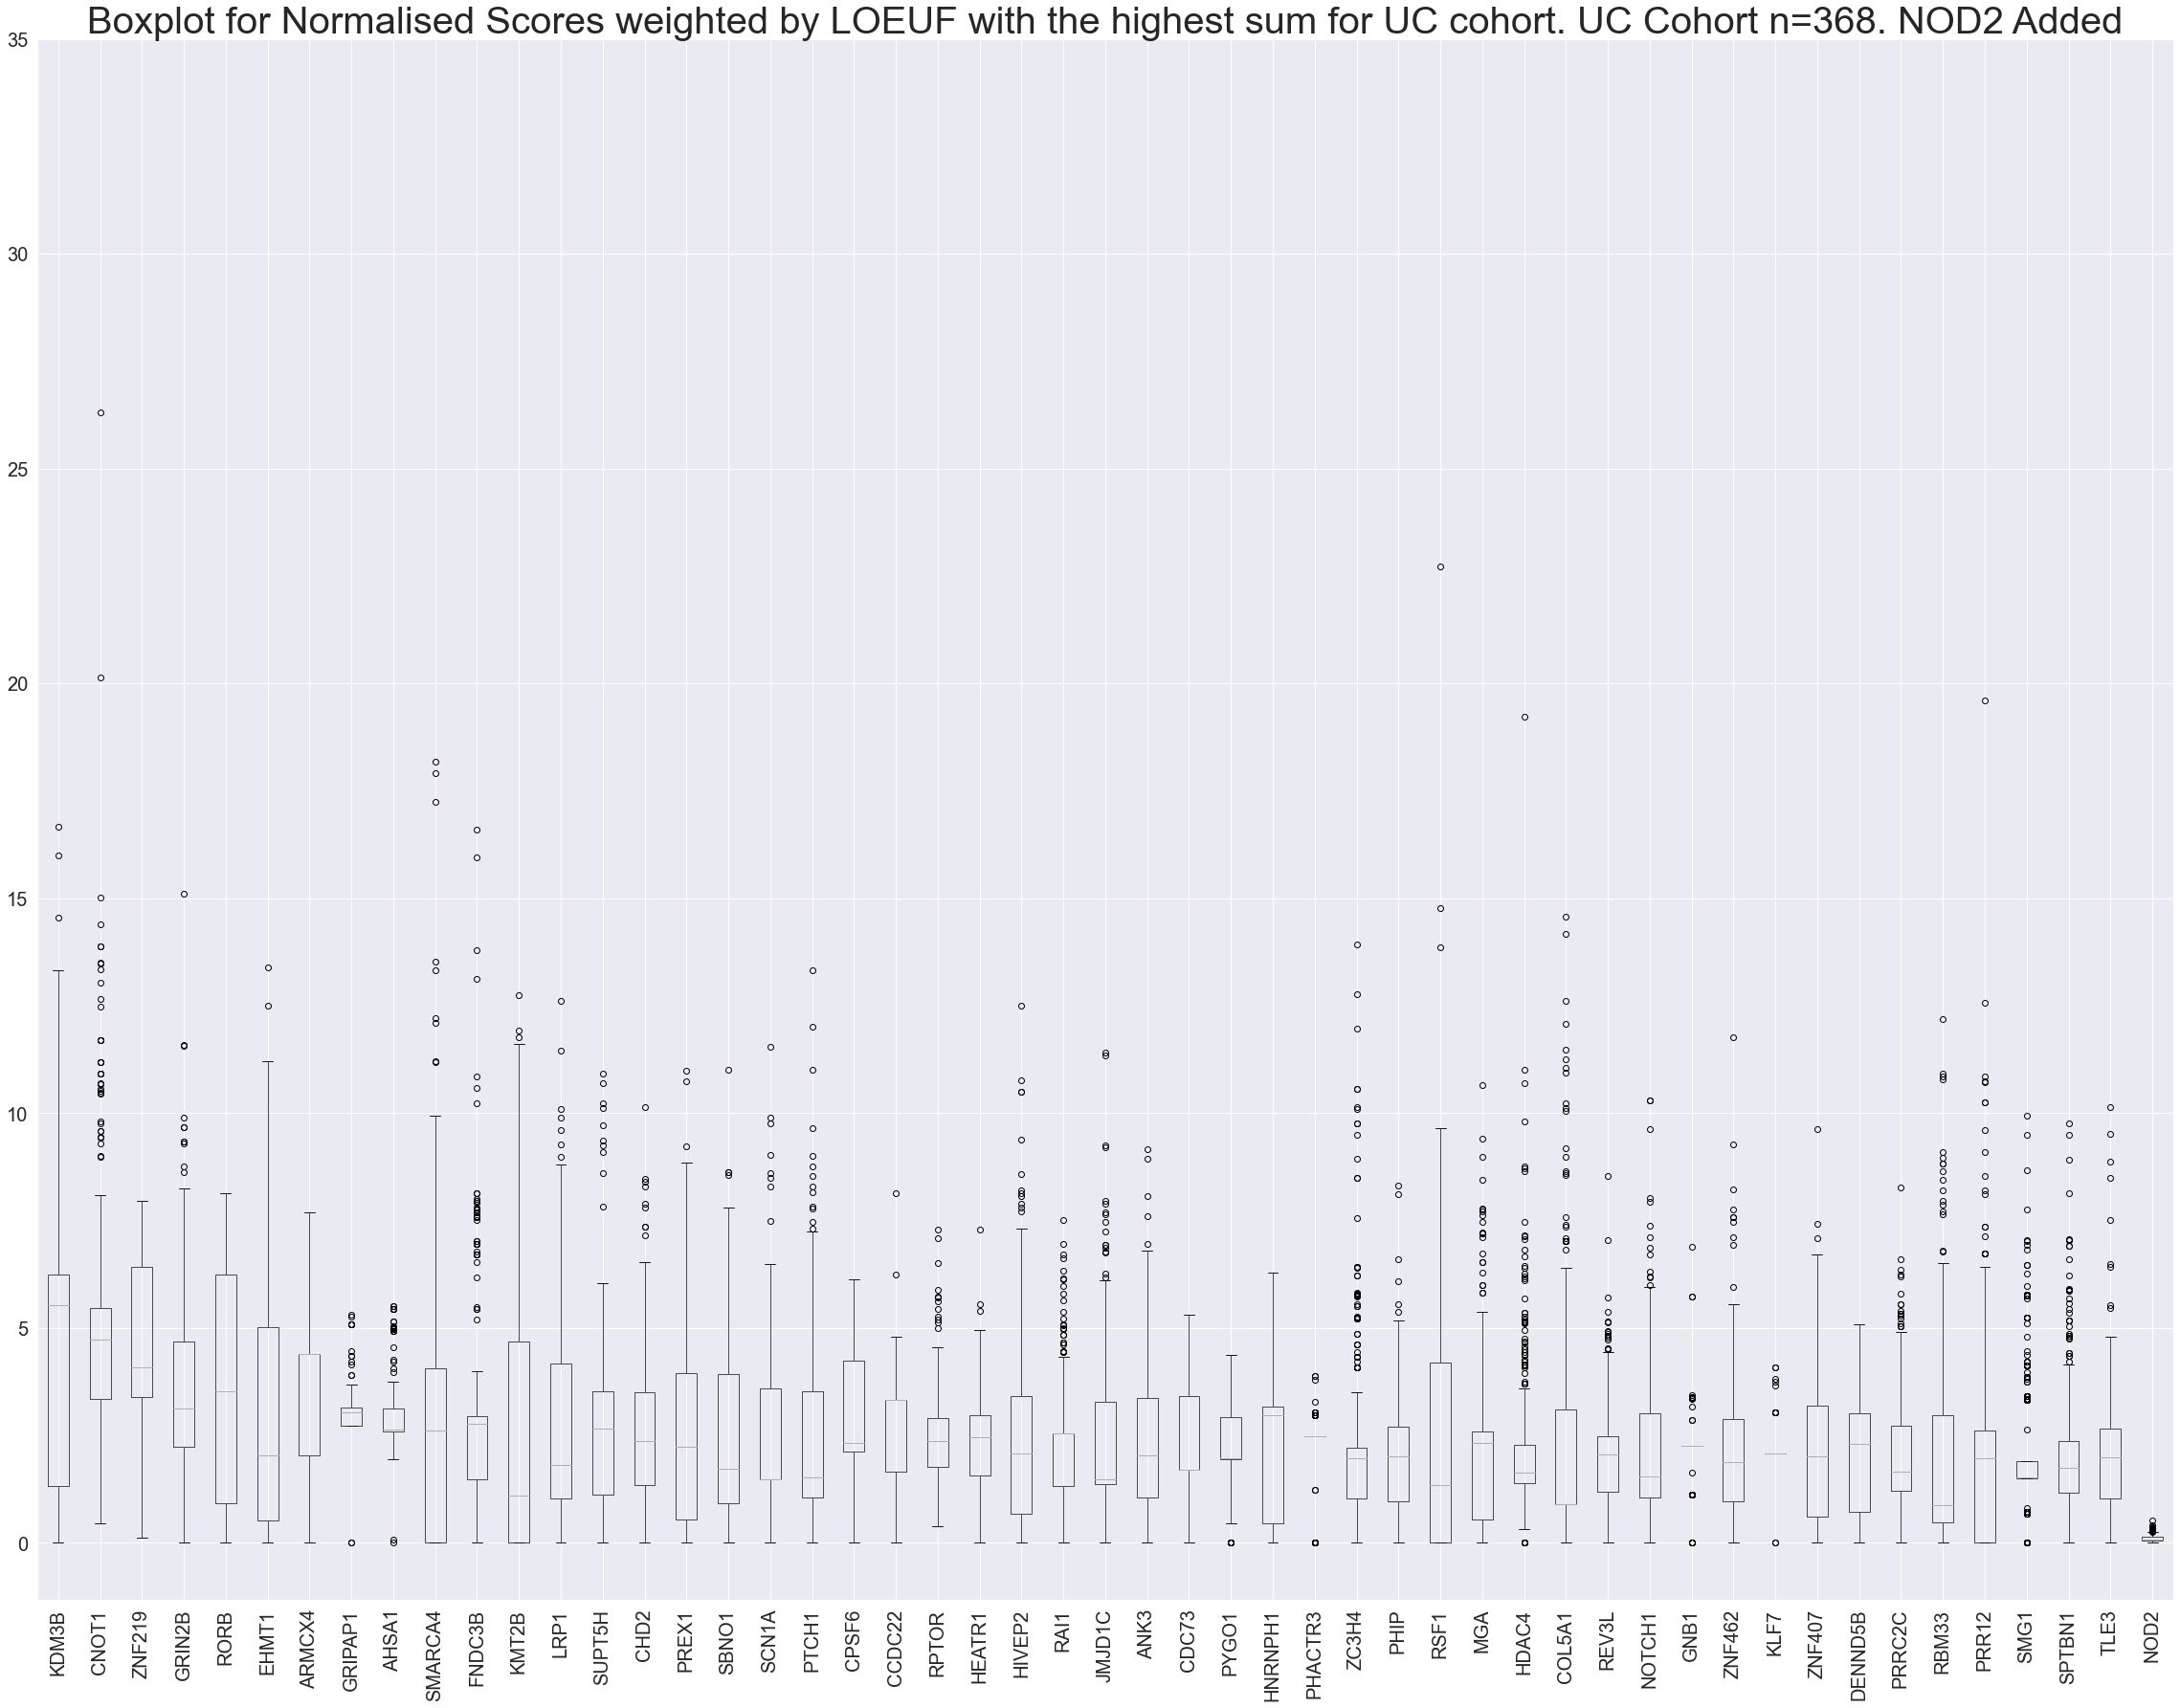

In [113]:
boxUC = UC_subset[top_UC_sum].boxplot()
boxUC.set_title('Boxplot for Normalised Scores weighted by LOEUF with the highest sum for UC cohort. UC Cohort n=368. NOD2 Added',
                size=40)
boxUC.tick_params(axis = 'x', 
                  labelrotation=90)
boxUC.tick_params(labelsize=20)
boxUC.set_yticks(ticks=boxlabels)
boxUC.figure.savefig('TopUC_box.png')

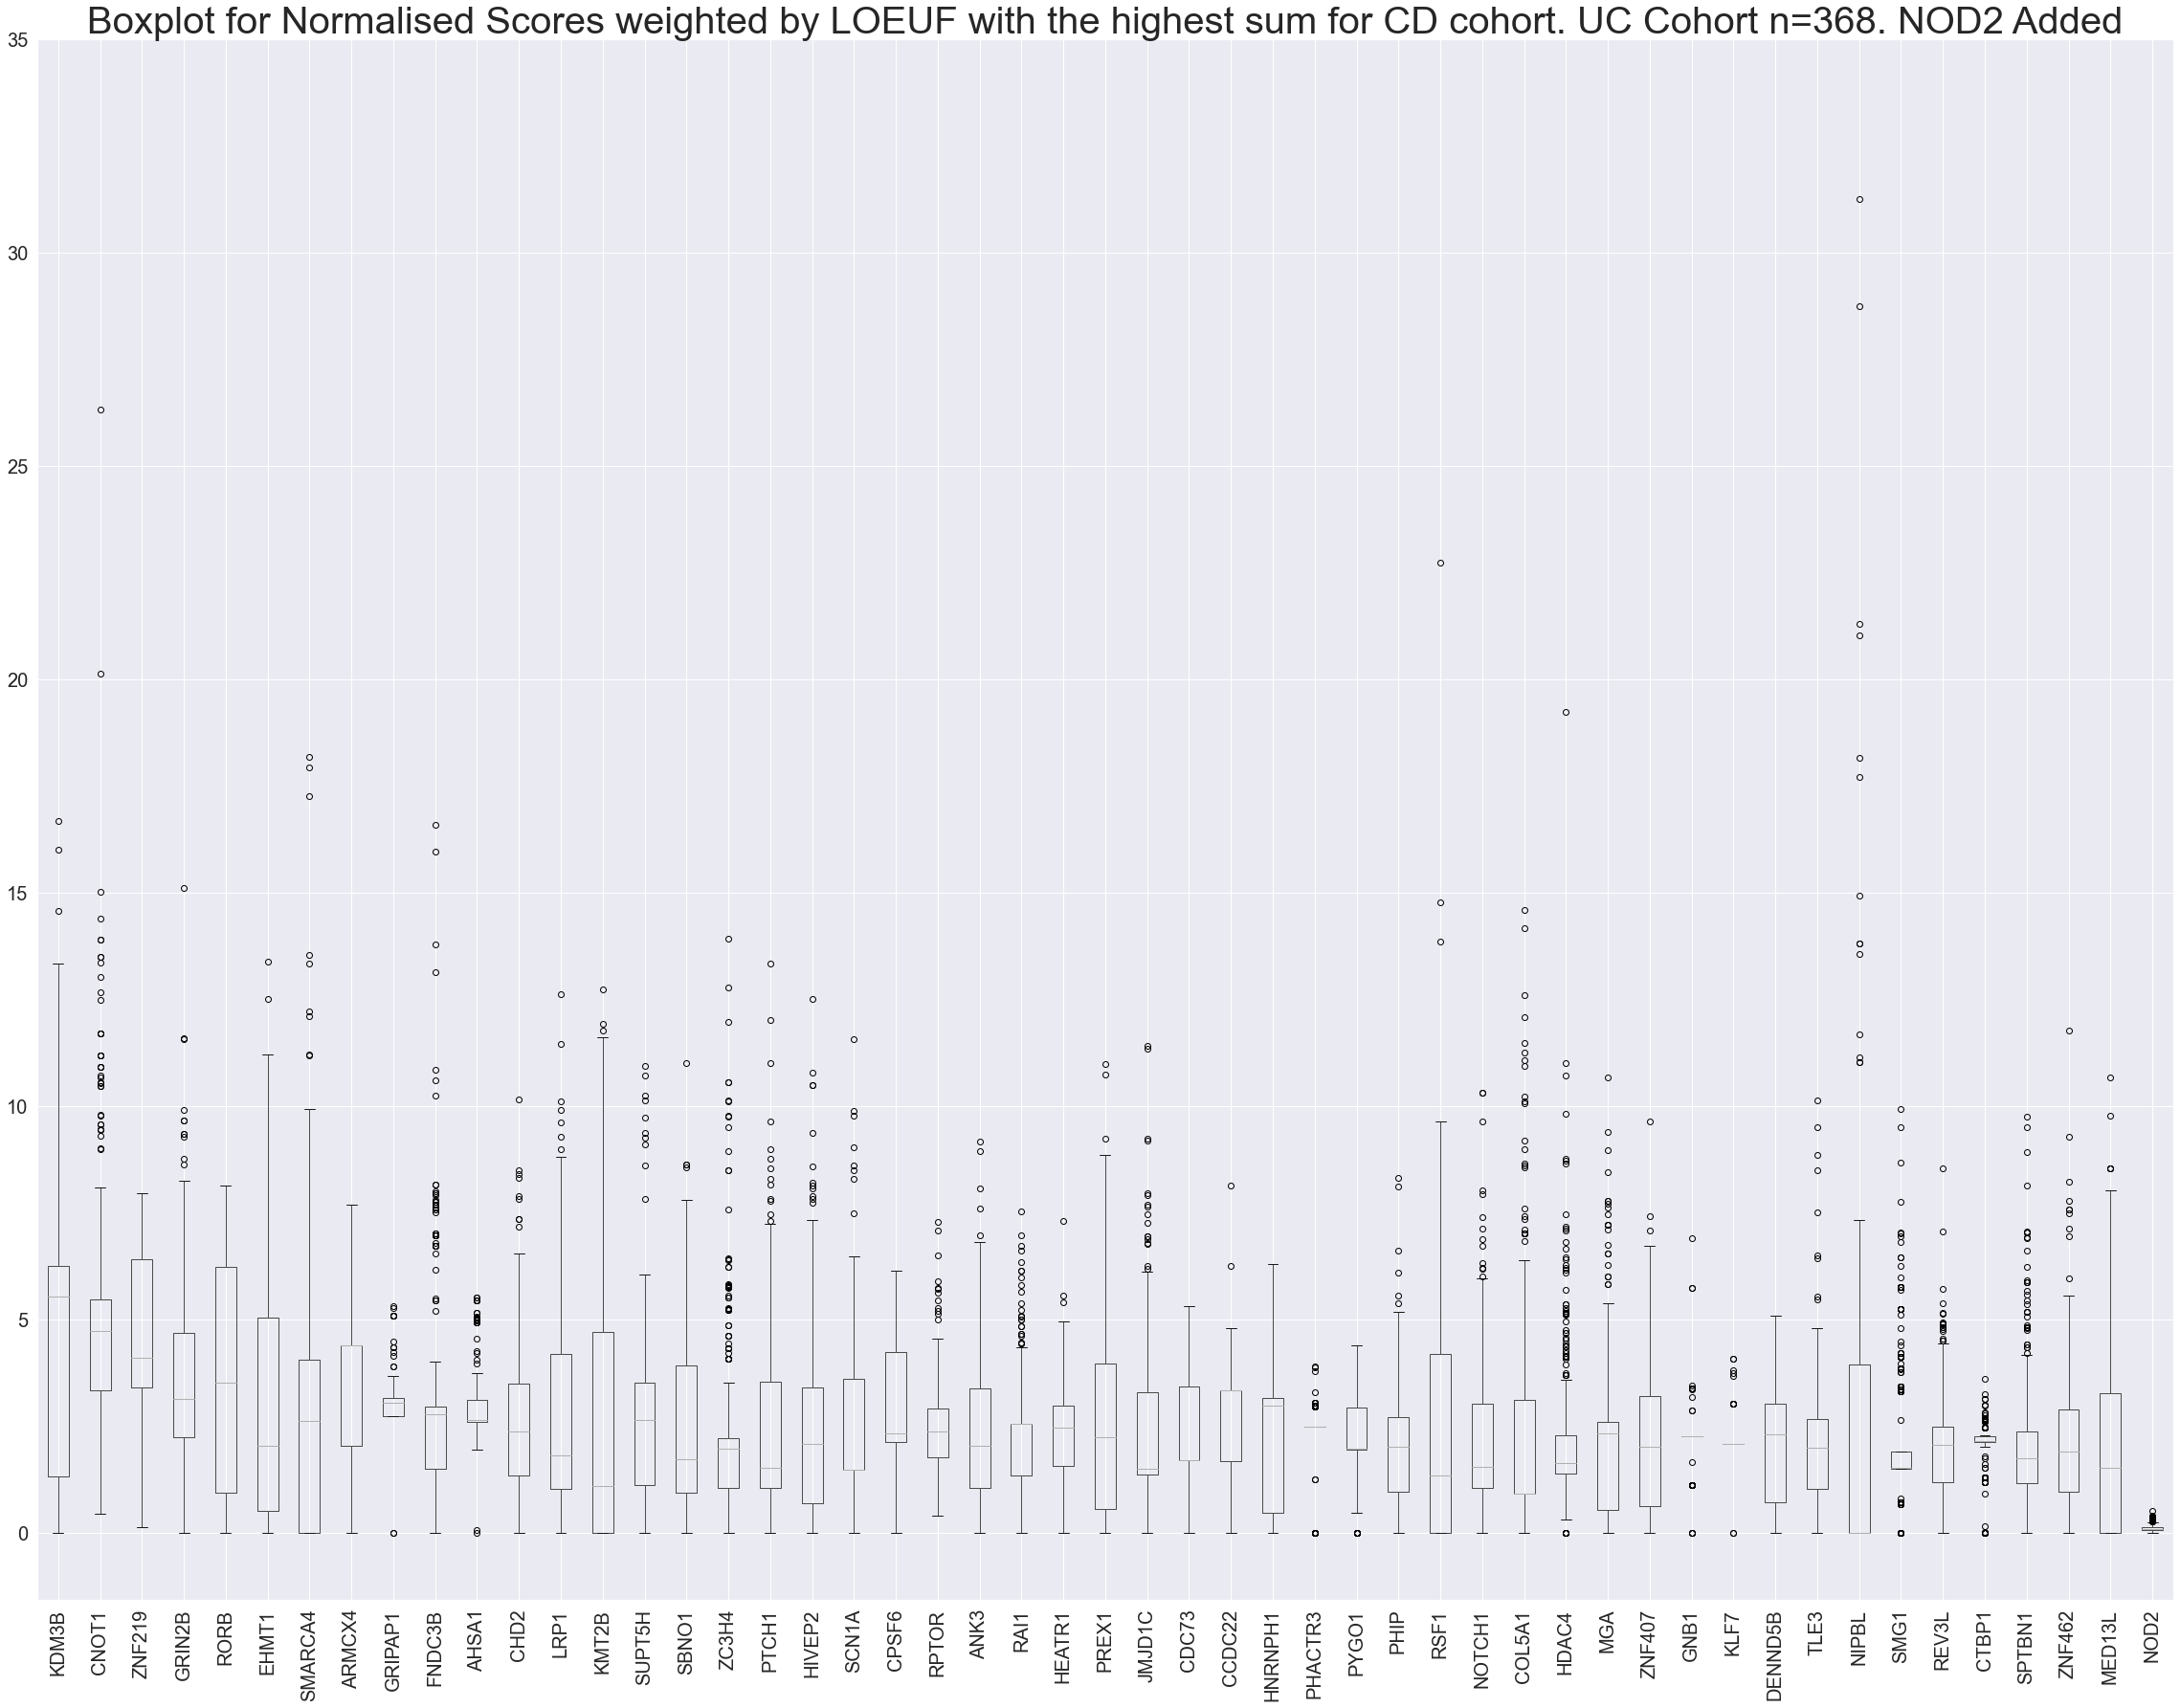

In [115]:
boxUC_with_topCDgenes = UC_subset[top_CD_sum].boxplot()
boxUC_with_topCDgenes.tick_params(axis='x',labelrotation=90)
boxUC_with_topCDgenes.tick_params(labelsize=20)
boxUC_with_topCDgenes.set_yticks(ticks=boxlabels)
boxUC_with_topCDgenes.set_title('Boxplot for Normalised Scores weighted by LOEUF with the highest sum for CD cohort. UC Cohort n=368. NOD2 Added',
                                size=40)
boxUC_with_topCDgenes.figure.savefig('boxUC_top_CD_genes.png')

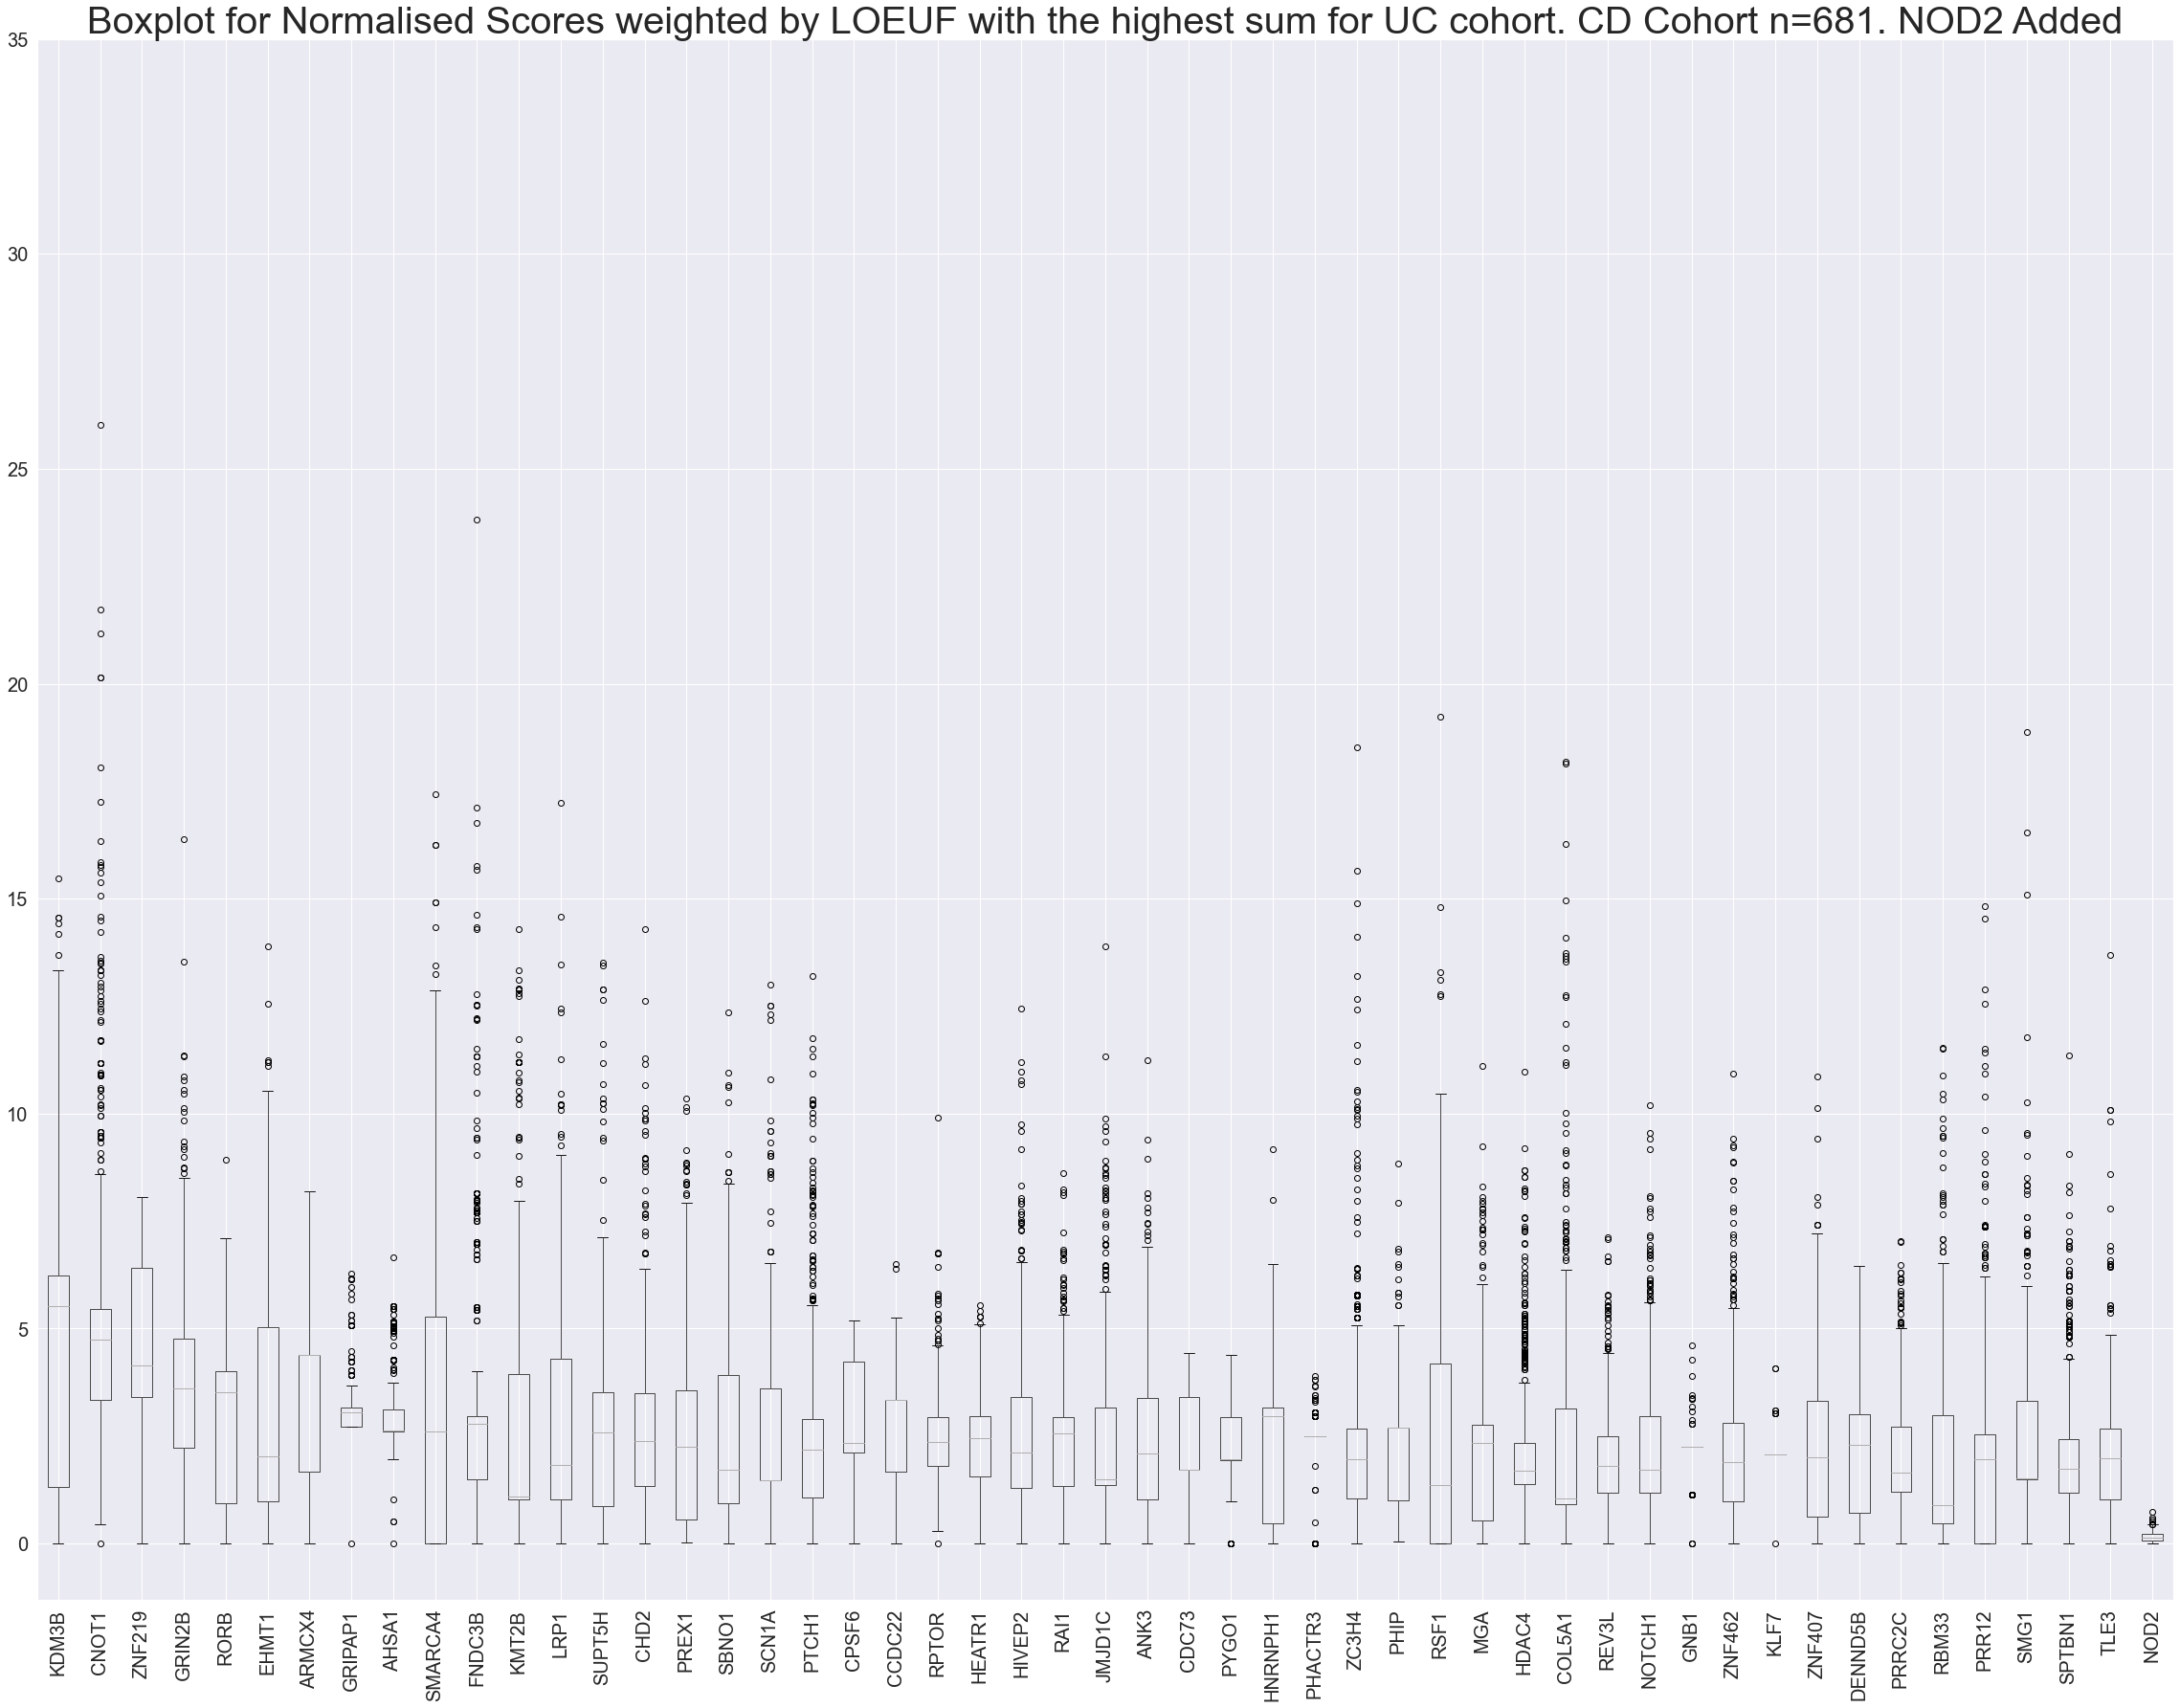

In [116]:
boxCD_with_topUCgenes = CD_subset[top_UC_sum].boxplot()
boxCD_with_topUCgenes.tick_params(axis='x', labelrotation=90)
boxCD_with_topUCgenes.set_yticks(ticks=boxlabels)
boxCD_with_topUCgenes.tick_params(labelsize=20)
boxCD_with_topUCgenes.set_title('Boxplot for Normalised Scores weighted by LOEUF with the highest sum for UC cohort. CD Cohort n=681. NOD2 Added',
                                size=40)
boxCD_with_topUCgenes.figure.savefig('boxCD_top_UC_genes.png')

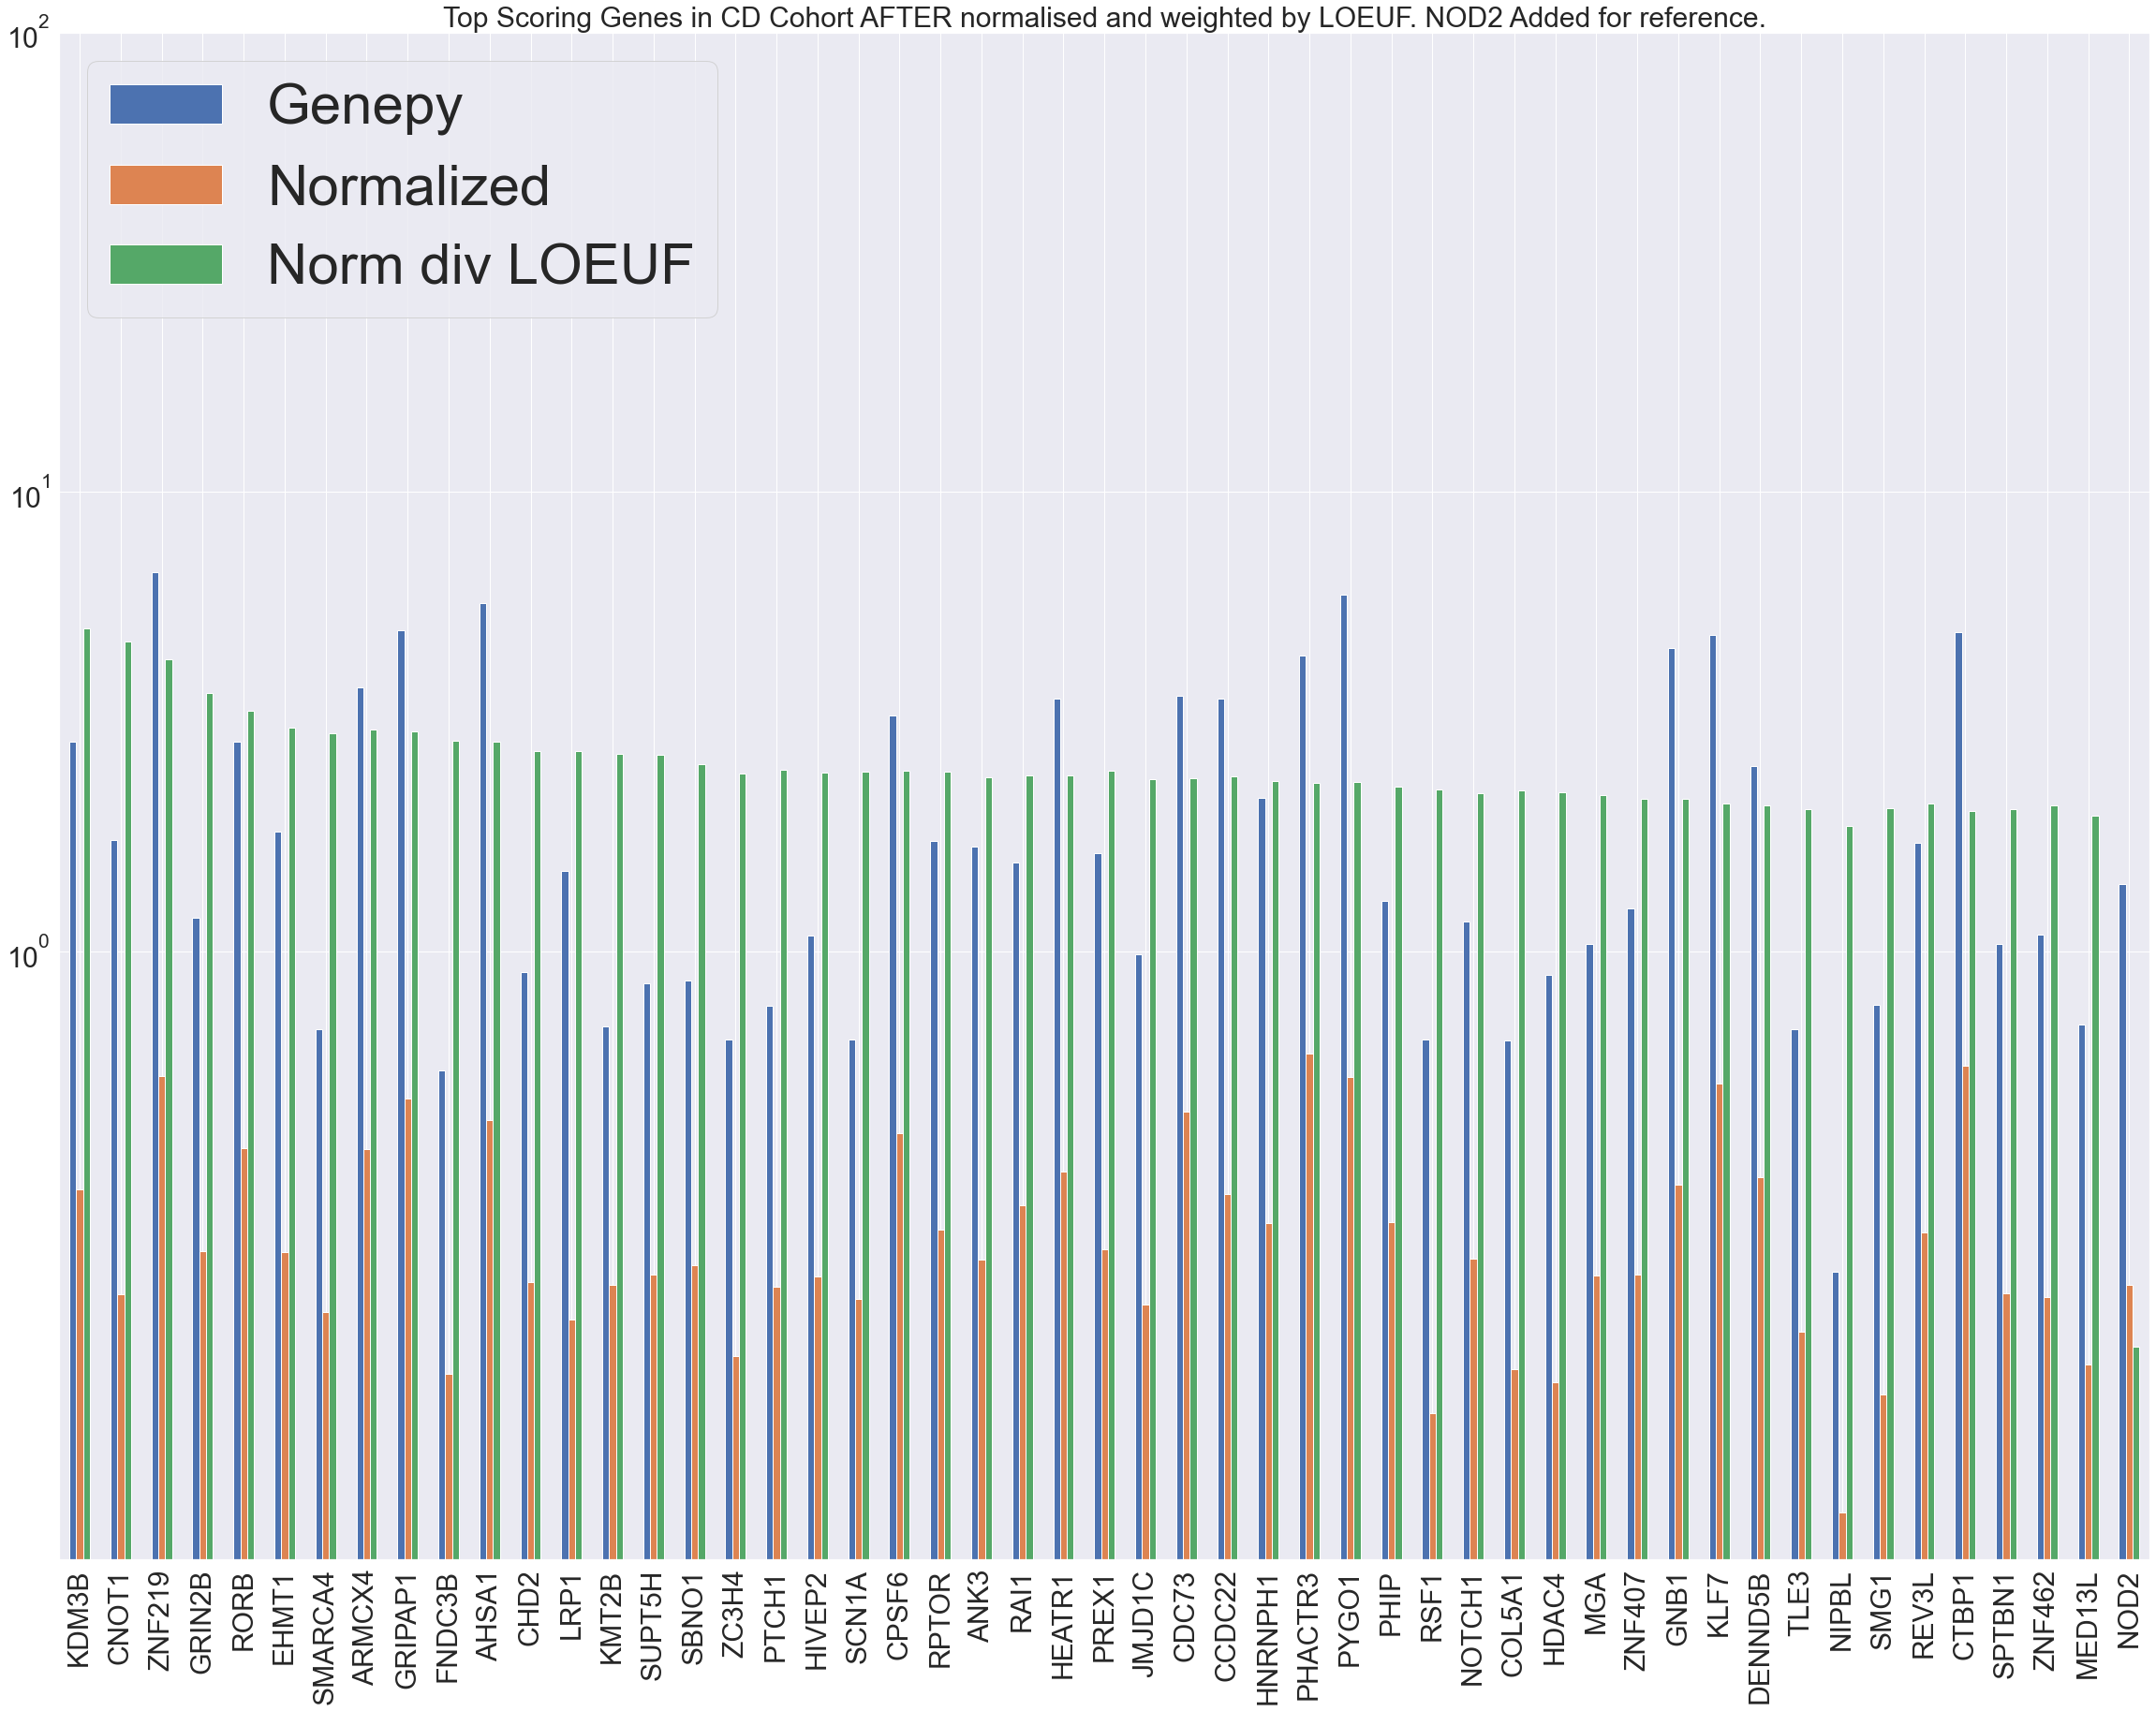

In [131]:
import seaborn as sns
gen_top = genepy_df[top_CD_sum].mean().rename("Genepy")
norm_top = genepy_normalized[top_CD_sum].mean().rename("Normalized")
norm_loeuf_top = genepy_norm_loeuf[top_CD_sum].mean().rename("Norm div LOEUF")


df = pd.concat([gen_top, norm_top, norm_loeuf_top], axis=1)
sns.set(rc = {'figure.figsize':(40,30)})
#title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
ax = df.plot.bar(logy=True, yticks = (1, 10, 100), fontsize=30)
ax.legend(loc=2, prop={'size': 60})
ax.set_title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.', size=30)
ax.figure.savefig('TopCDBar.png')

In [62]:
genepy_sum = genepy_df.sum()>6000
genepy_sum
top_gen_sum = genepy_sum[genepy_sum].index
## TODO Add NOD2
top_gen_sum
#CD_subset[top_CD_mean].boxplot()
def get_top_genes(df, number=50, add_NOD2=True):
    top_df_sum = df.sum().sort_values(ascending=False).head(number).index.values
    if add_NOD2==True:
        top_df_sum = np.append(top_df_sum, [['NOD2']])
    else:
        pass
    return top_df_sum

get_top_genes(genepy_df)

array(['MUC16', 'SERPINB11', 'PLXNA3', 'MUC19', 'PKD1L2', 'MRC1', 'JRK',
       'KIAA1671', 'ZNF180', 'NPEPL1', 'TTN', 'GC', 'MUC5AC', 'TG',
       'CELA2A', 'ZNF750', 'CARD8', 'RNF126', 'KLHL33', 'CHRND',
       'CYP2C19', 'TYW1B', 'TCTE1', 'GRIN2C', 'GDF5', 'OR52E5',
       'CEACAM20', 'OBSCN', 'HMCN2', 'CRKL', 'PFKP', 'FMO2', 'EFCAB8',
       'NT5DC3', 'LBP', 'FDXR', 'EXOC6', 'AHNAK2', 'RP1L1', 'GET4',
       'XAB2', 'PLEC', 'ST6GALNAC2', 'SPATS2L', 'TRAPPC5', 'ZNF268',
       'TUBGCP6', 'PRUNE2', 'OR1N2', 'CACNA1F', 'NOD2'], dtype=object)

In [132]:
def plot_scores(index_top_scores):
    '''
    Function to plot top scores 
    '''
    gen_top = genepy_df[index_top_scores].mean().rename("Genepy")
    norm_top = genepy_normalized[index_top_scores].mean().rename("Normalized")
    norm_loeuf_top = genepy_norm_loeuf[index_top_scores].mean().rename("Norm div LOEUF")

    df = pd.concat([gen_top, norm_top, norm_loeuf_top], axis=1)

    ax = df.plot.bar(logy=True, yticks = (1, 10, 100), fontsize=30)
    ax.legend(loc=2, prop={'size': 60})
    return ax

In [86]:
UC_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, AP0045 to SORL0041
Columns: 16794 entries, A1BG to ZZZ3
dtypes: float64(16794)
memory usage: 47.2+ MB


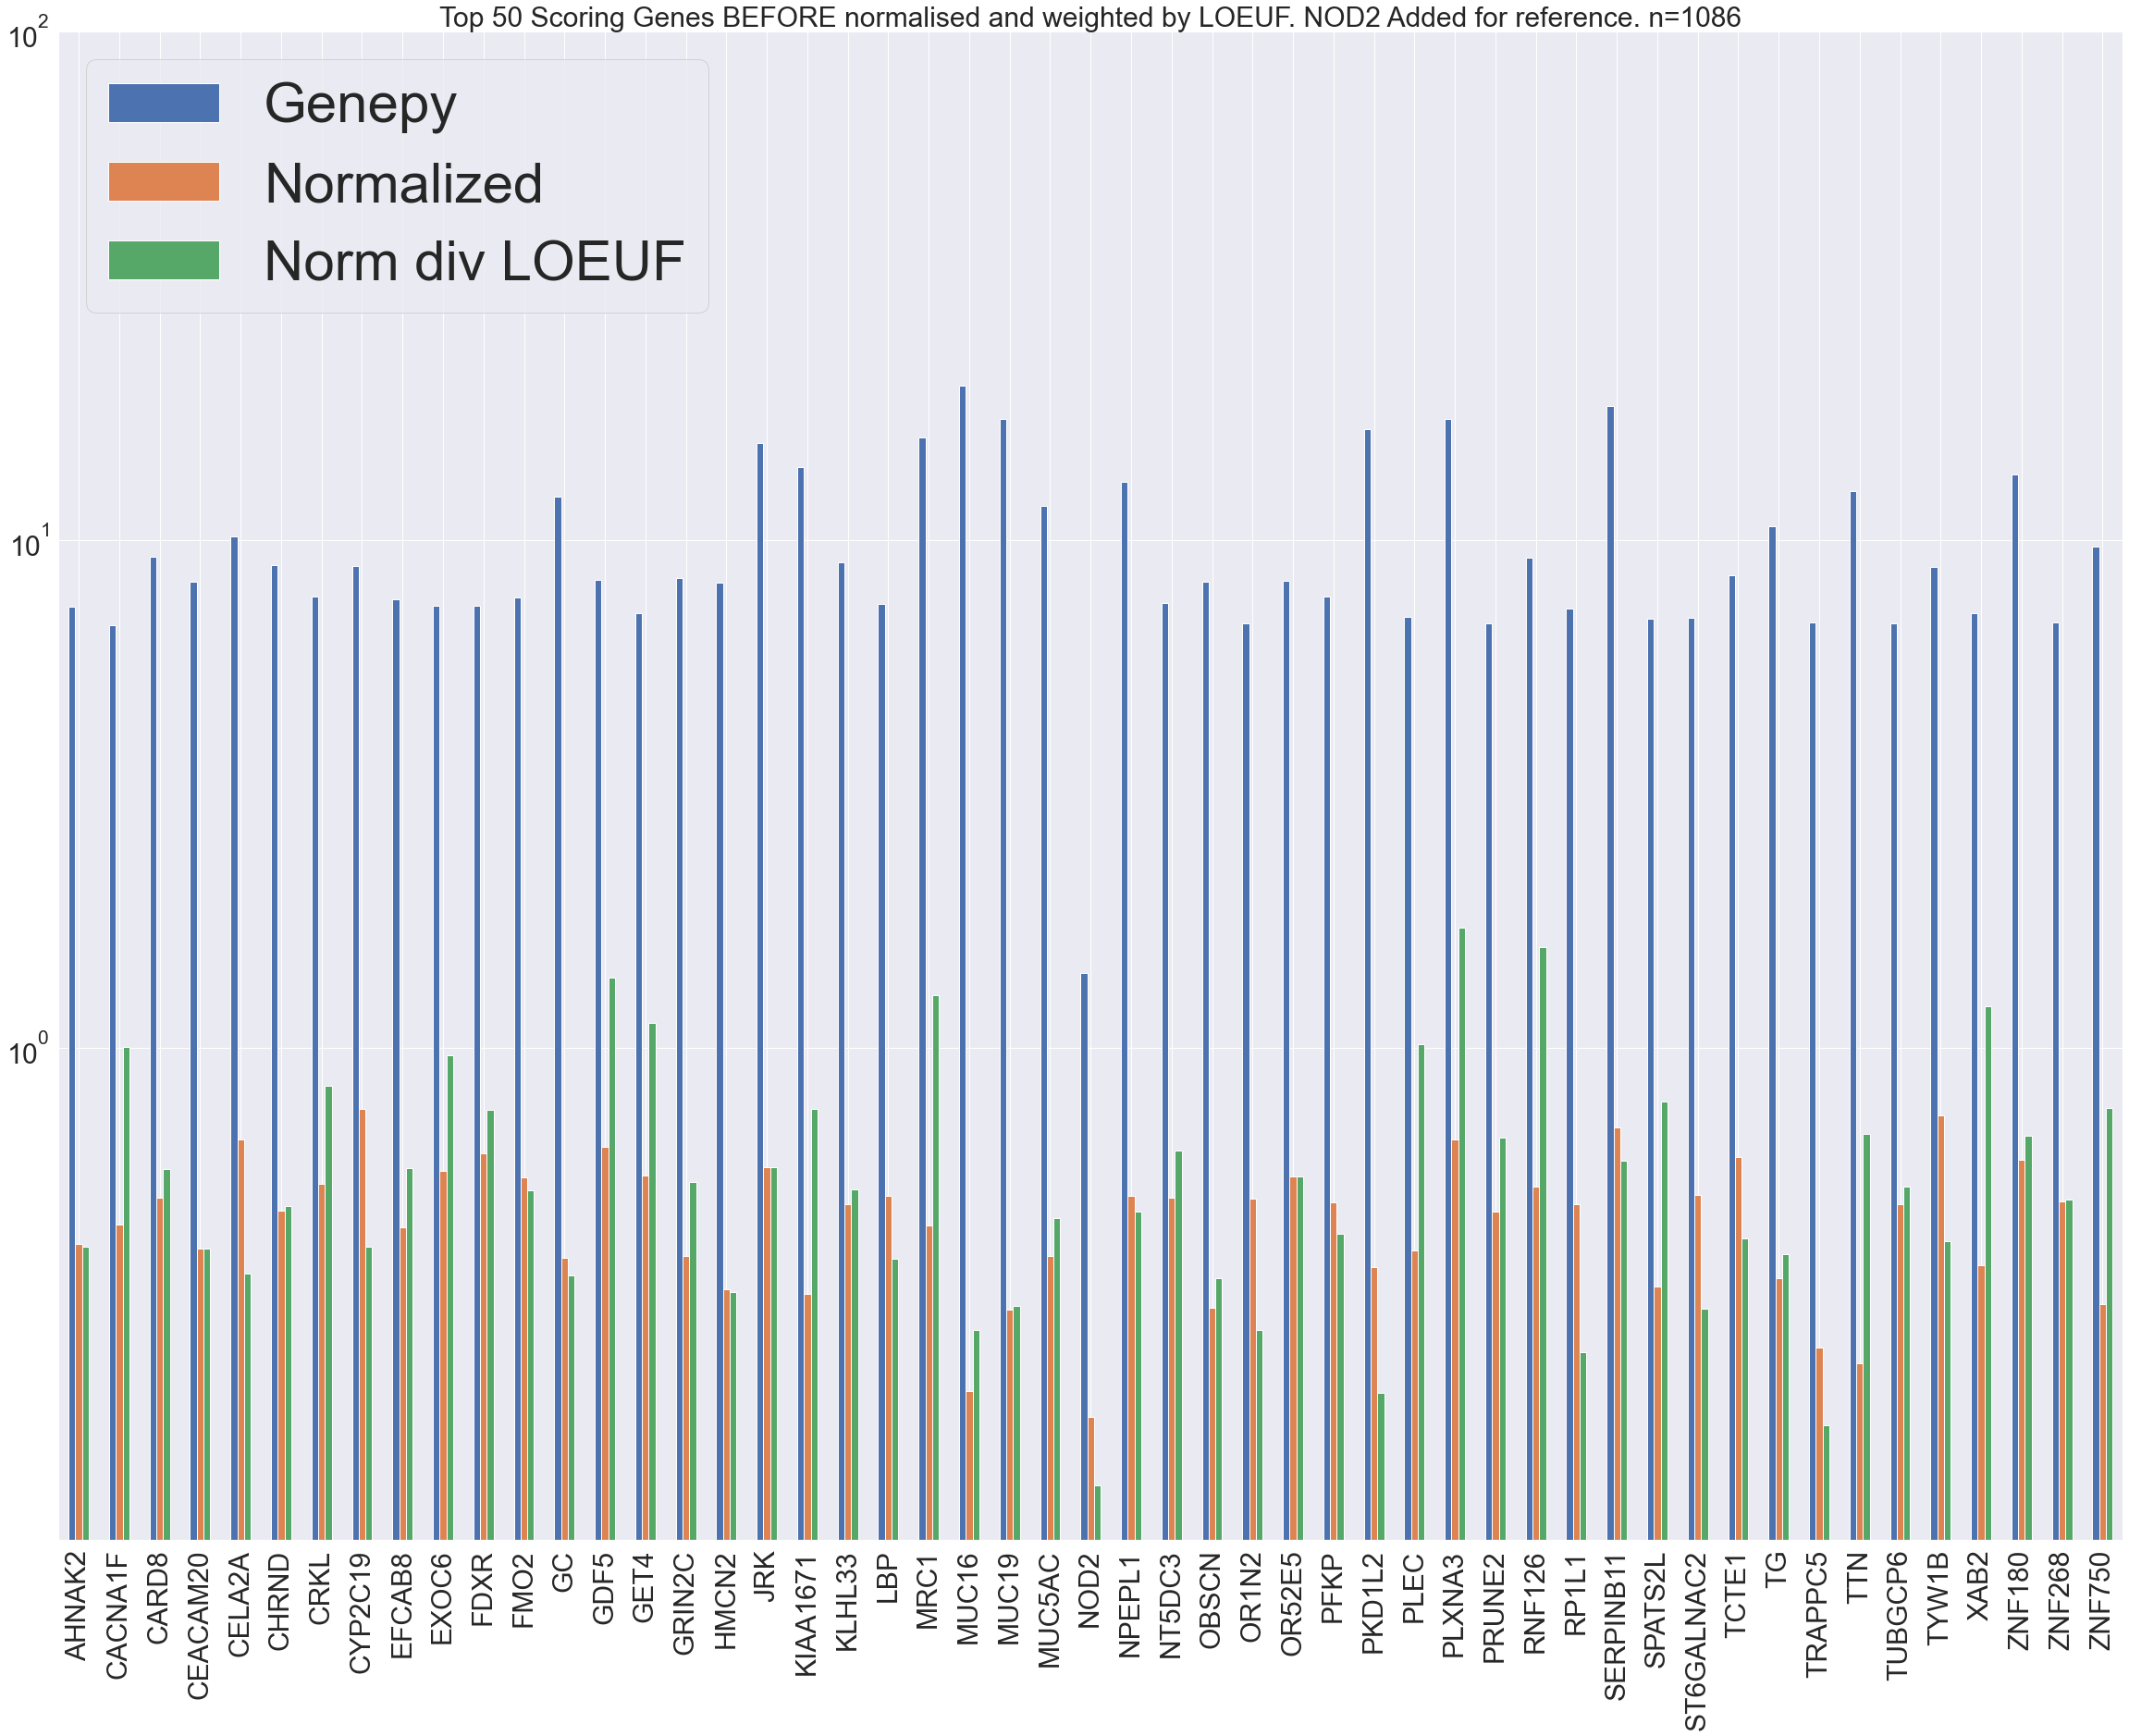

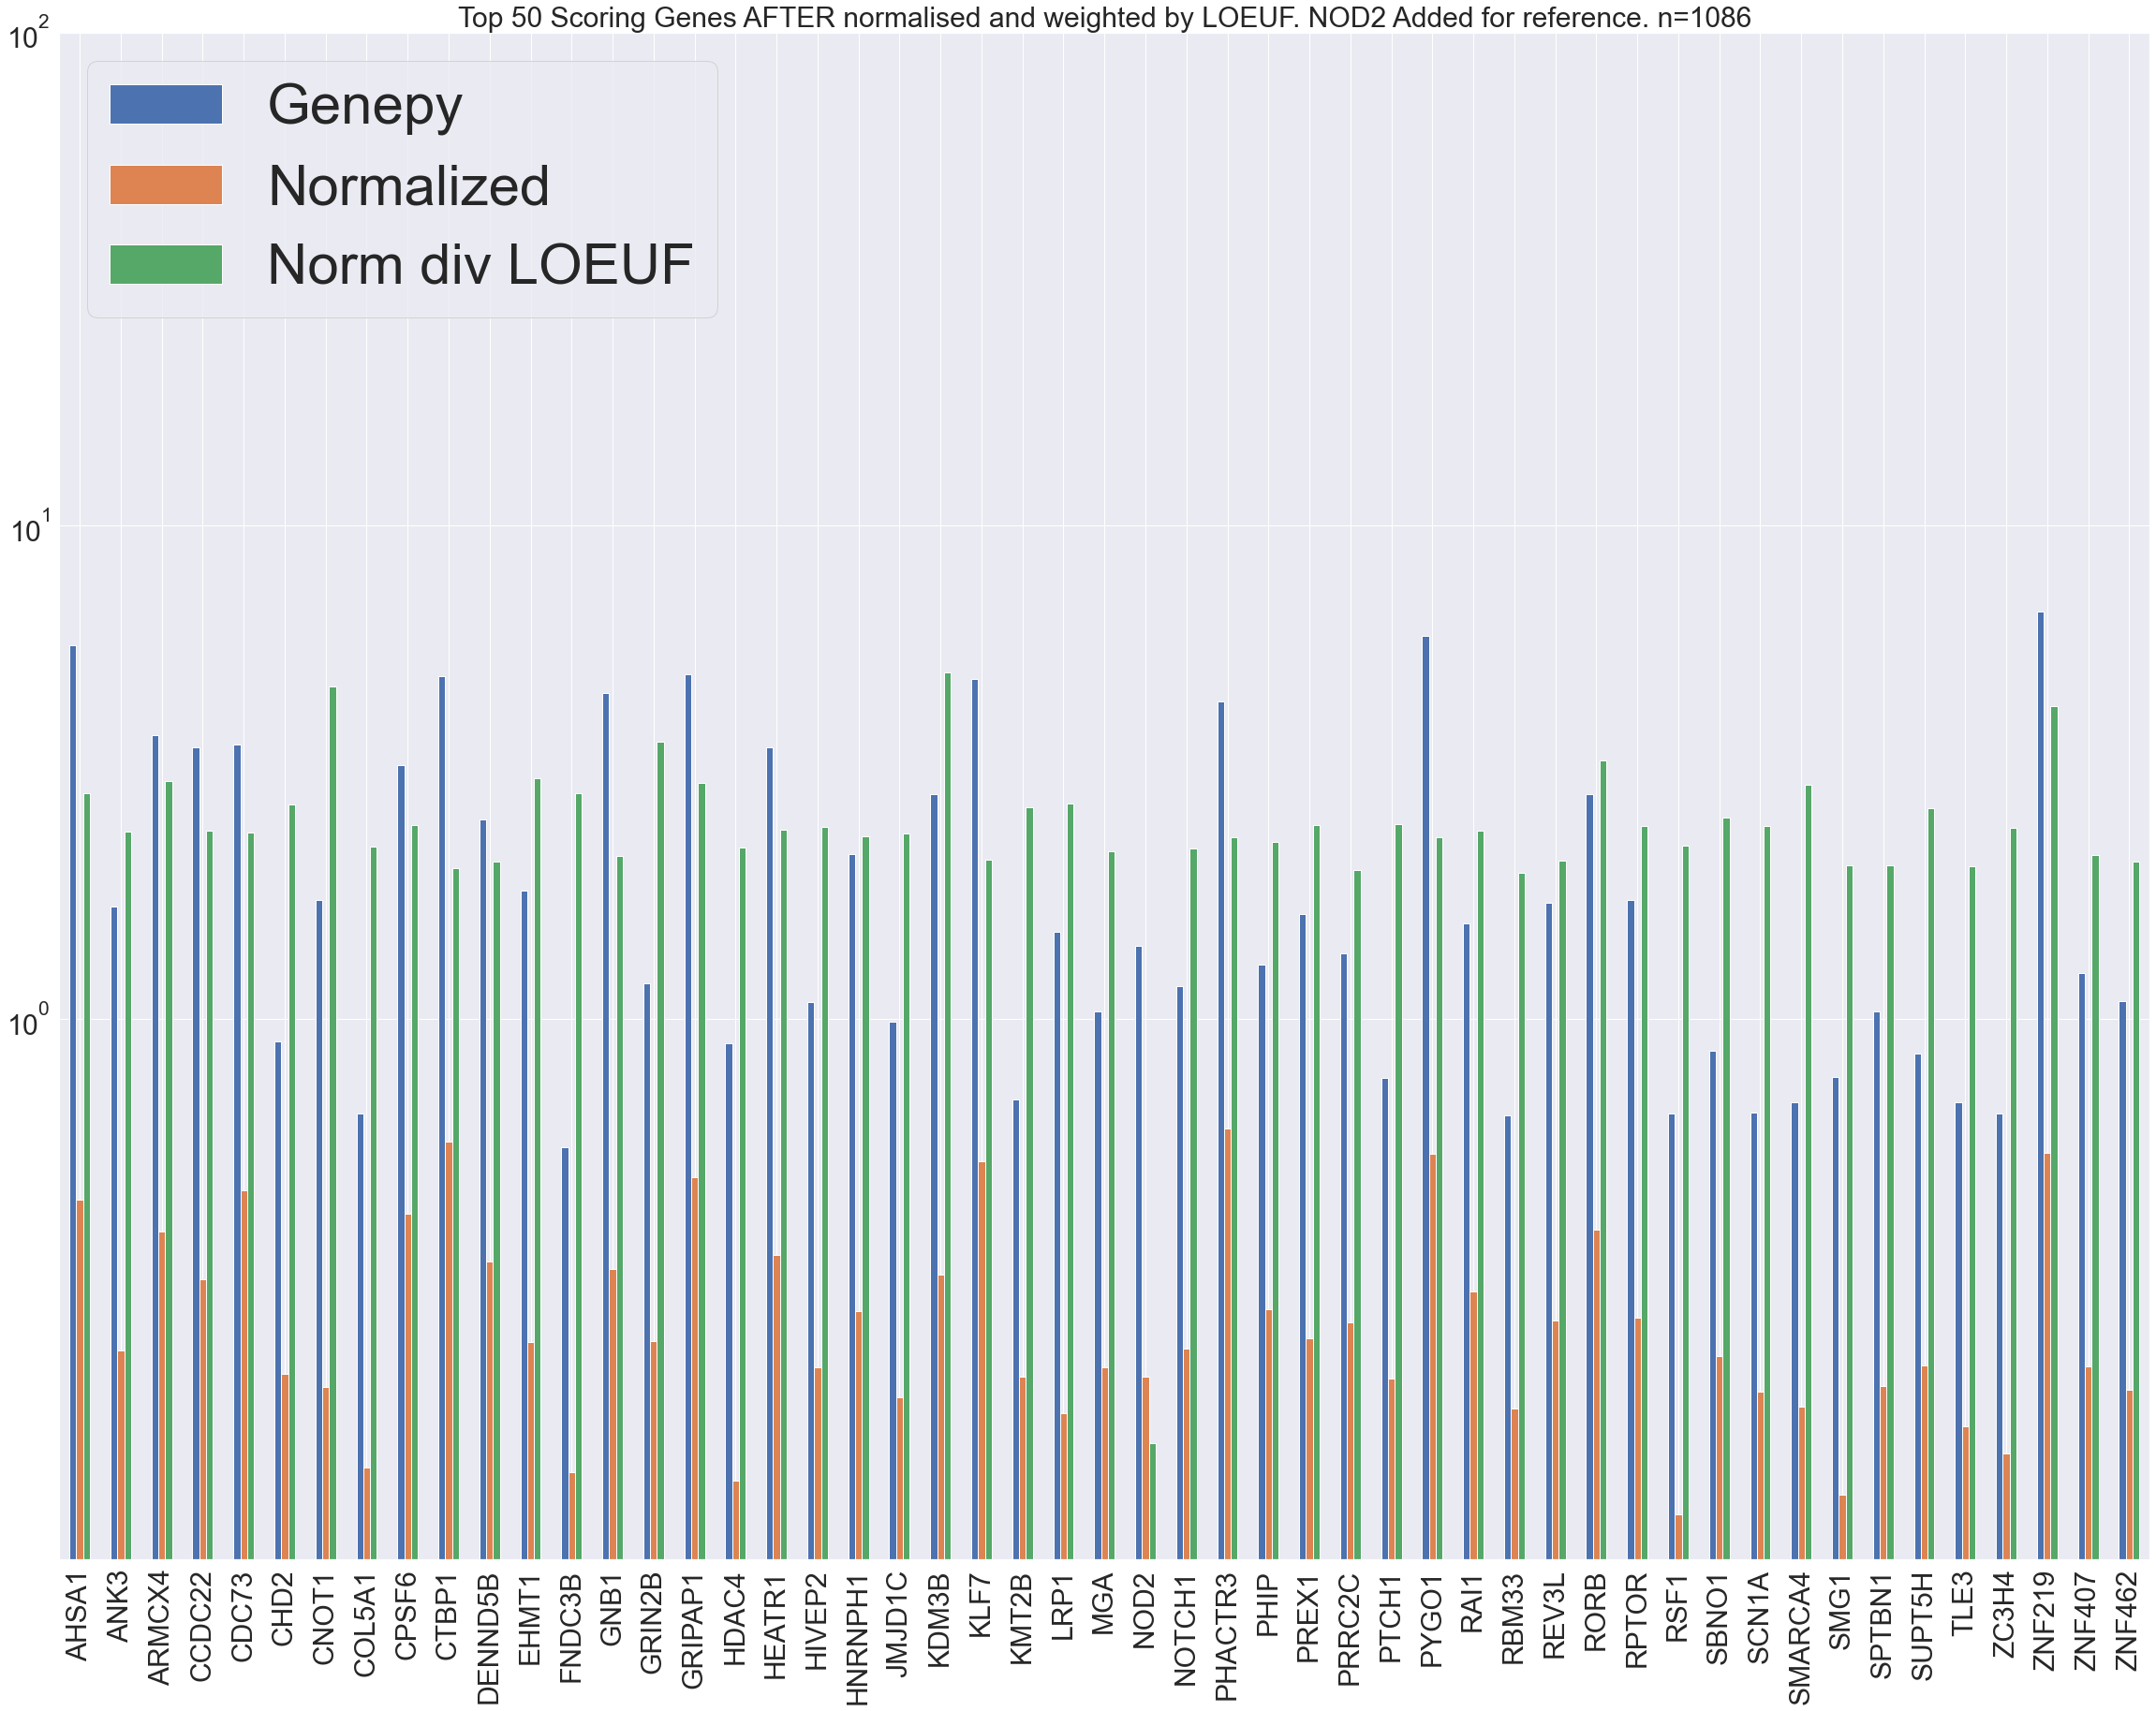

In [133]:
# Add NOD2 save as PNG
genepy_bar = plot_scores(sorted(get_top_genes(genepy_df)))
genepy_bar.set_title('Top 50 Scoring Genes BEFORE normalised and weighted by LOEUF. NOD2 Added for reference. n=1086', fontsize=30)
genepy_bar.figure.savefig('barplot_genepy_mean.png')

norm_loeuf = plot_scores(sorted(get_top_genes(genepy_norm_loeuf)))
norm_loeuf.set_title('Top 50 Scoring Genes AFTER normalised and weighted by LOEUF. NOD2 Added for reference. n=1086', fontsize=30)
norm_loeuf.figure.savefig('barplot_norm_loeuf_mean.png')


In [135]:
# Add NOD2 save as PNG
CD_bar = plot_scores(sorted(CD_sum[top_CD_sum]))
CD_bar.set_title('Top 50 Scoring Genes BEFORE normalised and weighted by LOEUF. NOD2 Added for reference. n=1086', fontsize=30)
CD_bar.figure.savefig('barplot_genepy_mean.png')

UC_bar = plot_scores(sorted(get_top_genes(genepy_norm_loeuf)))
UC_bar.set_title('Top 50 Scoring Genes AFTER normalised and weighted by LOEUF. NOD2 Added for reference. n=1086', fontsize=30)
UC_bar.figure.savefig('barplot_norm_loeuf_mean.png')


IndexError: arrays used as indices must be of integer (or boolean) type

# Top 50 Scores for GenePy, Normalised and weighted by LOEUF

In [117]:
# norm+loeuf 
norm_loeuf = genepy_norm_loeuf.max().sort_values(ascending=False).head(50).to_frame()
norm_loeuf = norm_loeuf.reset_index()
norm_loeuf = norm_loeuf.rename(columns={"index": "Norm/loeuf",0: "Norm/loeuf score"})

# norm
norm = genepy_normalized.max().sort_values(ascending=False).head(50).to_frame()
norm = norm.reset_index()
norm = norm.rename(columns={"index": "Normalised",0: "Normalised score"})

#raw
genepy = genepy_df.max().sort_values(ascending=False).head(50).to_frame()
genepy = genepy.reset_index()
genepy = genepy.rename(columns={"index": "Genepy",0: "Genepy score"})

big_boi = genepy.join(norm).join(norm_loeuf)

In [118]:
big_boi 

,Genepy,Genepy score,Normalised,Normalised score,Norm/loeuf,Norm/loeuf score
0,ATP5F1B,93.537414,LIPC,1.0,MED13,33.333333
1,MUC16,69.477991,CDC42BPG,1.0,NIPBL,31.250000
2,TRIP12,59.673383,HEYL,1.0,SMC3,27.027027
3,MUC19,56.477515,SLC6A5,1.0,CNOT1,26.315789
4,CBX3,54.355592,RNF175,1.0,PCF11,25.000000
5,HNRNPF,49.316684,MEAK7,1.0,RLF,25.000000
6,TTN,48.519186,VAT1,1.0,FNDC3B,23.809524
7,BGN,43.347534,GLP1R,1.0,TAF1,23.255814
8,KIAA1671,42.393059,BBS4,1.0,RSF1,22.727273
9,SLC7A3,39.050924,BTG4,1.0,NCKAP1,22.727273


In [13]:
CD_subset = pd.DataFrame()
UC_subset = pd.DataFrame()
other_subset = pd.DataFrame()

for patient_x in genepy_norm_loeuf.index:
    for patient_y in patient_phe.index:
        if patient_x == patient_y:
            if patient_phe.loc[:,'Diagnosis'] == 'CD':
                s = genepy_norm_loeuf.loc[patient_x]
                CD_subset = CD_subset.append(s)
            elif patient_phe.loc[:,'Diagnosis']== 'UC':
                s = genepy_norm_loeuf.loc[patient_x]
                UC_subset = UC_subset.append(s)
            else: 
                s = genepy_norm_loeuf.loc[patient_x]
                other_subset = other_subset.append(s)
        else:
            continue


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
if patient_phe.loc[:,'Diagnosis'] == 'CD':
    

SyntaxError: 'return' outside function (1885372617.py, line 2)

In [54]:
patient_phe

,gender,Diagnosis
IID,,
AP0013,female,CD
AP0030,female,CD
AP0045,male,UC
AP0046,female,UC
AP0055,female,NOT_IBD
...,...,...
SORL0038,male,UC
SORL0039,female,CD
SORL0040,female,UC


In [72]:
import numpy as np
def get_diagnosis(diagnosis):
    return patient_phe.loc[:,'Diagnosis'] == diagnosis

In [73]:
def get_diagnosis_index(diagnosis):
    return patient_phe.iloc[np.where(get_diagnosis(diagnosis))[0]].index


In [76]:
CD_subset = genepy_norm_loeuf.loc[get__diagnosis_index('CD')]
UC_subset = genepy_norm_loeuf.loc[get__diagnosis_index('UC')]
NOT_IBD_subset = genepy_norm_loeuf.loc[get__diagnosis_index('NOT_IBD')]
IBDU_subset = genepy_norm_loeuf.loc[get__diagnosis_index('IBDU')]


In [81]:
get_diagnosis('CD')


IID
AP0013       True
AP0030       True
AP0045      False
AP0046      False
AP0055      False
            ...  
SORL0038    False
SORL0039     True
SORL0040    False
SORL0041    False
SORL0042    False
Name: Diagnosis, Length: 1086, dtype: bool

In [84]:
def get_diagnosis_df(df, diagnosis):
    '''
    
    '''
    def get_diagnosis(diagnosis):
        return patient_phe.loc[:,'Diagnosis'] == diagnosis
    index_value = patient_phe.iloc[np.where(get_diagnosis(diagnosis))[0]].index
    return df.loc[index_value]

Object `get__diagnosis_df(genepy_norm_loeuf,)` not found.


### Created CSV of subset CD and UC patients
---

In [1]:
from get_data import UC_subset

            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.097623  0.027245  0.107498  0.011378  0.041579  0.028535  0.055493   
AP0030  0.134882  0.000000  0.018830  0.064448  0.000000  0.015138  0.022460   
AP0045  0.107196  0.000000  0.025388  0.034014  0.000000  0.007506  0.030282   
AP0046  0.179652  0.000000  0.025081  0.118953  0.014841  0.007415  0.029915   
AP0055  0.091878  0.000000  0.038677  0.072722  0.008690  0.007527  0.080610   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.026087  0.010998   0.0   
AP0030  0.018639   0.0  0.004263  ...   0.0  0.011772  0.007656   0.0   
AP0045  0.000000   0.0  0.121555  ...   0.0  0.000000  0.010323   0.0   
AP0046  0.024826   0.0  0.000000  ...   0.0  0.000000  0.010197   0.0   
A

In [2]:
from get_data import CD_subset

In [10]:
CD_subset_sum = CD_subset.sum().sort_values(ascending=False)

In [11]:
CD_subset_sum.to_csv('../Data/CD_subset_sum.csv', index=True,header=False)

In [5]:
CD_subset.loc['AP0013'].sort_values(ascending=False).head(2000).index.to_series(index=range(0,2000))

0         SPEN
1       ZNF219
2         MRC1
3         RORB
4          TTN
         ...  
1995       ZAN
1996     EFR3B
1997    SPTBN4
1998    CLCNKB
1999    ABCC10
Length: 2000, dtype: object

In [4]:
UC_subset_sum = UC_subset.sum().sort_values(ascending=False)

In [14]:
UC_subset_sum.to_csv('../Data/UC_subset_sum.csv', index=True,header=False)

# Testing Normalisation

In [120]:
normyyyy = genepy_df.apply(preprocessing.minmax_scale, 0)

In [122]:
normyyyy.max()

A1BG       1.0
A1CF       1.0
A2M        1.0
A2ML1      1.0
A3GALT2    1.0
          ... 
ZYG11A     1.0
ZYG11B     1.0
ZYX        1.0
ZZEF1      1.0
ZZZ3       1.0
Length: 16794, dtype: float64

## To csv

In [124]:
CD_subset.T.to_csv('../Data/CD_subset.csv', index=True,header=True)
UC_subset.T.to_csv('../Data/UC_subset.csv', index=True,header=True)

In [125]:
NOT_IBD_subset.T.to_csv('../Data/NOT_IBD_subset.csv', index=True,header=True)
IBDU_subset.T.to_csv('../Data/IBDU_subset.csv', index=True,header=True)

# Heatmaps
---

In [1]:
import get_data 
import get_patient
import get_PPI
import pandas as pd
import numpy as np
import matplotlib as plt


            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.097623  0.027245  0.107498  0.011378  0.041579  0.028535  0.055493   
AP0030  0.134882  0.000000  0.018830  0.064448  0.000000  0.015138  0.022460   
AP0045  0.107196  0.000000  0.025388  0.034014  0.000000  0.007506  0.030282   
AP0046  0.179652  0.000000  0.025081  0.118953  0.014841  0.007415  0.029915   
AP0055  0.091878  0.000000  0.038677  0.072722  0.008690  0.007527  0.080610   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.026087  0.010998   0.0   
AP0030  0.018639   0.0  0.004263  ...   0.0  0.011772  0.007656   0.0   
AP0045  0.000000   0.0  0.121555  ...   0.0  0.000000  0.010323   0.0   
AP0046  0.024826   0.0  0.000000  ...   0.0  0.000000  0.010197   0.0   
A

In [2]:
from get_data import genepy_df, genepy_normalized, genepy_norm_loeuf, patient_phenotype


In [3]:
from get_data import CD_subset, UC_subset, IBDU_subset, NOT_IBD_subset

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# select genes 

GO_list = open("../Data/GO_regulation_immune.txt", "r")
data = GO_list.read()
data_list = data.split("\n")
print(data_list)
GO_list.close()

def pathway_genes(file):
    my_file = open(file, "r")
    data = my_file.read()
    data_list = data.split("\n")
    return(data_list)
GO_reg_immune = pathway_genes("../Data/GO_regulation_immune.txt")
GO_cytokine = pathway_genes("../Data/GO_Cytokine.txt")
KEGG_cytokine = pathway_genes("../Data/KEGG_cytokine.txt")

['GO:0002682', 'NOTCH1', 'NLRP3', 'STAT3', 'ERAP1', 'IL1RL1', 'TNFRSF4', 'TBX21', 'ITGAM', 'SOCS1', 'IL7R', 'NOD2', 'CD5', 'NOD1', 'CD4', 'AIRE', 'JAK2', 'LRRK2', 'CD8A', 'IL1B', 'IL23R', 'MADCAM1', 'CCL2', 'CCL8', 'FCGR2A', 'NFKB1', 'SMAD3', 'IL13', 'ICAM3', 'PTPN22', 'IL27', 'CARD9', 'CCL1', 'CCL20', 'CCL7', 'CD28', 'CD40', 'CRP', 'CSF2', 'CTLA4', 'CXCL8', 'CYLD', 'FCGR3A', 'FOXP3', 'ICAM1', 'IFNG', 'IL10', 'IL12B', 'IL17A', 'IL18', 'IL18R1', 'IL18RAP', 'IL1R1', 'IL2', 'IL2RA', 'IL4', 'IL5', 'IL6', 'IRGM', 'PLA2G2A', 'PTPN2', 'PTPRC', 'RAG1', 'STAT1', 'STAT5B', 'TLR4', 'TNFSF8', 'VEGFA', 'AGER', 'B7RP1', 'BTNL2', 'GPR29', 'HLA-DQA1', 'HLA-DRB1', 'HLA-DRB5', 'IRF1', 'LTA', 'PDCD1', 'TNF', '']


In [45]:
CD_go_cyto = CD_subset.loc[:, CD_subset.columns.isin(KEGG_cytokine)]

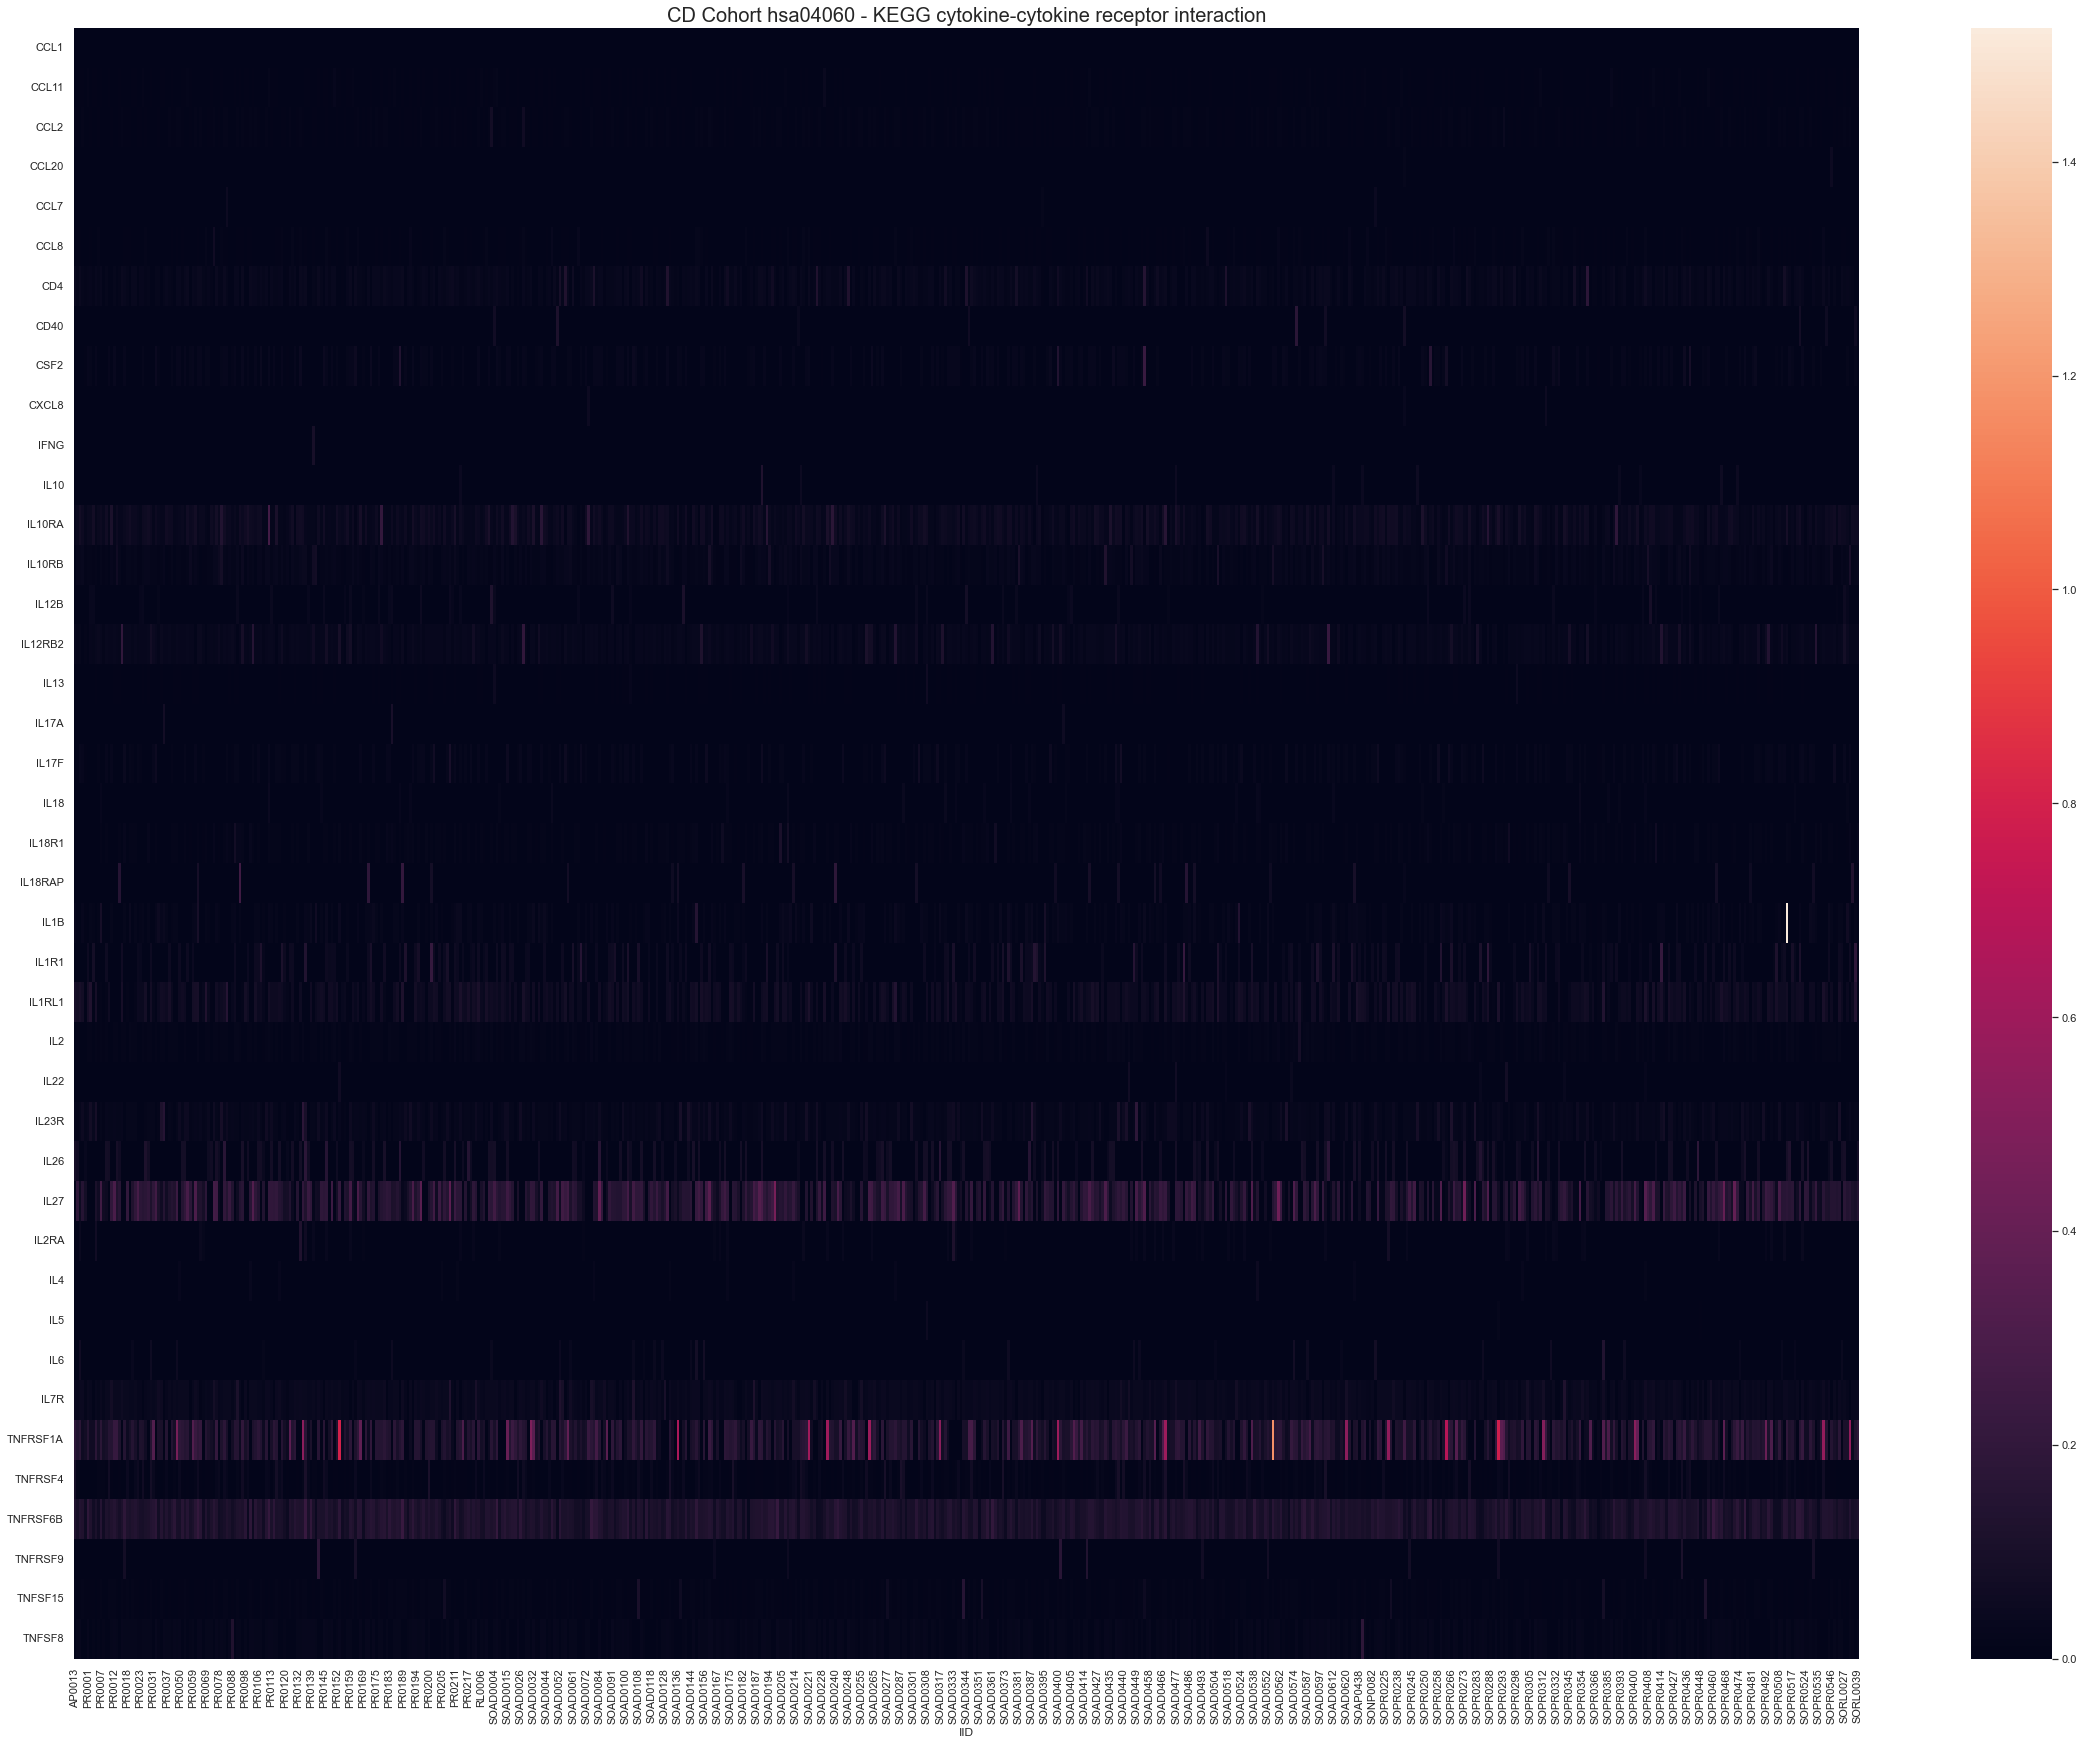

In [46]:
#fig, ax = plt.subplots(figsize=(7,5))
sns.set(rc = {'figure.figsize':(40,30)})
ax = plt.axes()
sns.heatmap(CD_go_cyto.transpose())
ax.set_title('CD Cohort hsa04060 - KEGG cytokine-cytokine receptor interaction',fontsize=20)
plt.savefig('heat3CD.png', dpi=300)

In [48]:
UC_go_cyto = UC_subset.loc[:, UC_subset.columns.isin(KEGG_cytokine)]

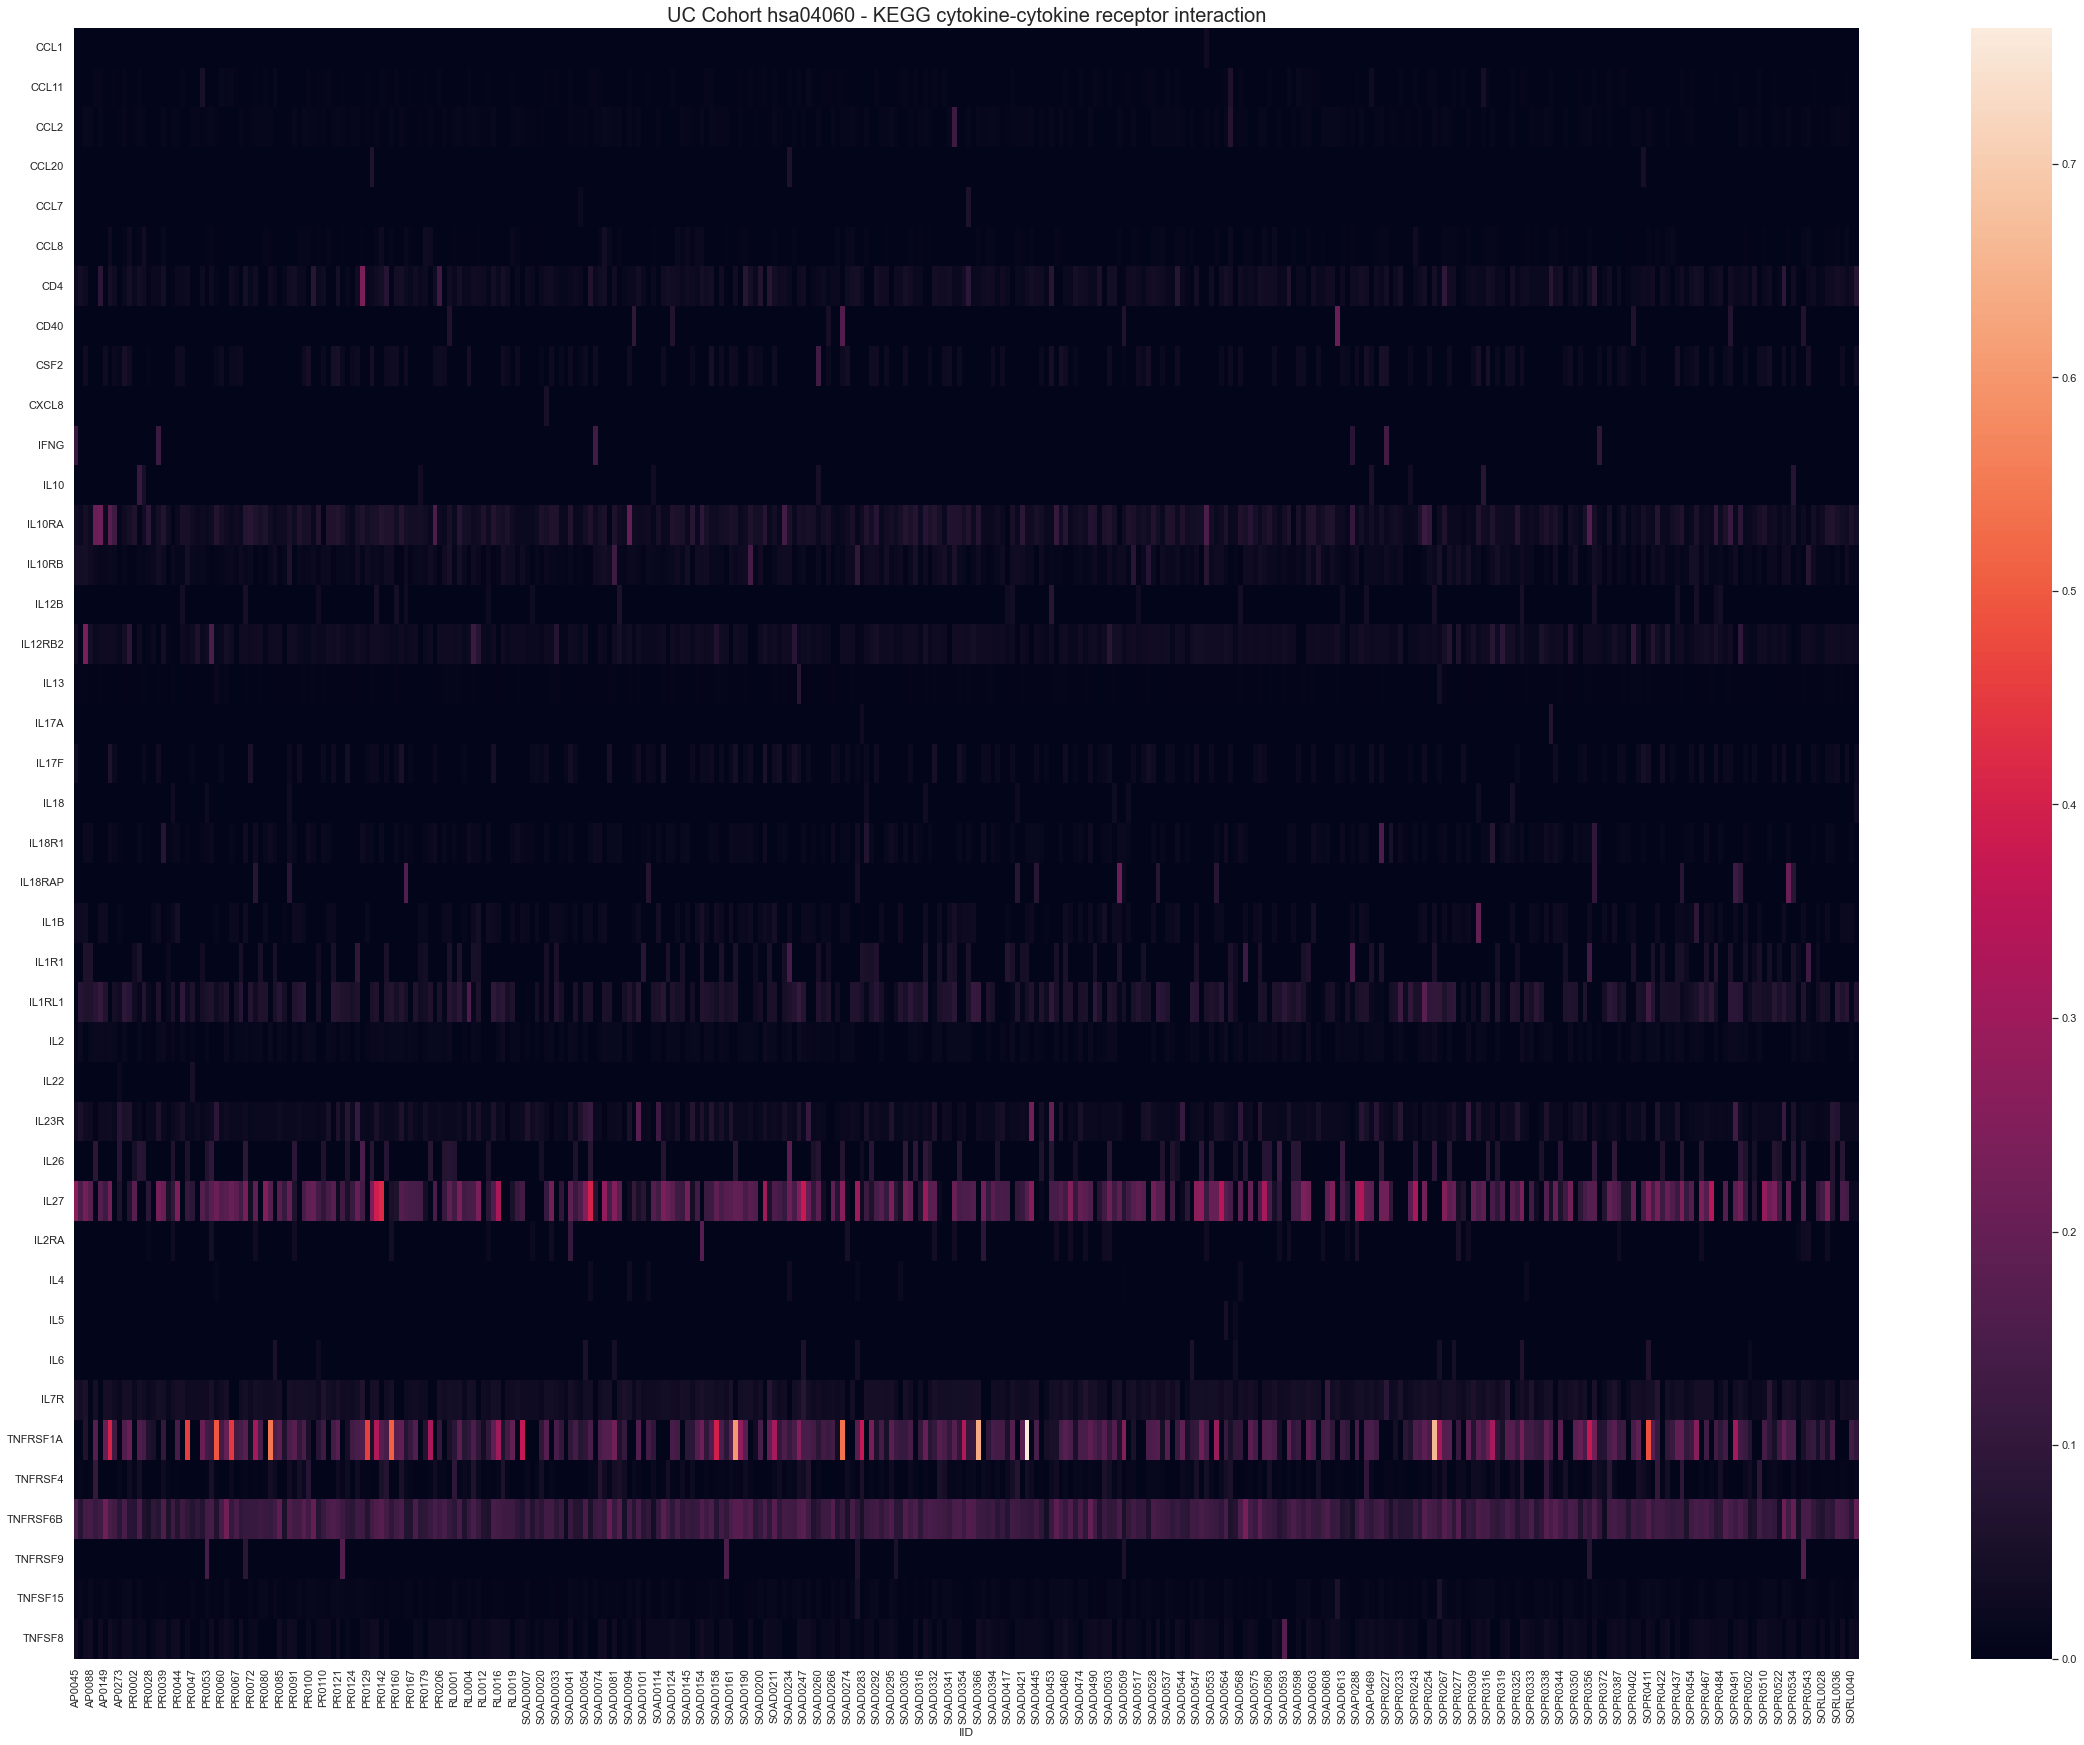

In [49]:
#fig, ax = plt.subplots(figsize=(7,5))
sns.set(rc = {'figure.figsize':(40,30)})
ax = plt.axes()
sns.heatmap(UC_go_cyto.transpose())
ax.set_title('UC Cohort hsa04060 - KEGG cytokine-cytokine receptor interaction',fontsize=20)
plt.savefig('heat3UC.png', dpi=300)

In [59]:
NIBD_go_cyto = NOT_IBD_subset.loc[:, NOT_IBD_subset.columns.isin(GO_reg_immune)]
NIBD_go_cyto

,AIRE,CARD9,CCL1,CCL2,CCL20,CCL7,CCL8,CD28,CD4,CD40,...,SMAD3,SOCS1,STAT1,STAT3,STAT5B,TBX21,TLR4,TNFRSF4,TNFSF8,VEGFA
IID,,,,,,,,,,,,,,,,,,,,,
AP0055,0.081214,0.0,0.0,0.012500,0.0,0.0,0.000000,0.0,0.036557,0.0,...,0.006434,0.0,0.0,0.132314,0.0,0.062876,0.000000,0.014593,0.023902,0.022069
AP0056,0.015881,0.0,0.0,0.008598,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.033436,0.0,0.0,0.068245,0.0,0.043251,0.035579,0.000000,0.016441,0.015181
AP0258,0.048594,0.0,0.0,0.011268,0.0,0.0,0.009027,0.0,0.032955,0.0,...,0.043819,0.0,0.0,0.089436,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
SOPR0282,0.031421,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.025176,0.0,...,0.004431,0.0,0.0,0.068326,0.0,0.113610,0.000000,0.016759,0.021665,0.015199
SOPR0365,0.027610,0.0,0.0,0.008547,0.0,0.0,0.006847,0.0,0.024996,0.0,...,0.004399,0.0,0.0,0.090473,0.0,0.000000,0.000000,0.031045,0.000000,0.015090
SORL0042,0.066524,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037057,0.0,...,0.006522,0.0,0.0,0.134125,0.0,0.063737,0.000000,0.024668,0.000000,0.022371


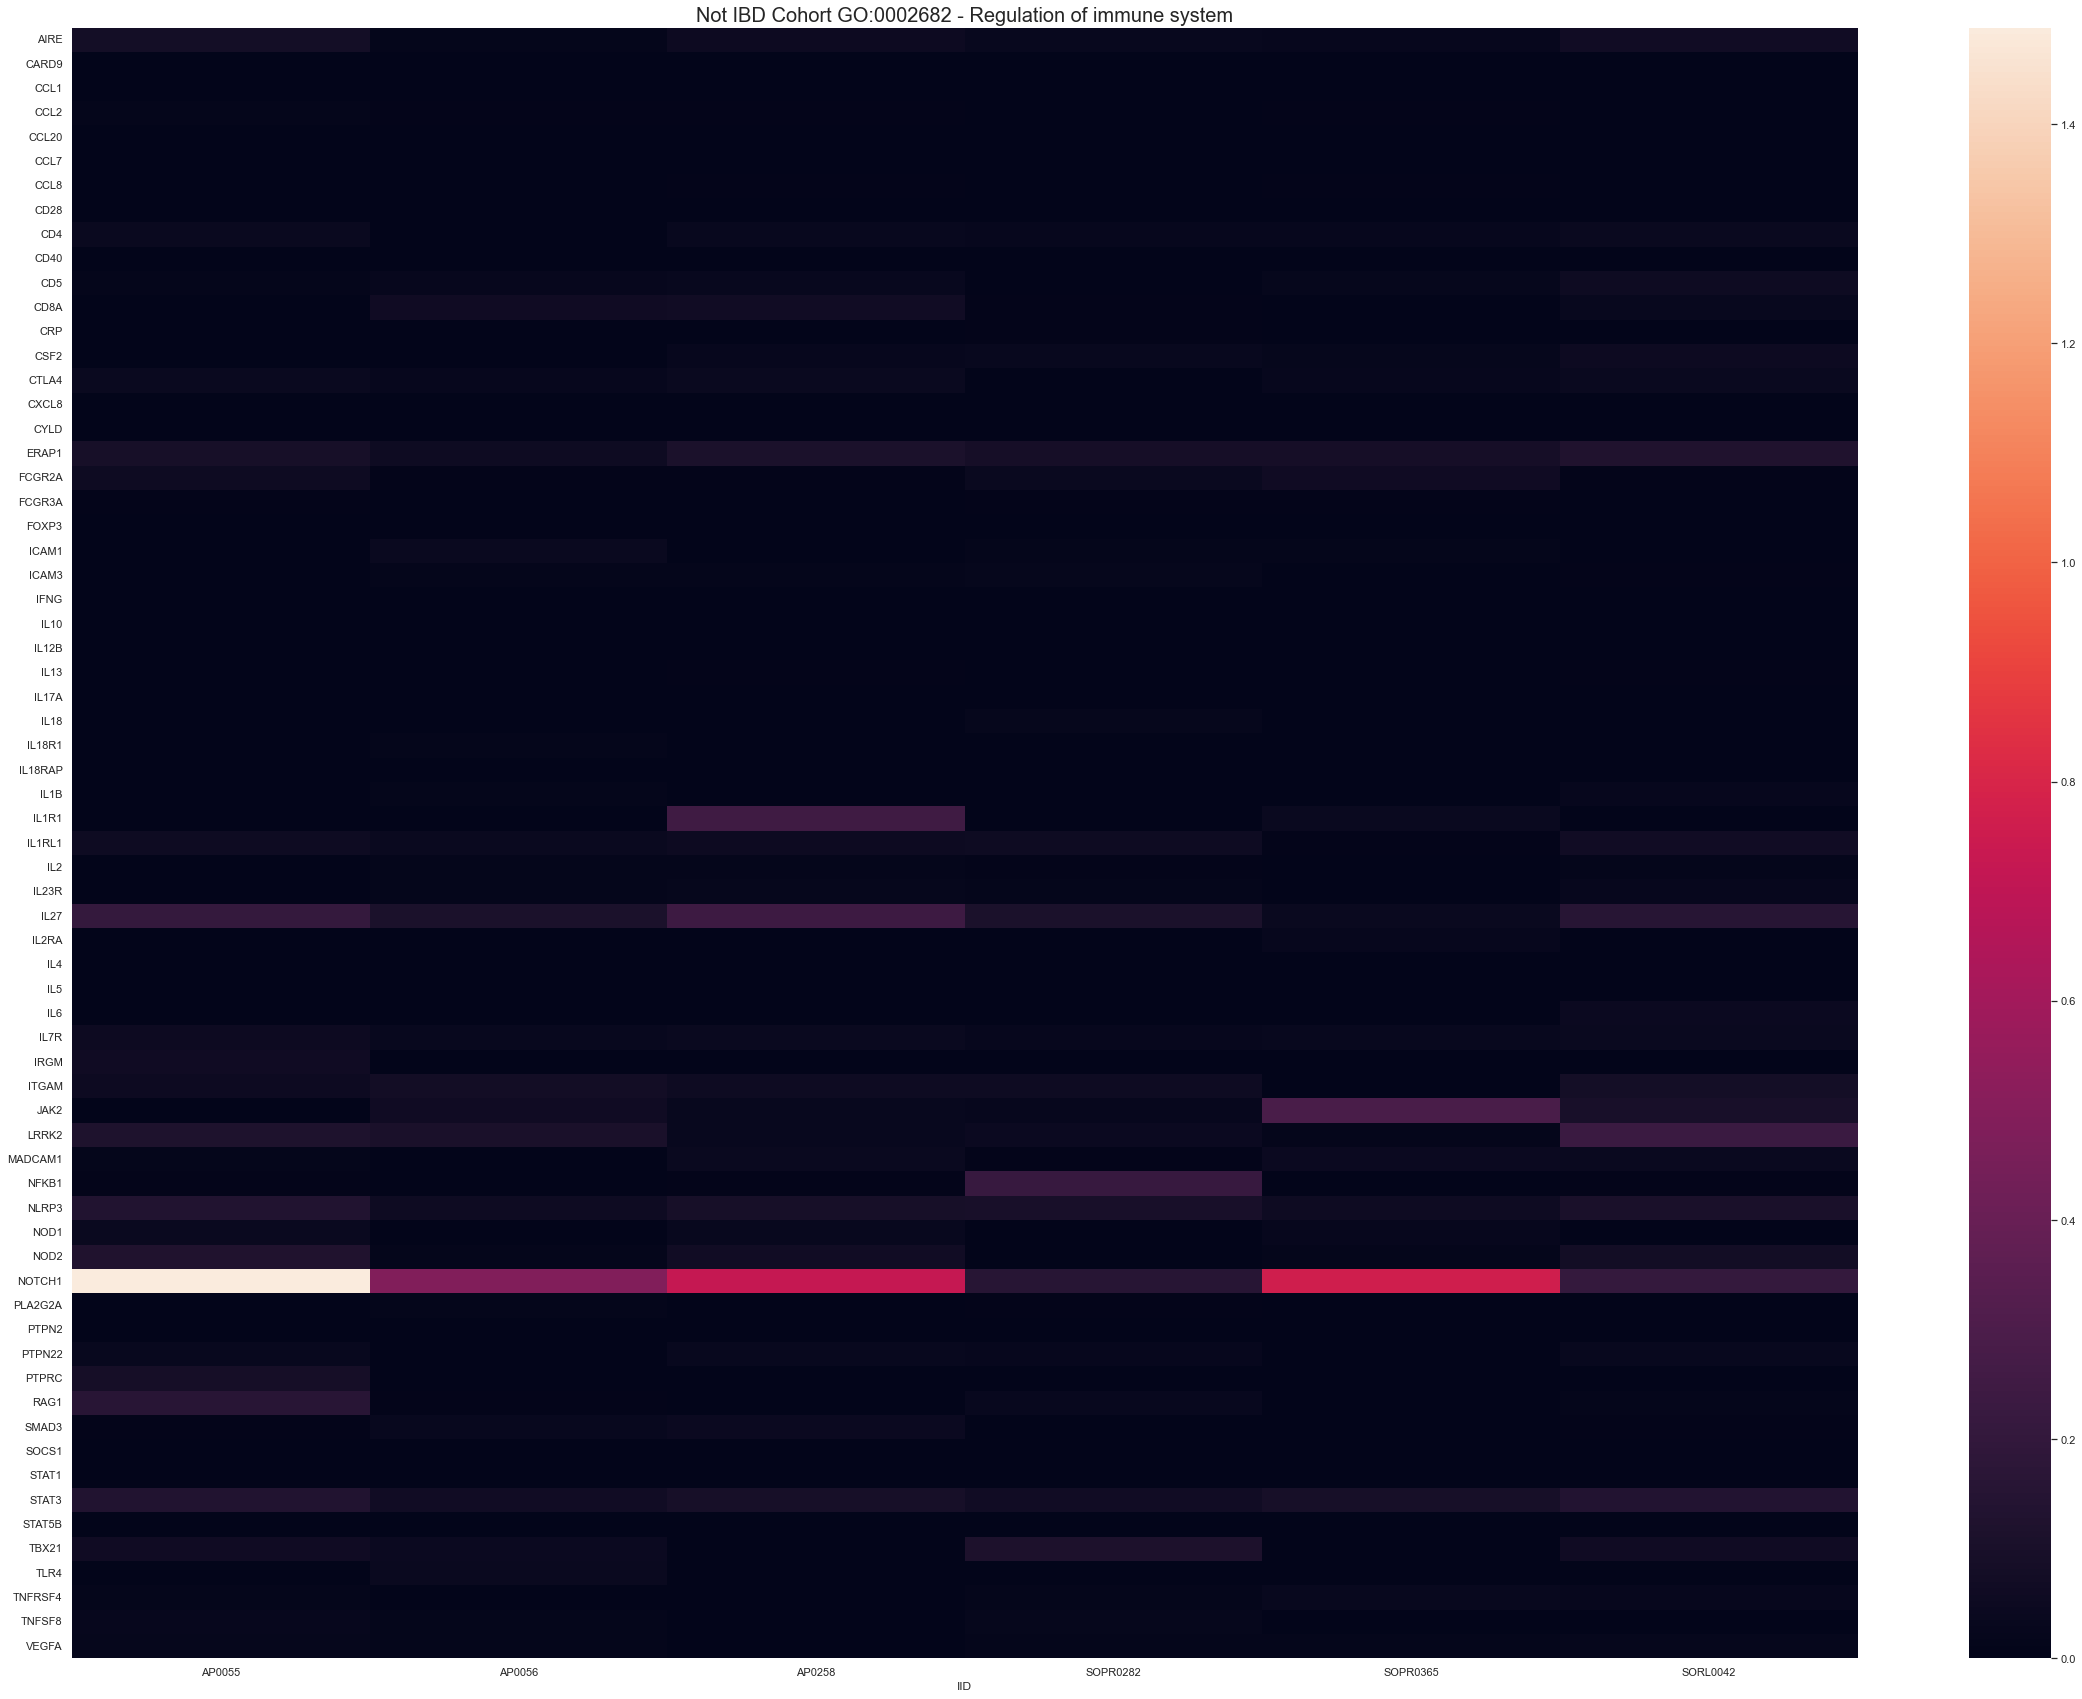

In [60]:
#fig, ax = plt.subplots(figsize=(7,5))
sns.set(rc = {'figure.figsize':(40,30)})
ax = plt.axes()
sns.heatmap(NIBD_go_cyto.transpose())
ax.set_title('Not IBD Cohort GO:0002682 - Regulation of immune system',fontsize=20)
plt.savefig('heat2NIBD.png', dpi=300)

investigate UC 360:400 further

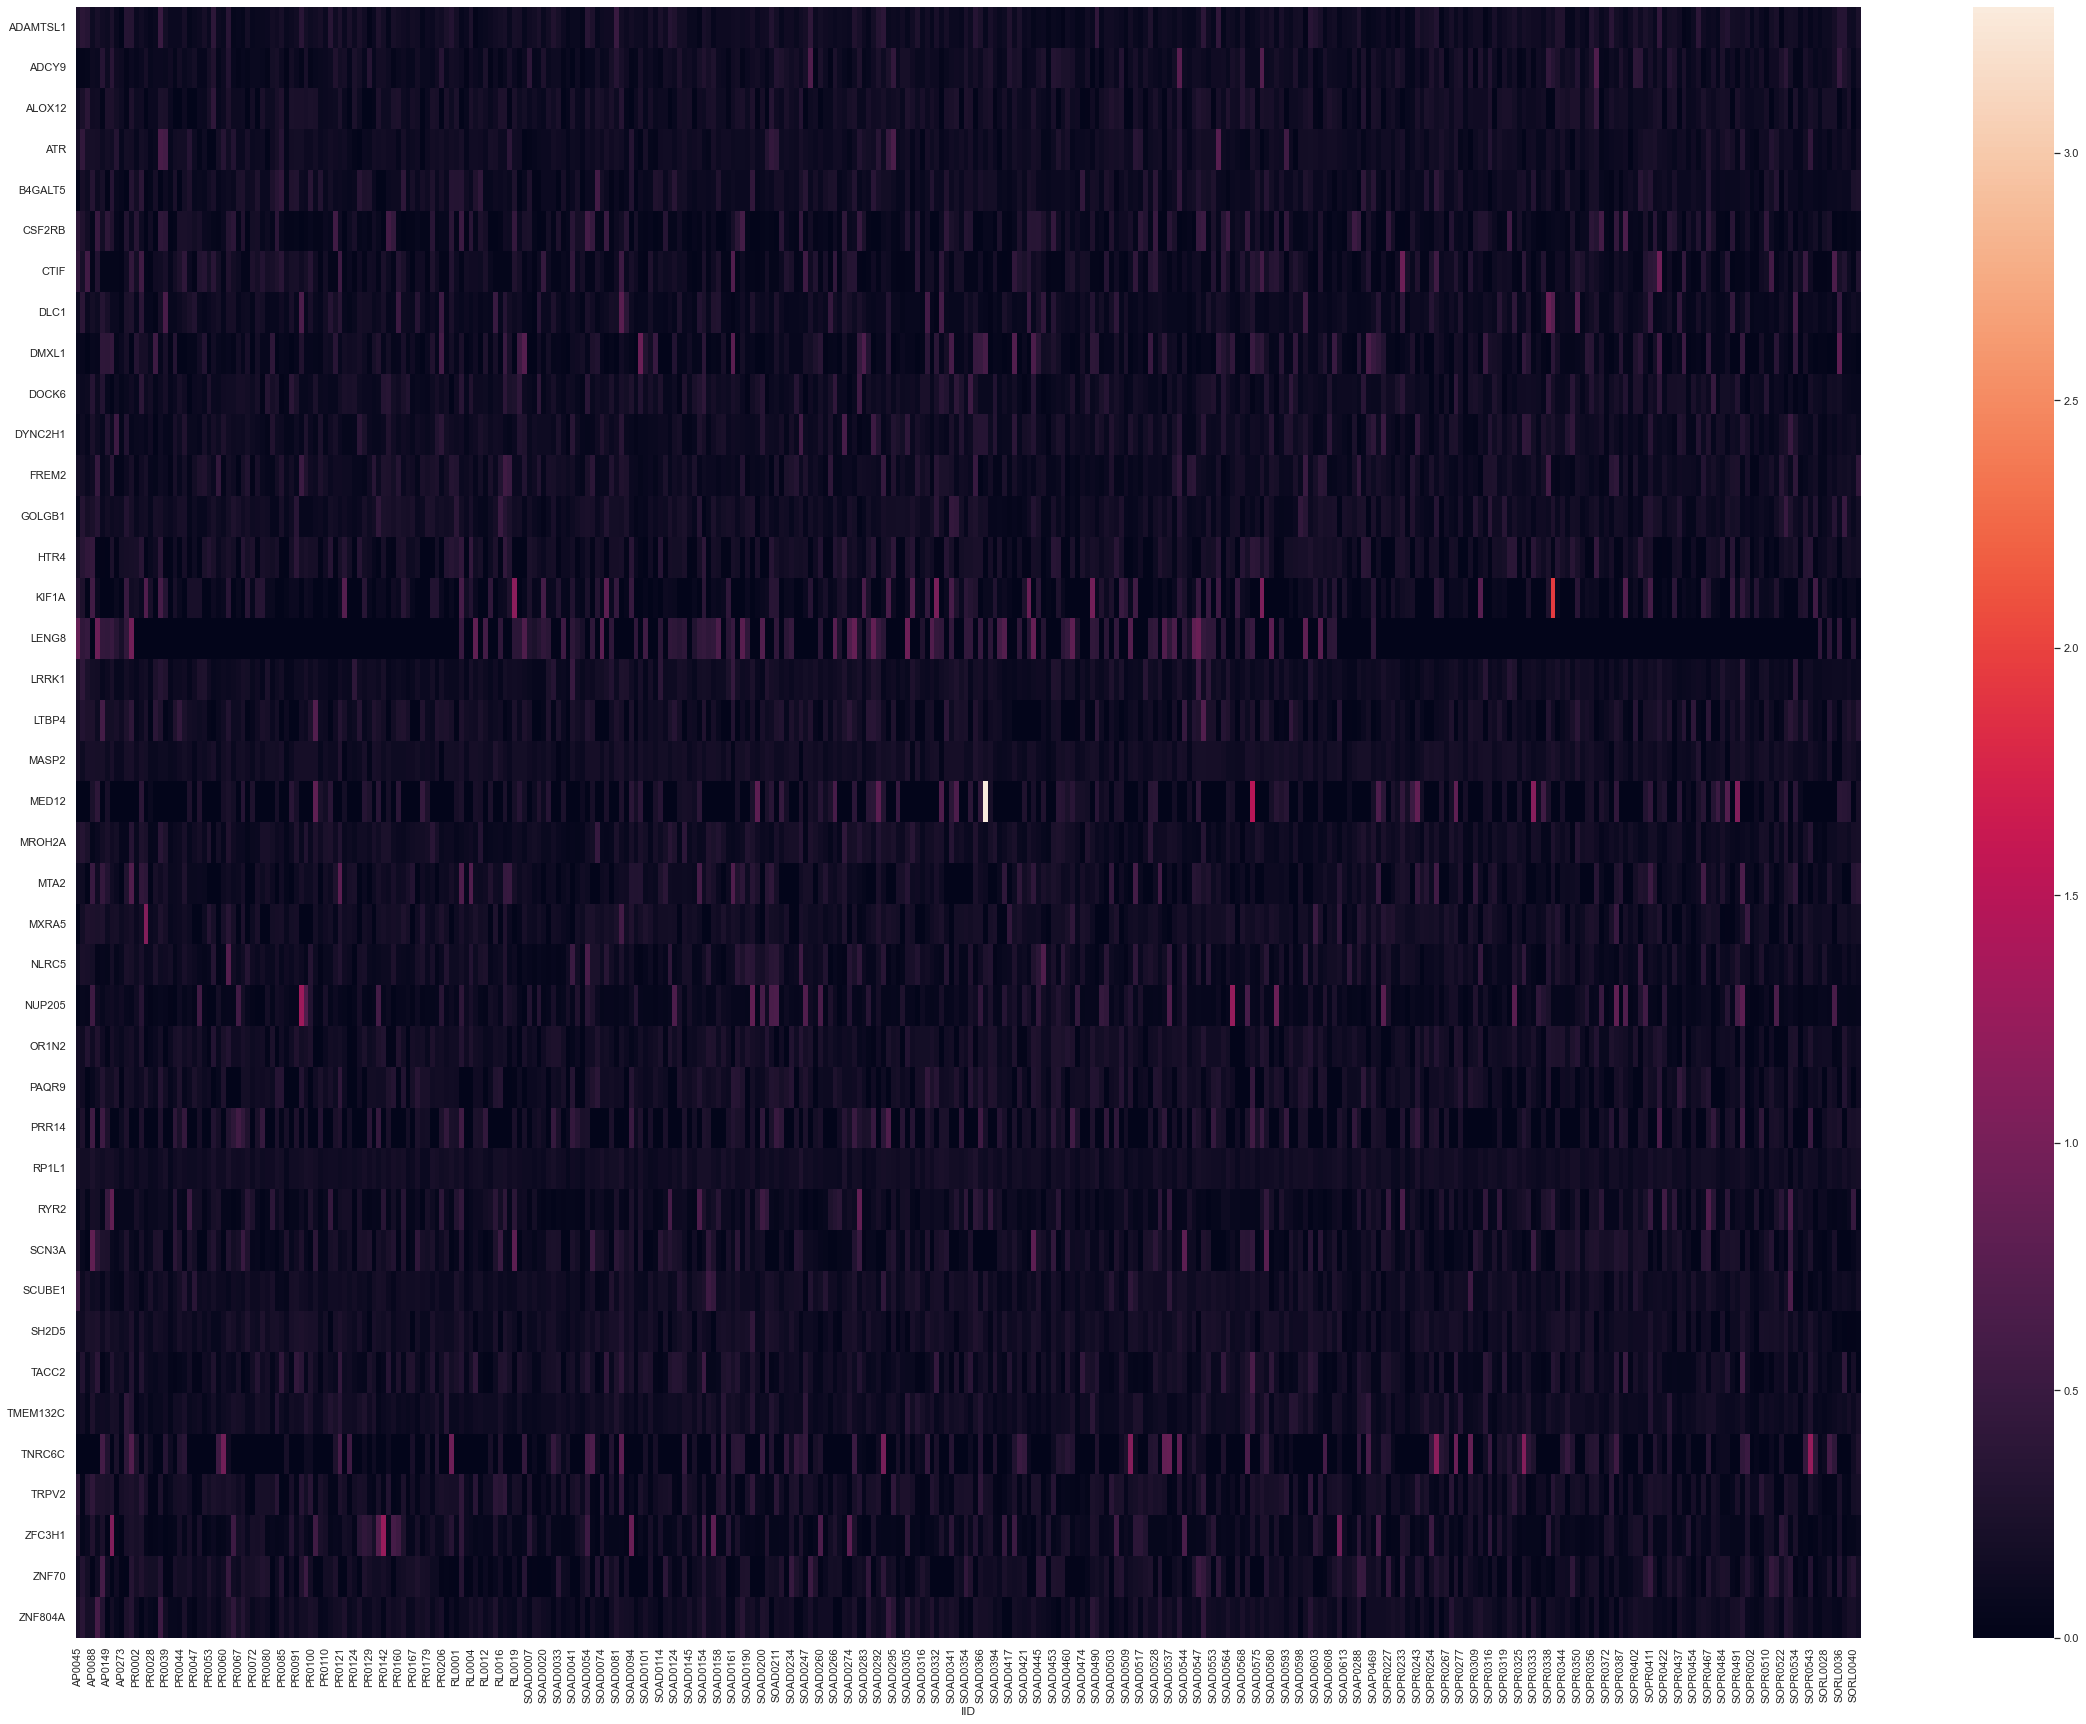

In [139]:
TopGenesUC_subset = UC_subset.mean().sort_values(ascending=False).index
TopG = UC_subset.loc[:, UC_subset.columns.isin(TopGenesUC_subset[640:680,])]
sns.set(font_scale=1)
sns.heatmap(TopG.transpose())
plt.savefig('UC_LENG8.png', dpi=600)

In [9]:
highscores = pathway_genes("../Data/areas with high scores.txt")
sub = CD_subset.loc[:, CD_subset.columns.isin(highscores)]

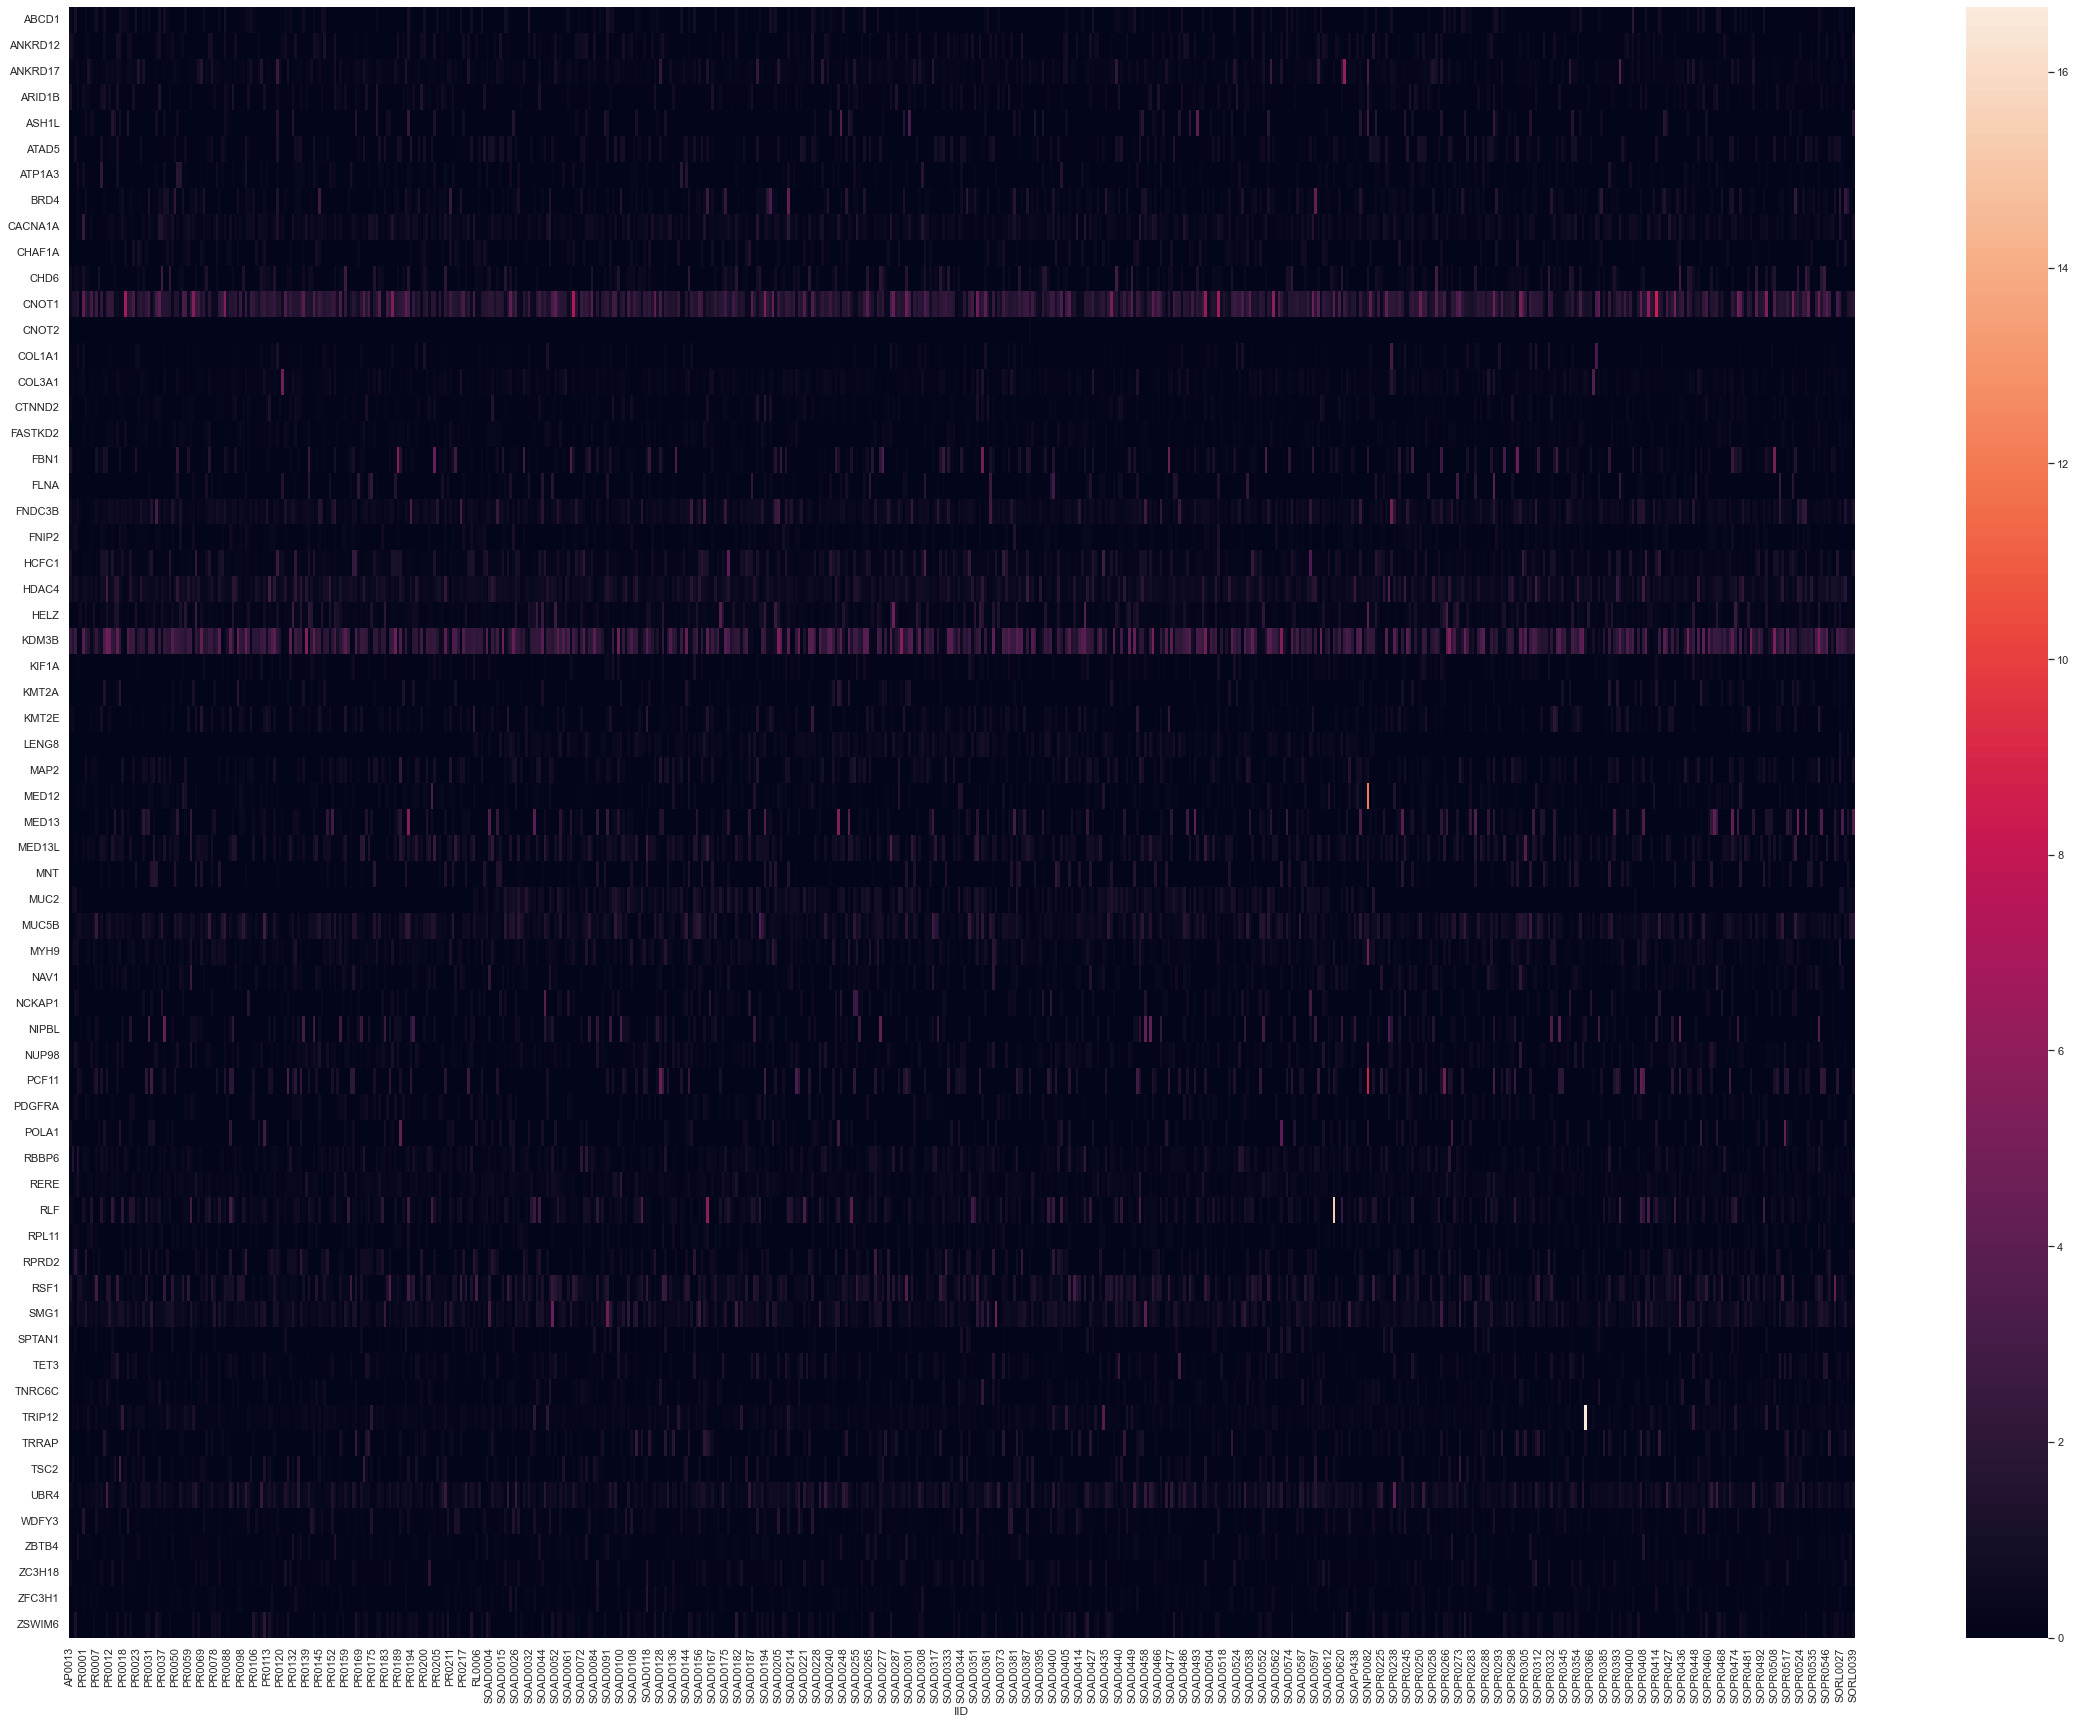

In [11]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(sub.transpose())
plt.savefig('NOPE.png', dpi=300)

In [16]:
from get_data import CD_subset, UC_subset, IBDU_subset, NOT_IBD_subset

In [24]:
threePR = pathway_genes("../Data/3PR.txt")
subPR = CD_subset.loc[:, CD_subset.columns.isin(threePR)]

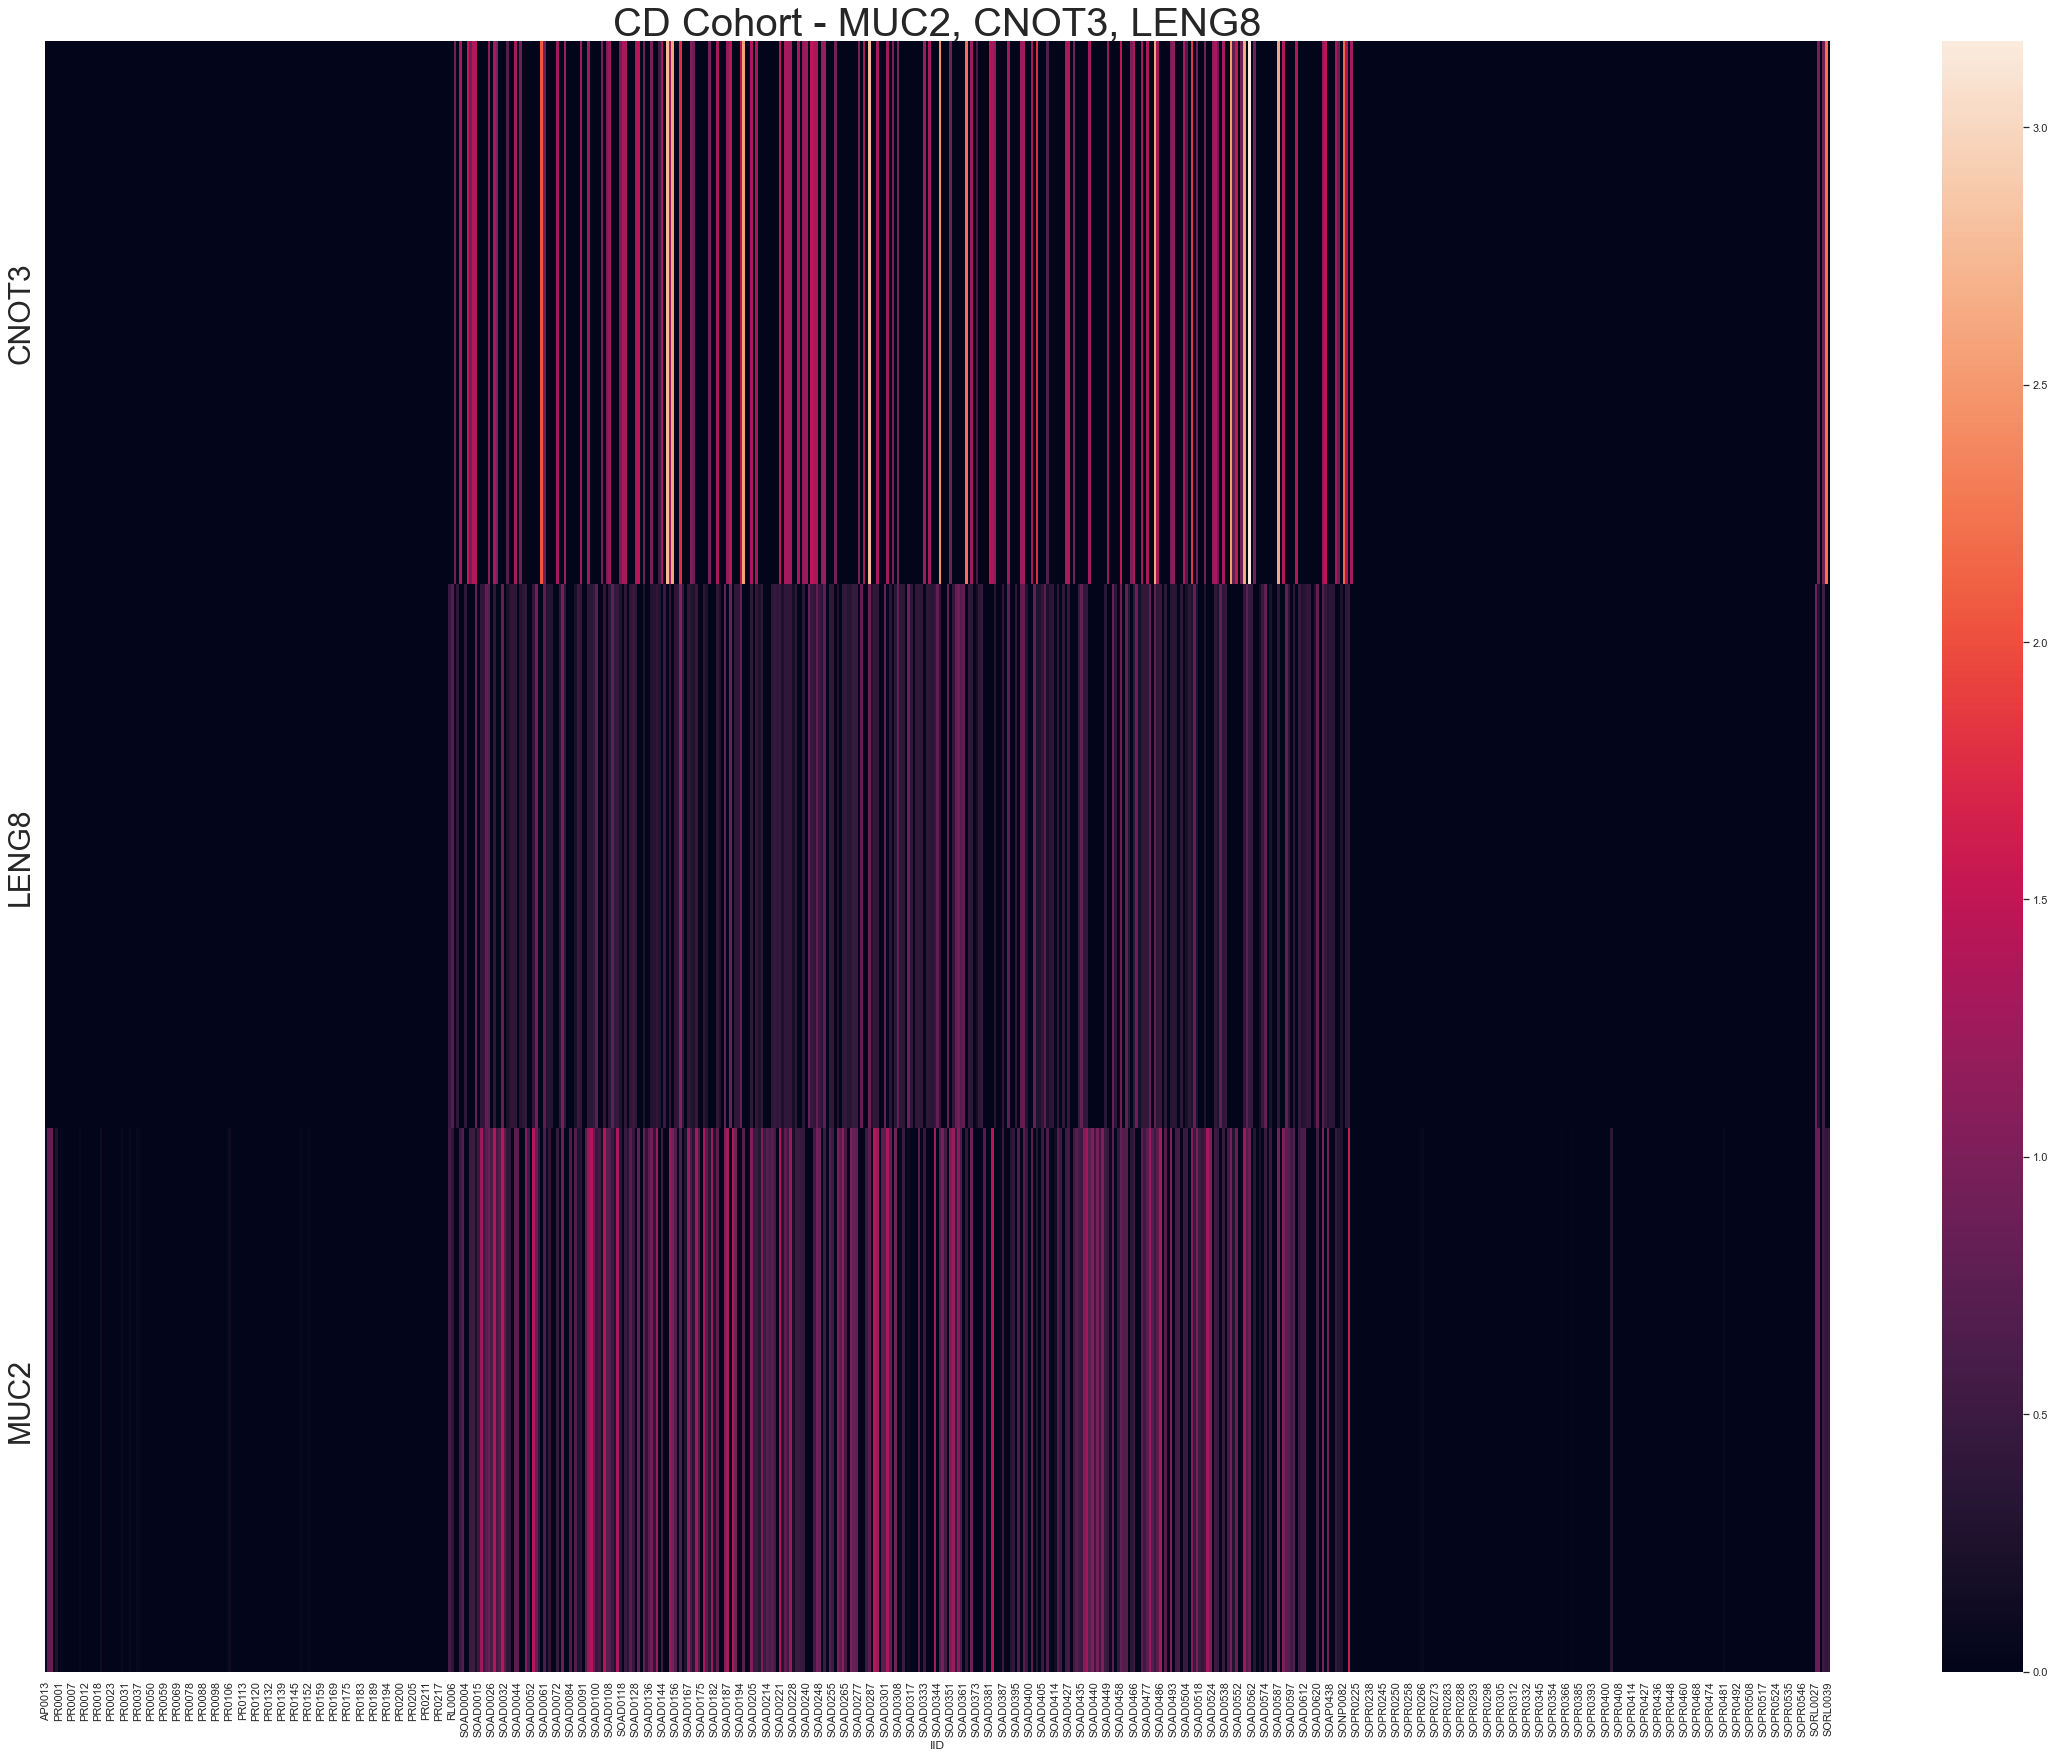

In [32]:
sns.set(rc = {'figure.figsize':(40,30)})
ax = plt.axes()
sns.heatmap(subPR.transpose()).tick_params(axis ='y',labelsize=30)
ax.set_title('CD Cohort - MUC2, CNOT3, LENG8',fontsize=40)
plt.savefig('3_PR.png', dpi=300)

In [20]:
threePR = pathway_genes("../Data/3PR.txt")
subPRUC = NOT_IBD_subset.loc[:, NOT_IBD_subset.columns.isin(threePR)]

<AxesSubplot:xlabel='IID'>

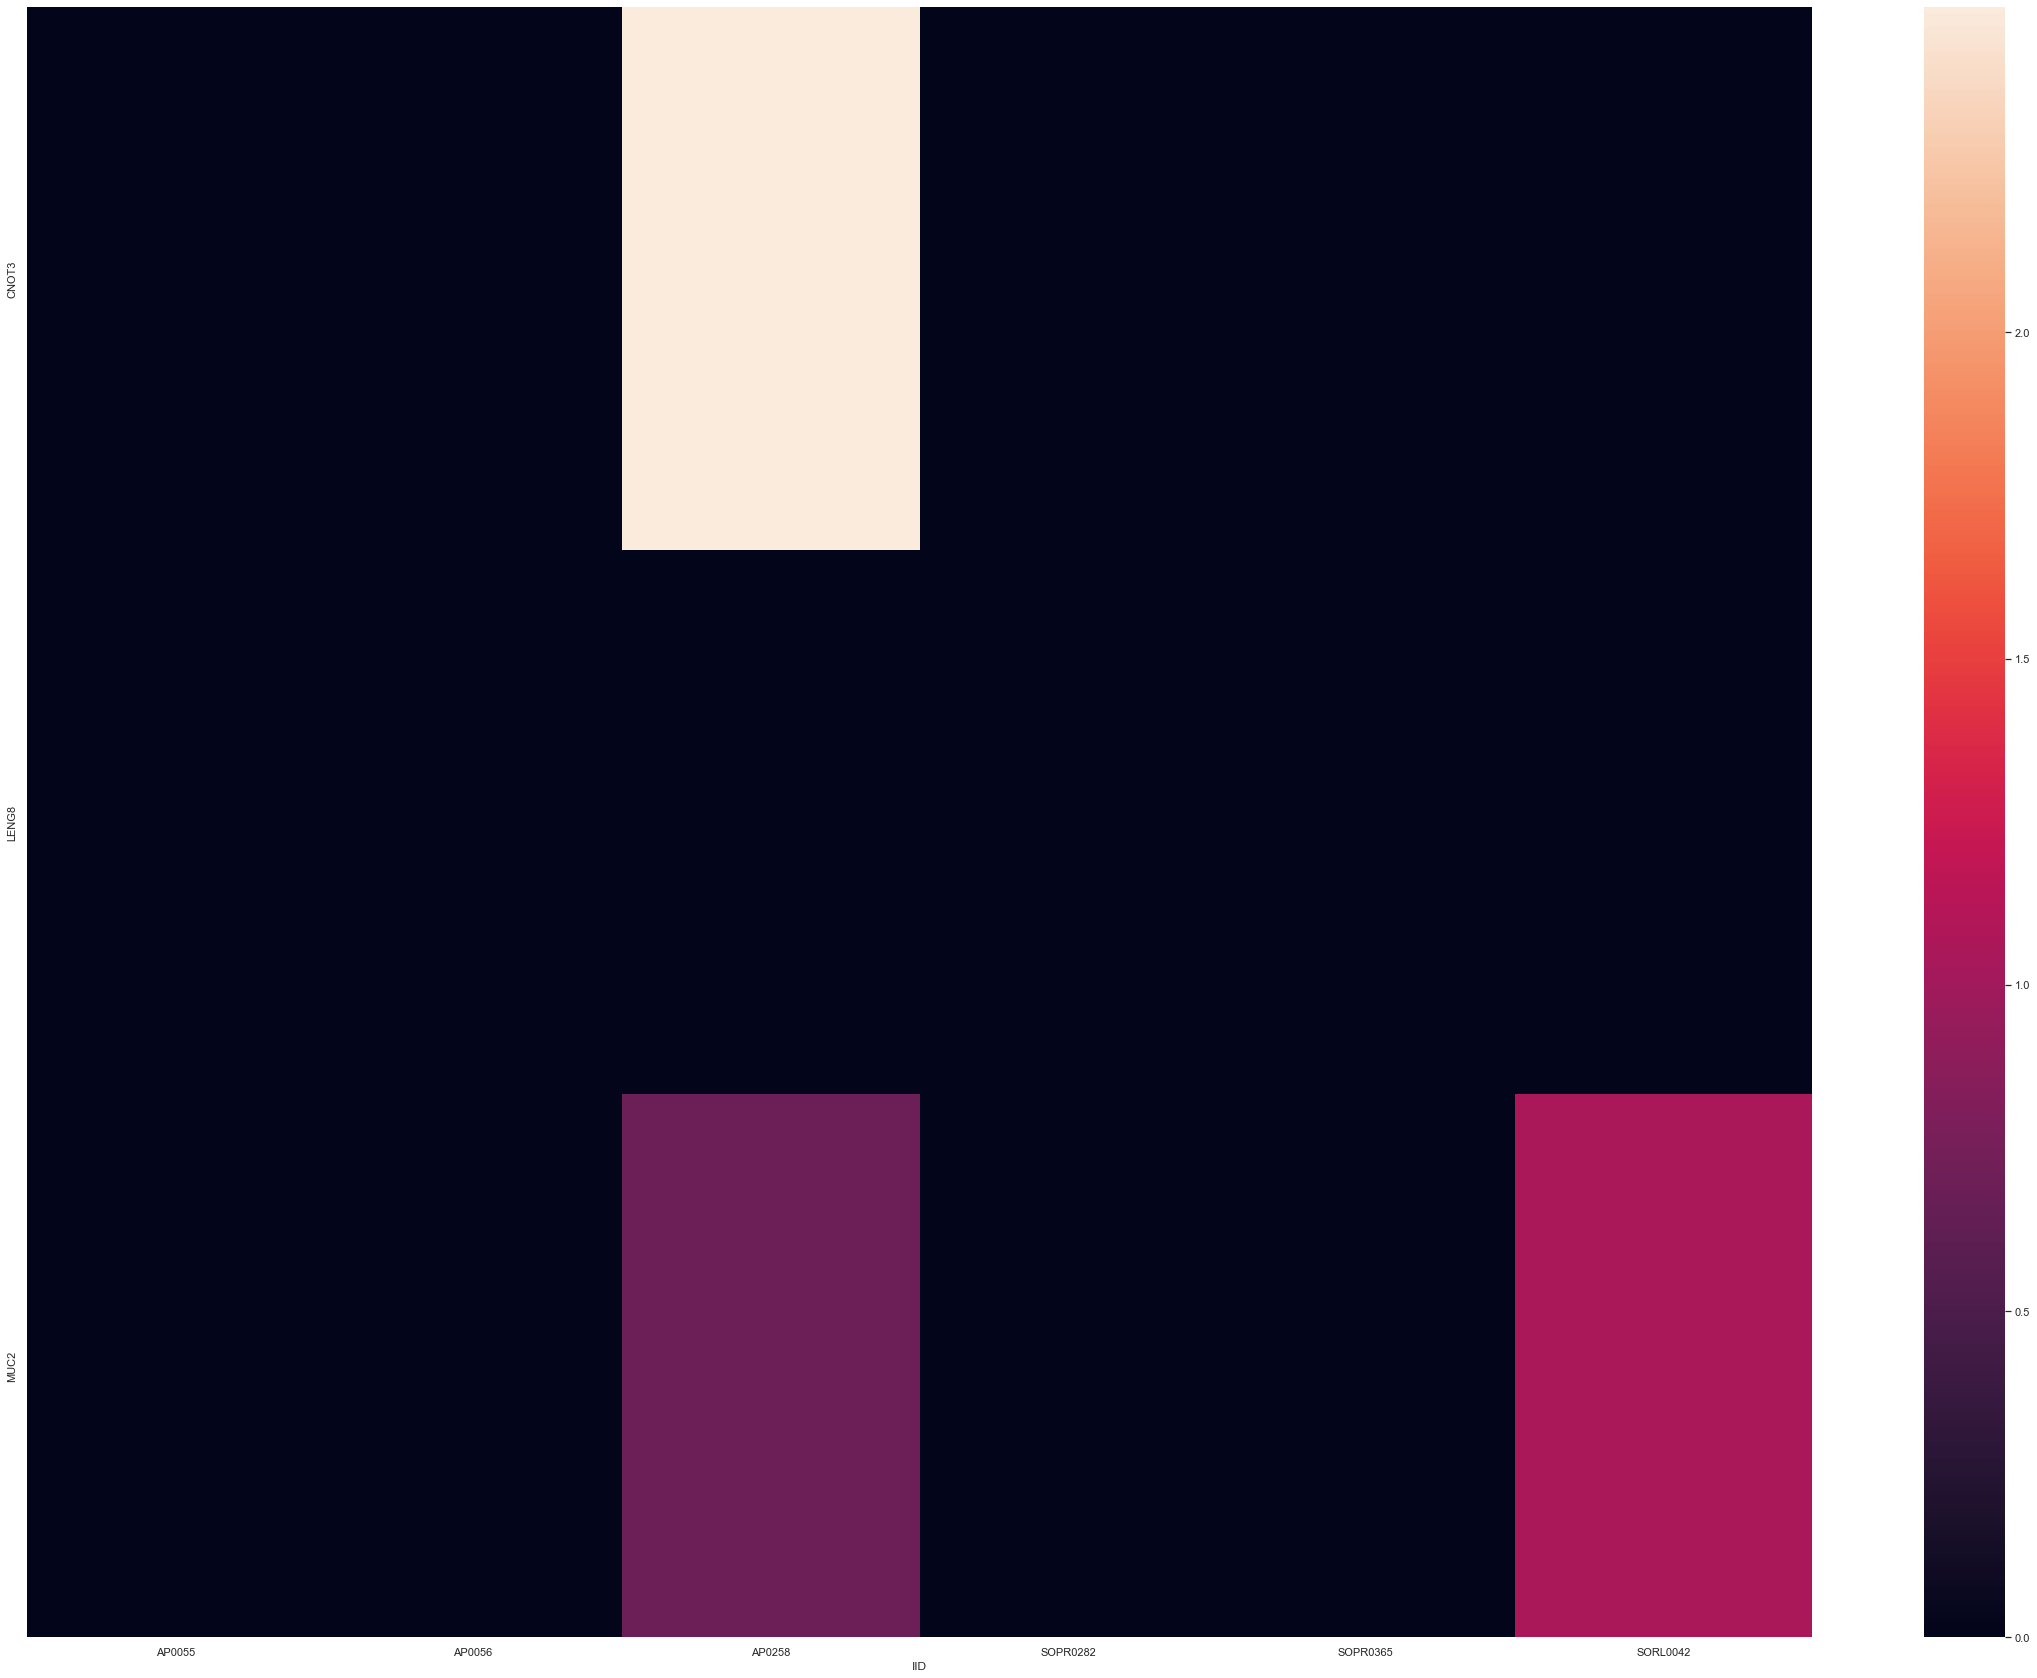

In [20]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPRUC.transpose())
#plt.savefig('NOPE.png', dpi=300)

In [19]:
threePR = pathway_genes("../Data/3PR.txt")
subPRUC = NOT_IBD_subset.loc[:, NOT_IBD_subset.columns.isin(threePR)]

<AxesSubplot:xlabel='IID'>

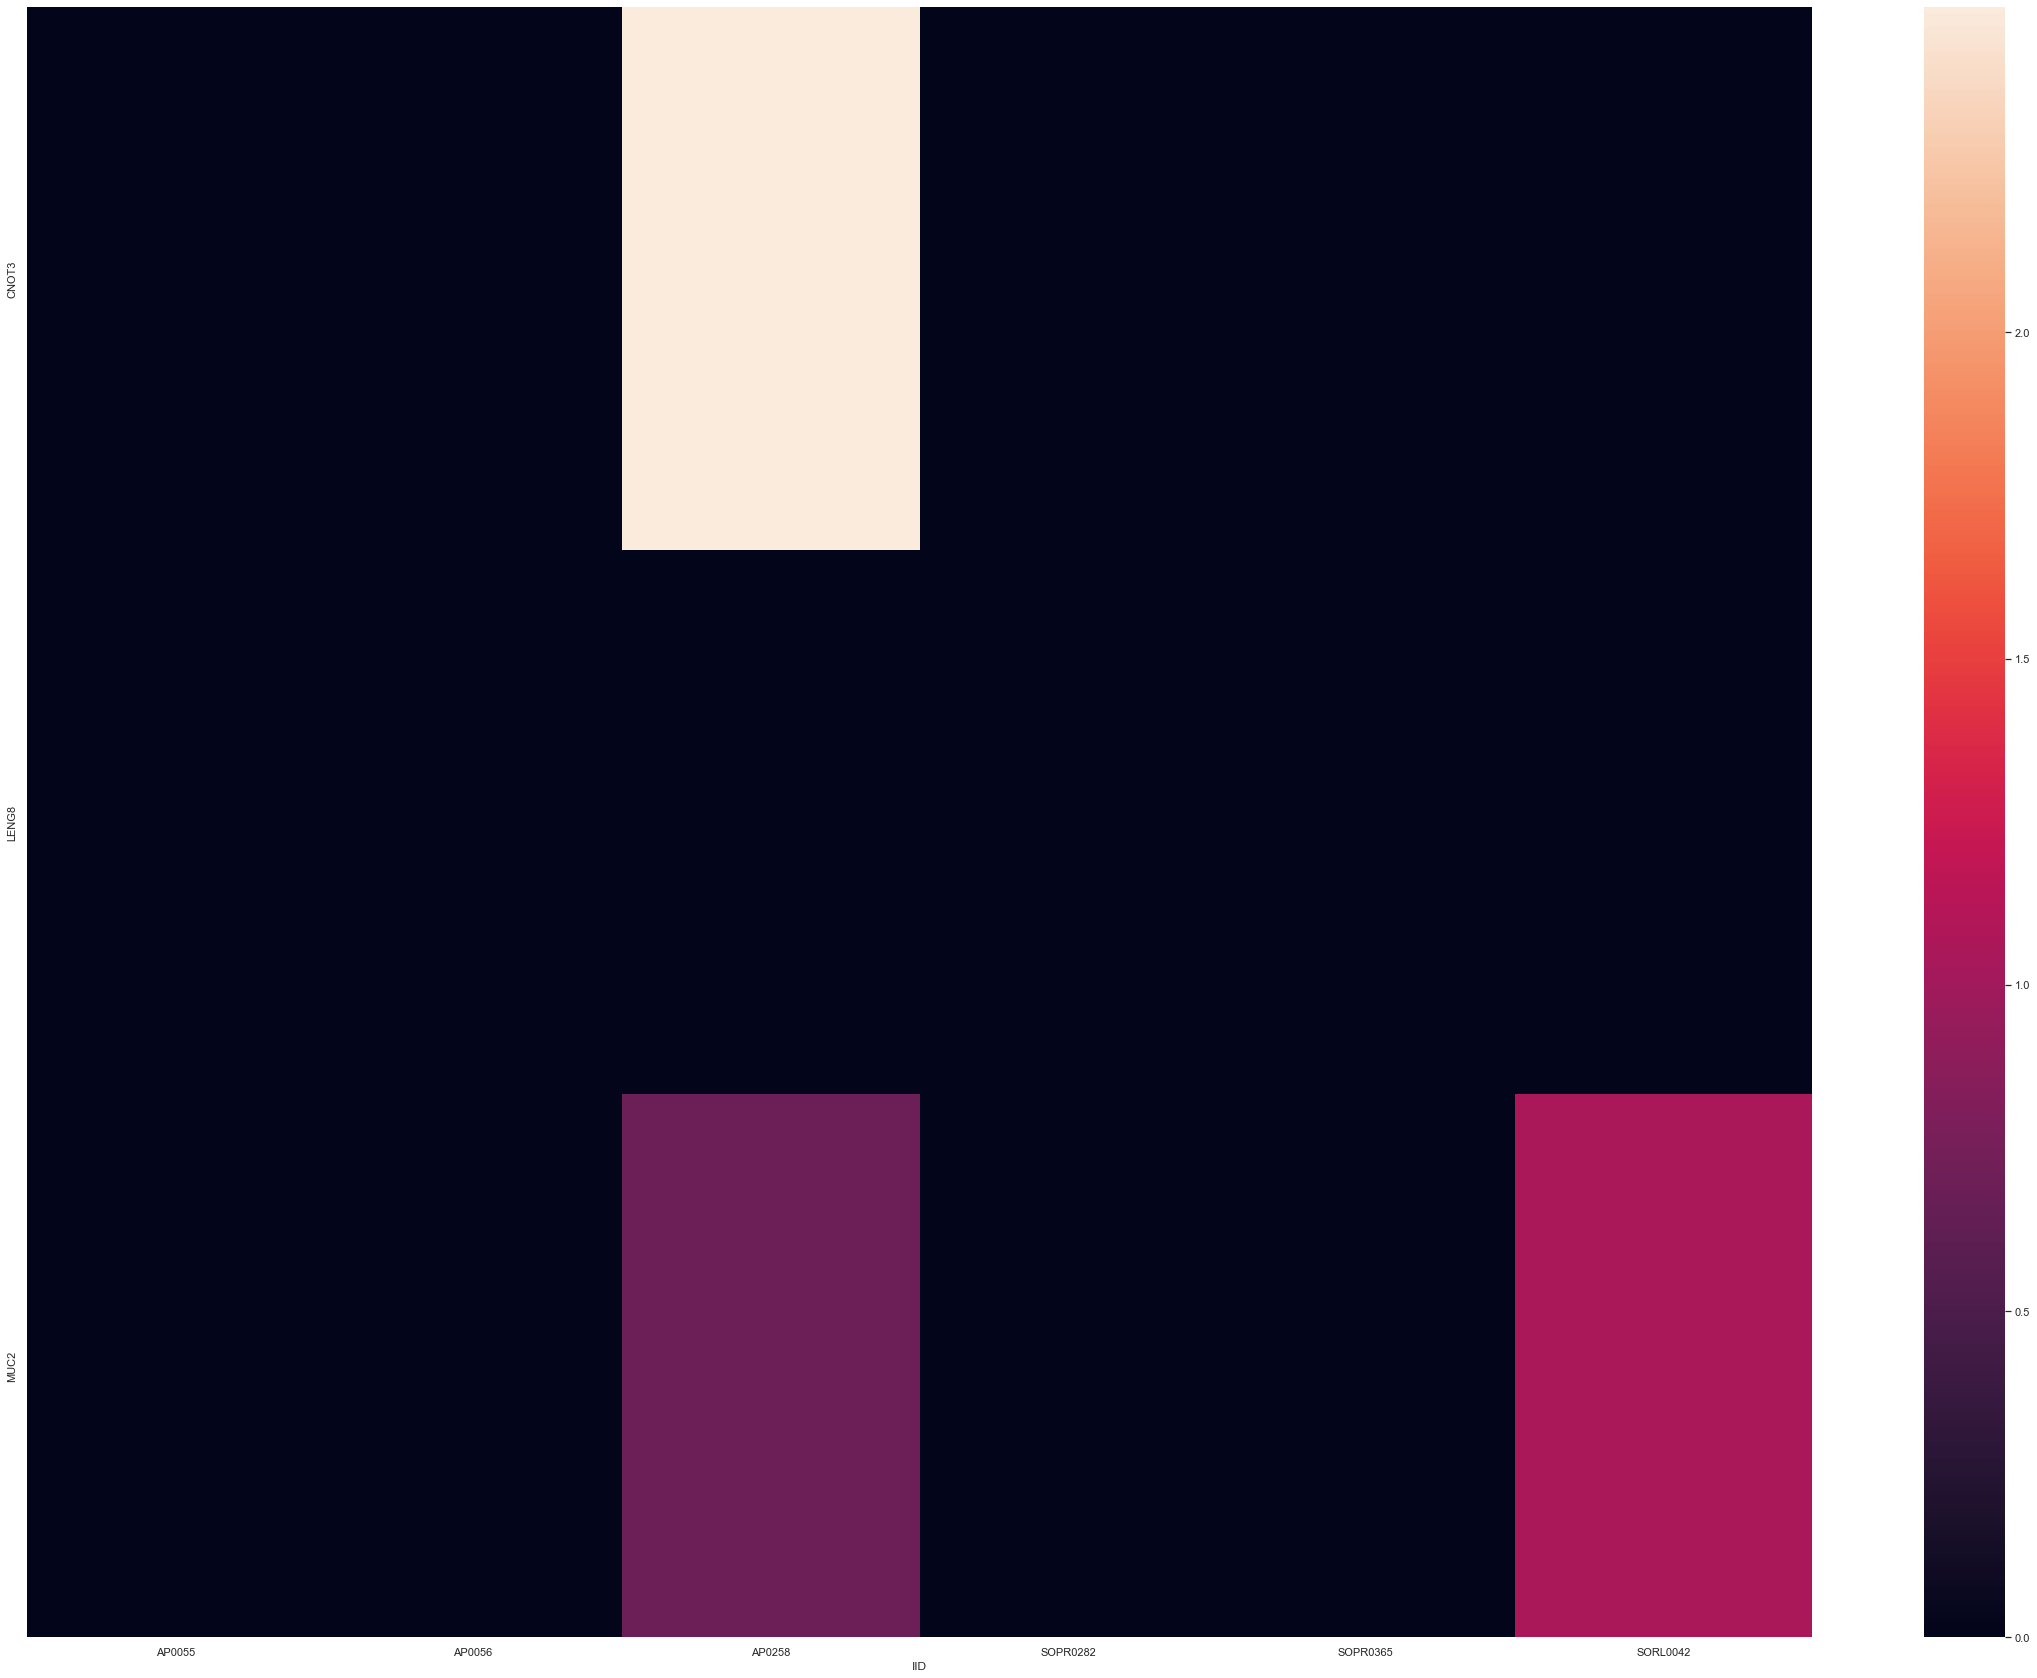

In [20]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPRUC.transpose())
#plt.savefig('NOPE.png', dpi=300)

In [21]:
geneofint = pathway_genes("../Data/genes of interest.txt")
subPRUC = CD_subset.loc[:, CD_subset.columns.isin(geneofint)]

<AxesSubplot:xlabel='IID'>

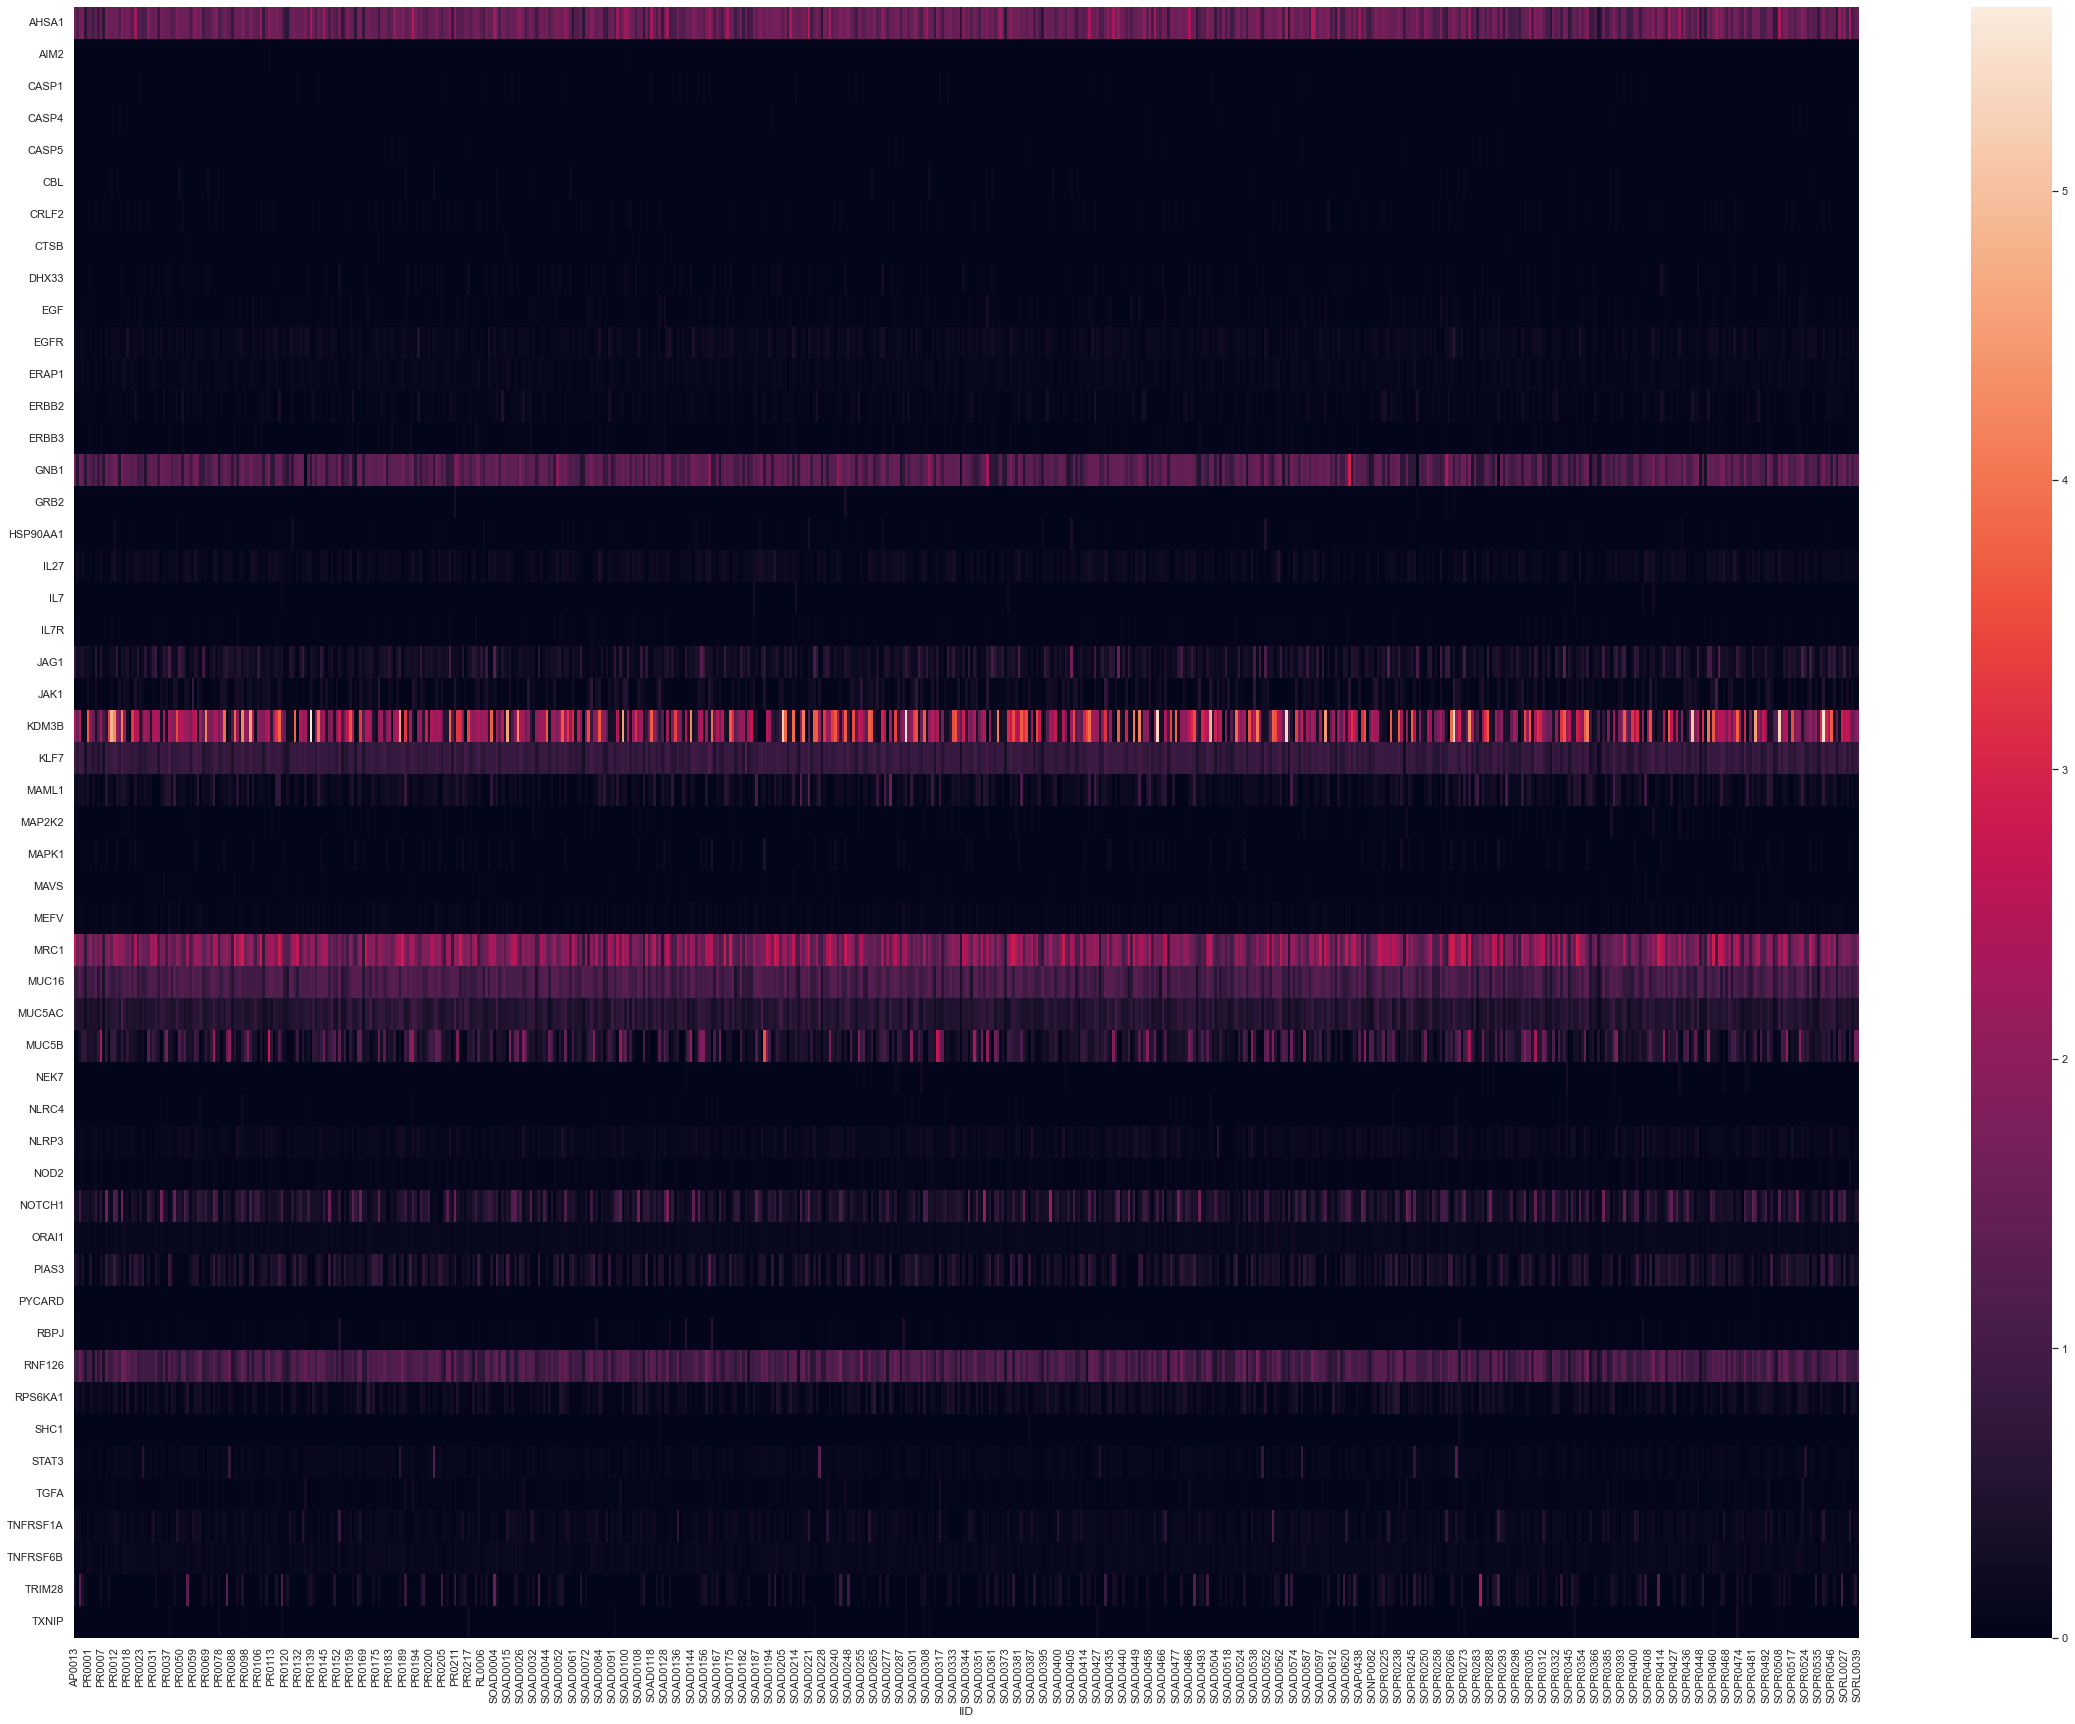

In [22]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPRUC.transpose())
#plt.savefig('NOPE.png', dpi=300)

In [23]:
geneofint = pathway_genes("../Data/genes of interest.txt")
subPRUC = UC_subset.loc[:, UC_subset.columns.isin(geneofint)]

<AxesSubplot:xlabel='IID'>

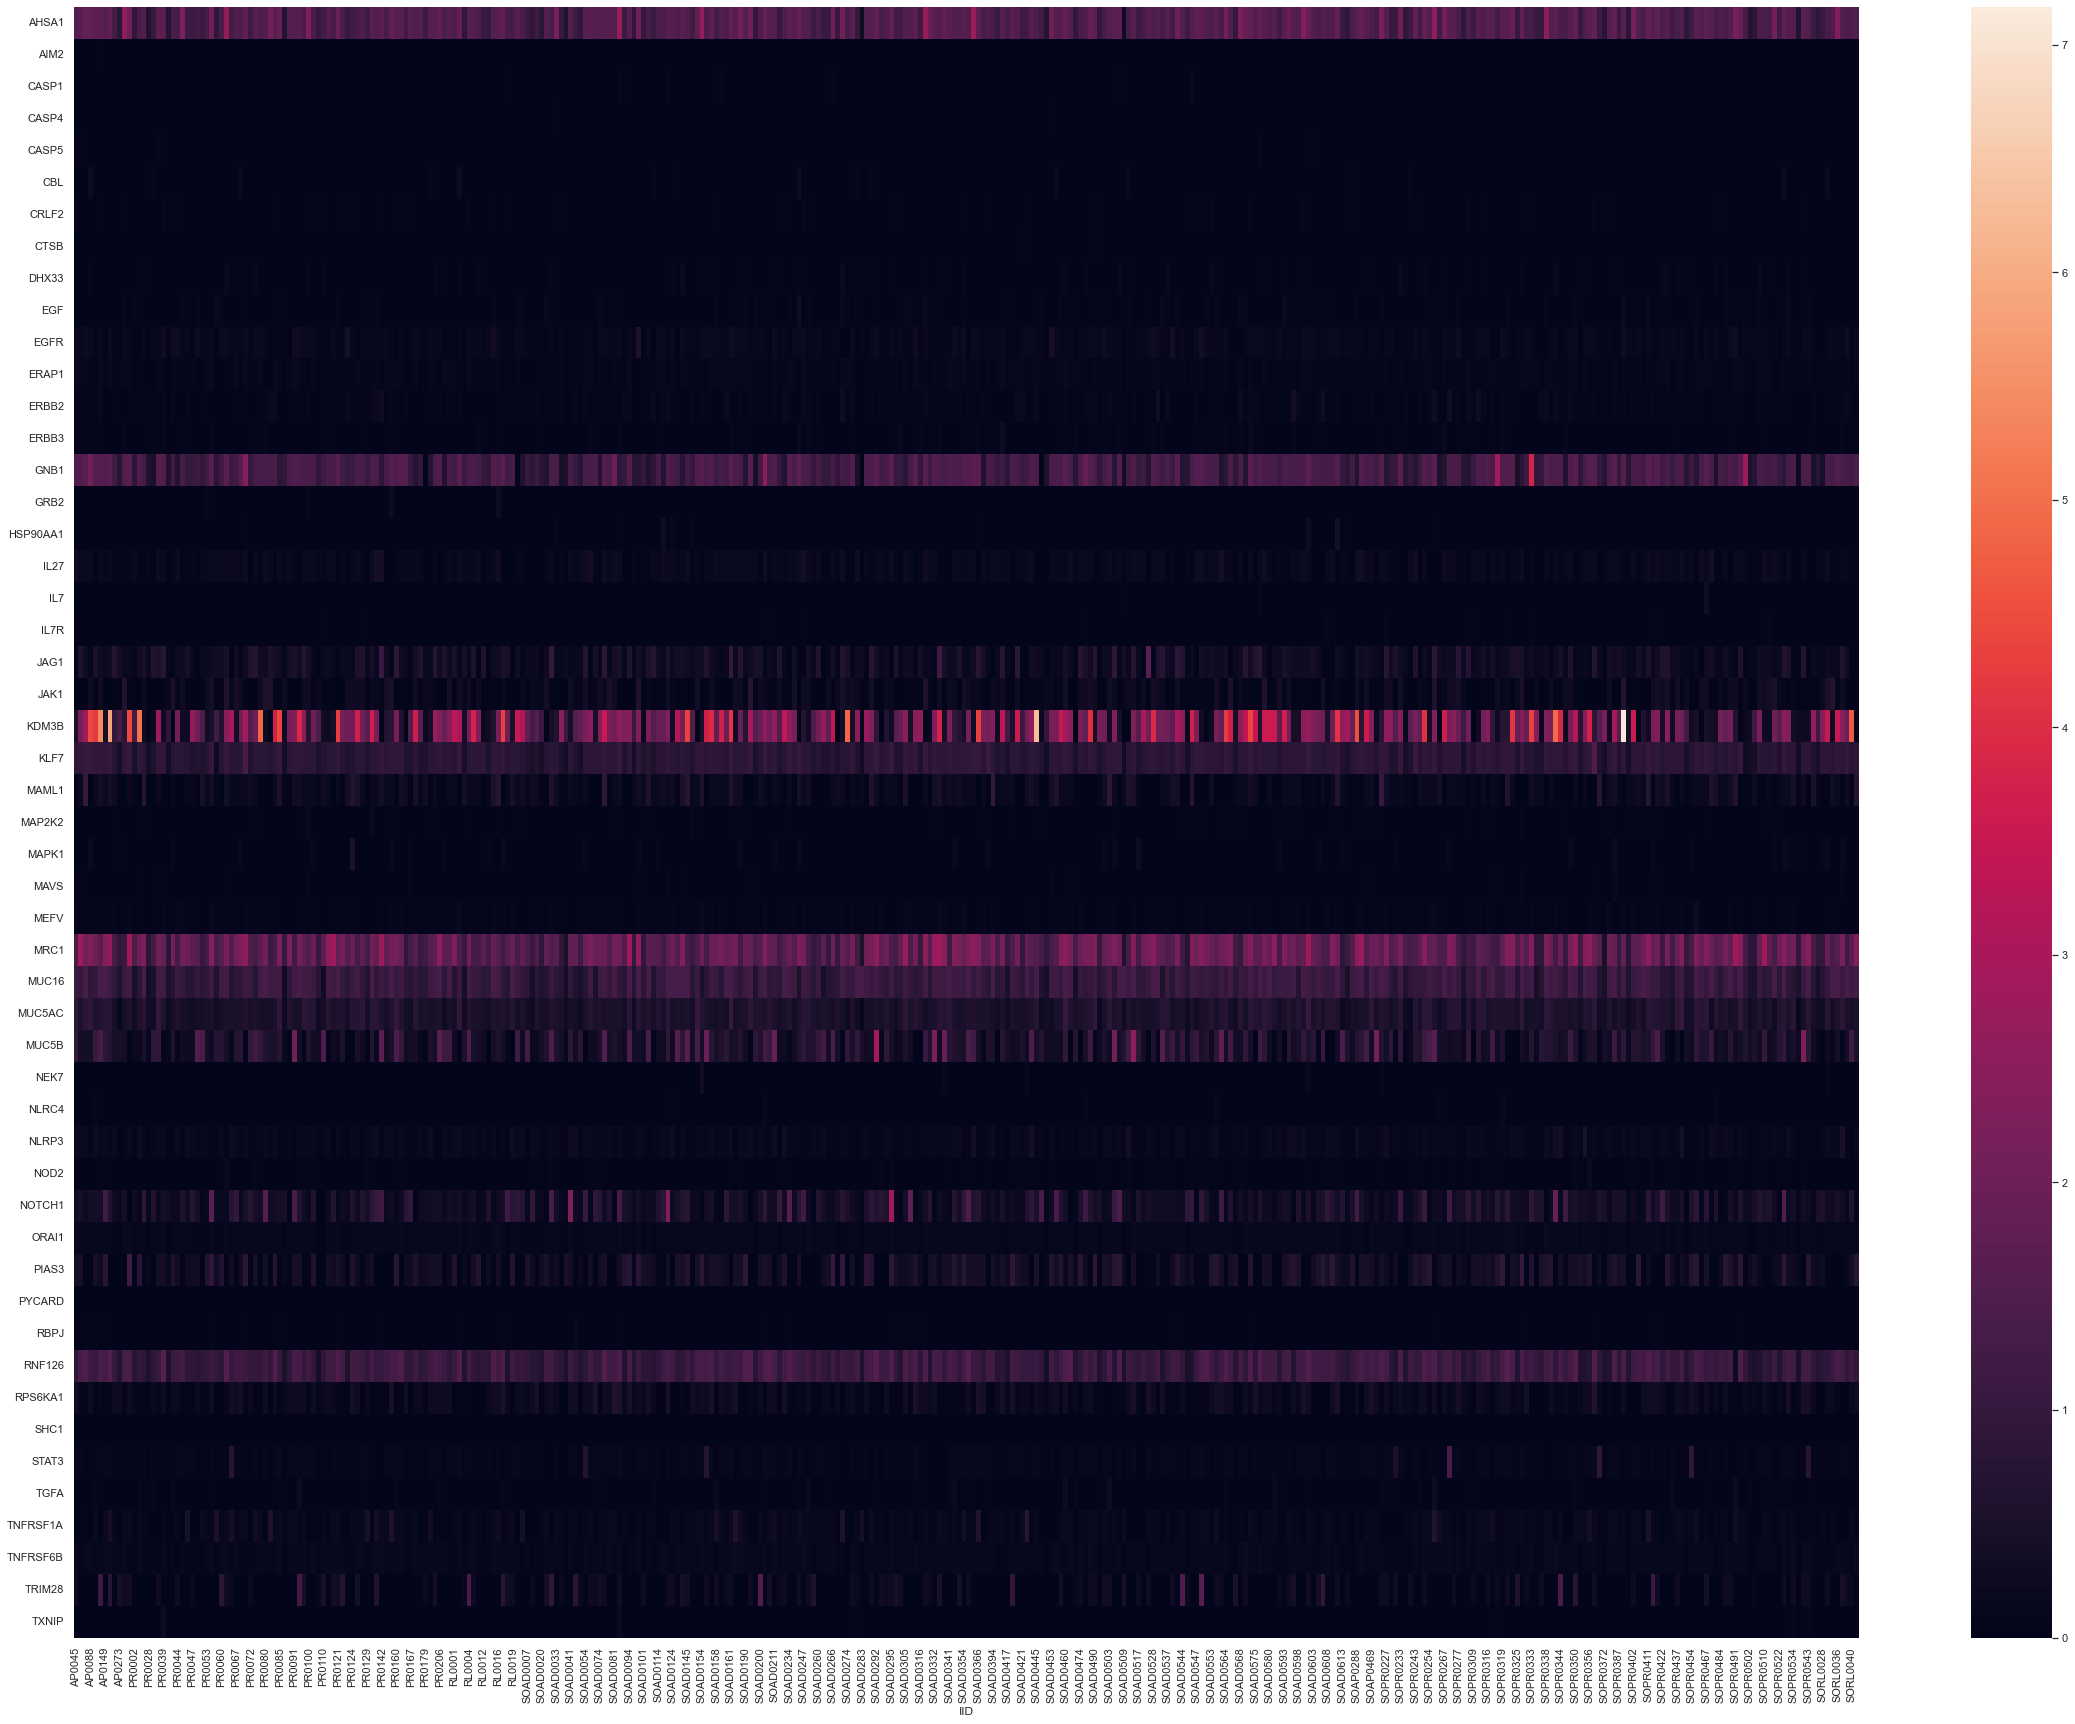

In [24]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPRUC.transpose())
#plt.savefig('NOPE.png', dpi=300)

# HotNet
---
Following code is for testing with HotNet
trial with pre-clustered, compare between 
Link to the paper is [here](https://academic.oup.com/bioinformatics/article/34/17/i972/5093236?login=false)
Link to github is [here](https://github.com/raphael-group/hierarchical-hotnet)

1. test on clustered network 
> Need to use clused interation list

> Incorporate with index



In [6]:
import pandas as pd
index_to_gene = pd.read_table('../data/Genes_associated.txt', header = None)

In [7]:
index_to_gene[0]

0        ABCB1
1      ATG16L1
2        CARD9
3        CCL11
4         CCL2
5          CD4
6         CD40
7         CD8A
8          CRP
9        CXCL8
10      FCGR3A
11       FOXP3
12       GPR29
13    HLA-DRB1
14       ICAM1
15        IFNG
16        IL10
17      IL10RA
18      IL10RB
19       IL12B
20       IL17A
21        IL1B
22       IL1R1
23       IL23R
24         IL4
25         IL5
26         IL6
27        IRF1
28        IRF5
29        IRGM
30        JAK2
31       LRRK2
32        NOD2
33       PTPN2
34      PTPN22
35         REL
36        RORC
37        SAA1
38        SAA2
39     SLC22A4
40     SLC22A5
41       STAT1
42       STAT3
43        TLR4
44         TNF
45     TNFSF15
46        TYK2
Name: 0, dtype: object

In [8]:
from get_patient import get_top_2000_genes

get_top_2000_genes(CD_subset, 0)

Index(['SPEN', 'ZNF219', 'MRC1', 'RORB', 'TTN', 'KDM3B', 'PRKDC', 'MACF1',
       'ATRX', 'LRP1',
       ...
       'MKRN1', 'FCGBP', 'NPRL3', 'LCN6', 'GLUL', 'ZAN', 'EFR3B', 'SPTBN4',
       'CLCNKB', 'ABCC10'],
      dtype='object', length=2000)

In [26]:
import requests
string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "network"

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

# set confience_score between 0-1
confidence_score = 0.6

## Set parameters
my_genes = index_to_gene[0].values

params = {
    "identifiers" : "%0d".join(my_genes), # your protein
    "species" : 9606, # species NCBI identifier 
    "caller_identity" : "Research_Project" # your app name
}

""" other params
"required_score" :	# threshold of significance to include a interaction, a number between 0 and 1000 (default depends on the network)
    "network_type" :	# network type: functional (default), physical
    "add_nodes"	: # adds a number of proteins with to the network based on their confidence score
    "show_query_node_labels" :	# when available use submitted names in the preferredName column when (0 or 1) (default:0)
    """

## Call STRING
response = requests.post(request_url, data=params)

# creates data frame with colume headins 
patient_df = pd.DataFrame(columns = ['stringId_A', 'stringId_B', 'preferredName_A', 'preferredName_B', 'ncbiTaxonId', 'score', 'nscore', 'fscore', 'pscore', 'ascore', 'escore', 'dscore', 'tscore'])

for line in response.text.strip().split("\n"):
    # seperates each line into list
    l = line.strip().split("\t")
    
    # adds each line to the data frame 
    patient_df.loc[len(patient_df)] = l
 
patient_df.head()


,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000011653,9606.ENSP00000311857,CD4,PTPN2,9606,0.406,0,0,0,0.065,0,0,0.391
1,9606.ENSP00000011653,9606.ENSP00000311857,CD4,PTPN2,9606,0.406,0,0,0,0.065,0,0,0.391
2,9606.ENSP00000011653,9606.ENSP00000478255,CD4,ABCB1,9606,0.409,0,0,0,0,0.111,0,0.363
3,9606.ENSP00000011653,9606.ENSP00000478255,CD4,ABCB1,9606,0.409,0,0,0,0,0.111,0,0.363
4,9606.ENSP00000011653,9606.ENSP00000428220,CD4,IRGM,9606,0.416,0,0,0,0.061,0,0,0.404


In [27]:
patient_df = patient_df[['preferredName_A','preferredName_B']]

In [28]:
patient_df = patient_df.drop_duplicates(subset=['preferredName_A','preferredName_B'],keep='first')

In [30]:
patient_df['preferredName_A']

0        CD4
2        CD4
4        CD4
6        CD4
8        CD4
        ... 
1166     TNF
1168     TNF
1170     TNF
1172    IL10
1174    IL10
Name: preferredName_A, Length: 588, dtype: object

In [31]:
list_hold = []
for gene in patient_df['preferredName_A']:
    for index_gene in index_to_gene[0]:
        if str(gene) == str(index_gene):  
            s = index_to_gene[0].to_list().index(gene)
            list_hold.append(s)
        else:
            continue

In [32]:
patient_df['index_valueA'] = list_hold

In [33]:
list_hold = []
for gene in patient_df['preferredName_B']:
    for index_gene in index_to_gene[0]:
        if str(gene) == str(index_gene):  
            s = index_to_gene[0].to_list().index(gene)
            list_hold.append(s)
        else:
            continue

In [34]:
patient_df['index_valueB'] = list_hold

In [35]:
patient_df

,preferredName_A,preferredName_B,index_valueA,index_valueB
0,CD4,PTPN2,5,33
2,CD4,ABCB1,5,0
4,CD4,IRGM,5,29
6,CD4,ATG16L1,5,1
8,CD4,IL12B,5,19
...,...,...,...,...
1166,TNF,ABCB1,44,0
1168,TNF,TYK2,44,46
1170,TNF,IL10,44,16
1172,IL10,IRGM,16,29


In [36]:
patient_df = patient_df[['index_valueA', 'index_valueB']]

In [37]:
edge_list = patient_df

In [38]:
edge_list

,index_valueA,index_valueB
0,5,33
2,5,0
4,5,29
6,5,1
8,5,19
...,...,...
1166,44,0
1168,44,46
1170,44,16
1172,16,29


In [39]:
genes = []
scores = []
for gene in index_to_gene[0]:
    for col in CD_subset.columns:
        if gene == col:
            x = CD_subset.loc['AP0013',gene]
            scores.append(x)
            genes.append(str(col))
        else:
            continue


In [19]:
CD_subset.loc['AP0013','NOD2']

0.0432643622707974

In [40]:
gene_score = pd.DataFrame()
gene_score['gene'] = genes
gene_score['score'] = scores


In [ ]:
gene_score.to_csv('gene_score.tsv', index=False, header=False, sep = '\t')
edge_list.to_csv('edge_list.tsv', index=False, header =False, sep = '\t')
index_to_gene.to_csv('index_to_gene.tsv', index=True, header = False, sep = '\t')

In [2]:
import pandas as pd
import numpy as np
import os

os.getcwd()


'/Users/tomdoyle/Documents/University/Southampton/Course/BIOL6068-Research_Project/Python'

In [4]:
clust = pd.read_csv('../Data/clustered58.csv',header=None)
clust

,0
0,CCL2 (pp) CXCL2
1,CCL2 (pp) CXCL1
2,CCL2 (pp) CASP1
3,CCL2 (pp) IL6
4,PYCARD (pp) CASP5
...,...
200,MAPK1 (pp) CARD9
201,MAPK1 (pp) HSP90AA1
202,MAPK1 (pp) MAPK3
203,MAPK1 (pp) CASP8


In [14]:
geneA = []
geneB = []
for gene in clust[0]:
    a,b = gene.split('(pp)',)
    geneA.append(a)
    geneB.append(b)
geneA

['CCL2 ',
 'CCL2 ',
 'CCL2 ',
 'CCL2 ',
 'PYCARD ',
 'PYCARD ',
 'PYCARD ',
 'PYCARD ',
 'PYCARD ',
 'MAPK11 ',
 'MAPK11 ',
 'MAPK11 ',
 'IL6 ',
 'IL6 ',
 'NLRC4 ',
 'NLRC4 ',
 'MEFV ',
 'MEFV ',
 'MEFV ',
 'MEFV ',
 'MEFV ',
 'MEFV ',
 'CXCL1 ',
 'CXCL1 ',
 'CXCL1 ',
 'MAPK14 ',
 'MAPK14 ',
 'MAPK14 ',
 'MAPK14 ',
 'MAPK14 ',
 'MAPK10 ',
 'MAPK10 ',
 'CASP5 ',
 'CASP5 ',
 'CASP5 ',
 'MAPK8 ',
 'MAPK8 ',
 'CARD8 ',
 'CARD8 ',
 'CARD8 ',
 'CARD8 ',
 'CASP1 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'TAB2 ',
 'RELA ',
 'RELA ',
 'RELA ',
 'RELA ',
 'CHUK ',
 'CHUK ',
 'CHUK ',
 'CHUK ',
 'CHUK ',
 'CHUK ',
 'CHUK ',
 'TRAF6 ',
 'TRAF6 ',
 'TAB3 ',
 'TAB3 ',
 'TAB3 ',
 'TAB3 ',
 'TAB3 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'NOD2 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'TAB1 ',
 'RIPK2 ',
 'RI

In [16]:
interation = pd.DataFrame({'A':geneA, 'B':geneB})

In [17]:
interation

,A,B
0,CCL2,CXCL2
1,CCL2,CXCL1
2,CCL2,CASP1
3,CCL2,IL6
4,PYCARD,CASP5
...,...,...
200,MAPK1,CARD9
201,MAPK1,HSP90AA1
202,MAPK1,MAPK3
203,MAPK1,CASP8
